# MENTORÍA - PREDICCIÓN DE LA PRÓXIMA COMPRA DE UN USUARIO

## ENTREGABLE 1: Análisis y Visualización de Datos

*   Mentor: Sergio Sulca

### INTEGRANTES:
*   Antonela Sambuceti
*   Luciano Mantovani
*   Juan Ignacio Barrionuevo Galtier


## General - Primera Parte

Teniendo en cuenta las consignas propuestas por el mentor, empezamos a hacer la importación de librerías, lectura y primeras visualizaciones del dataset.

### Importación de Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import datetime as dt

# Configuracion de seaborn estilo de grafico y escalado
#sns.set_context(context='talk', font_scale=1.2)
#sns.set_style("darkgrid")

### Lectura de dataset y pre-visualización de datos

In [2]:
# El siguiente código setea la variable de pandas para poder ver todas las columnas
pd.set_option('display.max_columns', None)

url='https://drive.google.com/file/d/1GG2ROEb03pKezOmKLjuGLReLAg0vw3fO/view'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df.head()

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,numero_cupon_movimiento,debito_credito_movimiento,producto_movimiento,codigo_empresa_movimiento,tipo_producto_movimiento,plan_movimiento,fecha_vto_cupon_movimiento,fecha_presentacion_movimiento,fecha_cupon_movimiento,fecha_carga_sistema_movimiento,monto_compra_movimiento,importe_cuota_movimiento,interes_movimiento,cargo_adm_seguro_movimiento,cargo_otorgamiento_movimiento,cargo_seguro_vida_movimiento,cargo_administrativo_movimiento,seleccionado_ng,tipo_prestamo_movimiento,codigo_contable_movimiento,local_venta_producto,marca_debito_automatico,fecha_extraccion_movimiento,id_comercio_otras_marcas_movimiento,documento_id_persona,antiguedad_de_la_cuenta,fecha_nacimiento,estado_civil,sexo,pais,provincia,ciudad,domicilio_codigo_postal,domicilio_barrio
0,0009bc2dcde18aed9f804282e10e87aa669,0,20099902,999990,0,PL,1,0,1,2020-09-10,2020-08-25,2020-08-25,NaN,301.29,301.29,0.0,0.0,0.0,0.0,0.0,0,NaN,209,20099902,0,NaN,0,0009bc2dcde18aed9f804282e10e87aa669,NaN,1986-03-26,1.0,1.0,Argentina,NEUQUEN,ZAPALA-CONFLU.COVUNCO,8340.0,ZAPALA
1,0009bc2dcde18aed9f804282e10e87aa669,0,71328938,987518,0,PL,1,3,1,2020-09-10,2020-08-13,2020-08-12,2020-08-13,200.00,200.00,0.0,0.0,0.0,0.0,0.0,0,NaN,1993,71328938,0,NaN,0,0009bc2dcde18aed9f804282e10e87aa669,NaN,1986-03-26,1.0,1.0,Argentina,NEUQUEN,ZAPALA-CONFLU.COVUNCO,8340.0,ZAPALA
2,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,534139,0,PL,1,3,1,2020-09-10,2020-08-14,2020-08-13,2020-08-14,200.00,200.00,0.0,0.0,0.0,0.0,0.0,0,NaN,1993,71332461,0,NaN,0,0009bc2dcde18aed9f804282e10e87aa669,NaN,1986-03-26,1.0,1.0,Argentina,NEUQUEN,ZAPALA-CONFLU.COVUNCO,8340.0,ZAPALA
3,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,618880,0,PL,1,3,1,2020-09-10,2020-08-19,2020-08-18,2020-08-19,200.00,200.00,0.0,0.0,0.0,0.0,0.0,0,NaN,1993,71332461,0,NaN,0,0009bc2dcde18aed9f804282e10e87aa669,NaN,1986-03-26,1.0,1.0,Argentina,NEUQUEN,ZAPALA-CONFLU.COVUNCO,8340.0,ZAPALA
4,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,877055,0,PL,1,3,1,2020-09-10,2020-08-04,2020-08-03,2020-08-04,200.00,200.00,0.0,0.0,0.0,0.0,0.0,0,NaN,1993,71332461,0,NaN,0,0009bc2dcde18aed9f804282e10e87aa669,NaN,1986-03-26,1.0,1.0,Argentina,NEUQUEN,ZAPALA-CONFLU.COVUNCO,8340.0,ZAPALA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46317 entries, 0 to 46316
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   dni_titular_movimiento               46317 non-null  object 
 1   moneda_movimiento                    46317 non-null  int64  
 2   id_comercio_movimiento               46317 non-null  int64  
 3   numero_cupon_movimiento              46317 non-null  int64  
 4   debito_credito_movimiento            46317 non-null  int64  
 5   producto_movimiento                  46317 non-null  object 
 6   codigo_empresa_movimiento            46317 non-null  int64  
 7   tipo_producto_movimiento             46317 non-null  int64  
 8   plan_movimiento                      46317 non-null  int64  
 9   fecha_vto_cupon_movimiento           46317 non-null  object 
 10  fecha_presentacion_movimiento        46317 non-null  object 
 11  fecha_cupon_movimiento      

### Columnas Relevantes

Teniendo en cuenta las columnas dentro del dataset, procedemos a la selección de las columnas que consideramos relevantes para el análisis de esta primera parte

In [4]:
df_2 = df[['dni_titular_movimiento','moneda_movimiento','id_comercio_movimiento','debito_credito_movimiento', 
                          'producto_movimiento','tipo_producto_movimiento','fecha_cupon_movimiento','monto_compra_movimiento',
                          'fecha_nacimiento','estado_civil','sexo','provincia','domicilio_codigo_postal']]
df_2

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,debito_credito_movimiento,producto_movimiento,tipo_producto_movimiento,fecha_cupon_movimiento,monto_compra_movimiento,fecha_nacimiento,estado_civil,sexo,provincia,domicilio_codigo_postal
0,0009bc2dcde18aed9f804282e10e87aa669,0,20099902,0,PL,0,2020-08-25,301.29,1986-03-26,1.0,1.0,NEUQUEN,8340.0
1,0009bc2dcde18aed9f804282e10e87aa669,0,71328938,0,PL,3,2020-08-12,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0
2,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-13,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0
3,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-18,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0
4,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-03,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46312,000cc4c96b36ebee509531731ab3b5c2755,0,64111133,0,PC,3,2021-03-01,3757.61,1972-11-19,3.0,2.0,BUENOS AIRES,7600.0
46313,000325709aec3c50413d6ea30f16205e263,0,10099058,1,PL,0,2021-03-07,-591.67,1973-08-06,1.0,1.0,BUENOS AIRES,6660.0
46314,000190c81ee107511f72f56e58ca3923057,0,20099804,0,ZE,3,2021-03-01,28759.50,1973-01-28,2.0,1.0,CORDOBA,5903.0
46315,0001b861d2f59a257ebb2145fe41268c680,0,20099804,0,ZE,3,2021-03-03,6782.58,1972-12-11,4.0,2.0,NaN,3500.0


### Análisis y curación de nulos

In [5]:
#visualizo que variables tienen valores en blanco
df_2.isna().sum()

dni_titular_movimiento          0
moneda_movimiento               0
id_comercio_movimiento          0
debito_credito_movimiento       0
producto_movimiento             0
tipo_producto_movimiento        0
fecha_cupon_movimiento          0
monto_compra_movimiento         0
fecha_nacimiento              150
estado_civil                  150
sexo                          150
provincia                    1177
domicilio_codigo_postal       337
dtype: int64

Dependiendo del analisis, se va a considerar la posibilidad de unir el dataset con fuentes externas, para solucionar la cantidad de nulos presentes.

#### Columna Provincia

Vemos la cantidad de provincias que tenemos

In [6]:
pd.DataFrame({'Provincias': df_2['provincia'].unique()})\
    .sort_values(by='Provincias',ascending=True)\
    .reset_index().drop(columns=['index'])

,Provincias
0,BUENOS AIRES
1,CAPITAL FEDERAL
2,CATAMARCA
3,CHACO
4,CHUBUT
5,CORDOBA
6,CORRIENTES
7,ENTRE RIOS
8,FORMOSA
9,JUJUY


Considerando la cantidad de nulos presentes en esta columna (1177), tomamos la decision de utilizar otro dataset para recuperar los valores faltantes a través del código postal. [link al dataset](https://github.com/androdron/localidades_AR)

In [7]:
# El read se hace sobre un fork al GitHub original
df_cp = pd.read_csv('https://raw.githubusercontent.com/JIBarrionuevoGaltier/localidades_AR/master/localidades_cp_maestro.csv')
df_cp.head()

,provincia,id,localidad,cp,id_prov_mstr
0,Ciudad Autonoma de Buenos Aires,5001,Ciudad Autonoma de Buenos Aires,NaN,2
1,Ciudad Autonoma de Buenos Aires,5001,Ciudad Autonoma de Buenos Aires,1144.0,2
2,Ciudad Autonoma de Buenos Aires,5001,Ciudad Autonoma de Buenos Aires,1145.0,2
3,Ciudad Autonoma de Buenos Aires,5001,Ciudad Autonoma de Buenos Aires,1146.0,2
4,Ciudad Autonoma de Buenos Aires,5001,Ciudad Autonoma de Buenos Aires,1147.0,2


Como primera instancia, vemos si el dataset externo tiene valores nulos en las columnas que vamos a utilizar.

In [8]:
df_cp.isna().sum()

provincia       0
id              0
localidad       0
cp              1
id_prov_mstr    0
dtype: int64

Habiendo un solo valor nulo en CP, se considera que el dataset es confiable en el resto de la informacion, por lo cual optamos por eliminar esa fila. 


In [9]:
df_cp = df_cp[~df_cp['cp'].isnull()]
df_cp.isna().sum()

provincia       0
id              0
localidad       0
cp              0
id_prov_mstr    0
dtype: int64

In [10]:
pd.DataFrame({'Provincias': df_cp['provincia'].unique()})\
    .sort_values(by='Provincias',ascending=True)\
    .reset_index().drop(columns=['index'])

,Provincias
0,Buenos Aires
1,Catamarca
2,Chaco
3,Chubut
4,Ciudad Autonoma de Buenos Aires
5,Cordoba
6,Corrientes
7,Entre Rios
8,Formosa
9,Jujuy


Renombramos la provincia de "Ciudad Autonoma de Buenos Aires" por "Capital Federal" y "Santiago del Estero" por "SGO. DEL ESTERO", de forma tal que se corresponda con el dataset original.

In [11]:
df_cp.loc[df_cp['provincia'] == 'Ciudad Autonoma de Buenos Aires', 'provincia'] = 'CAPITAL FEDERAL'
df_cp.loc[df_cp['provincia'] == 'Santiago del Estero', 'provincia'] = 'SGO. DEL ESTERO'
df_cp['provincia'].unique()

array(['CAPITAL FEDERAL', 'Buenos Aires', 'Catamarca', 'Cordoba',
       'Corrientes', 'Chaco', 'Chubut', 'Entre Rios', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen',
       'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'SGO. DEL ESTERO', 'Tucuman', 'Tierra del Fuego'],
      dtype=object)

Procedemos a hacer el merge de los datasets, a través de la columna cp (Codigo Postal)

In [12]:
# Unimos por cp, eliminamos duplicados, conservamos solo cps del dataframe original
# Creamos columna provincia_y que corresponde al dataset externo
df_2 = df_2.merge(df_cp[['provincia','cp']].drop_duplicates(subset=['cp'], keep='first'), 
                           how='left',
                           left_on = 'domicilio_codigo_postal', 
                           right_on = 'cp')\
                    .drop(columns= ['cp'])
df_2

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,debito_credito_movimiento,producto_movimiento,tipo_producto_movimiento,fecha_cupon_movimiento,monto_compra_movimiento,fecha_nacimiento,estado_civil,sexo,provincia_x,domicilio_codigo_postal,provincia_y
0,0009bc2dcde18aed9f804282e10e87aa669,0,20099902,0,PL,0,2020-08-25,301.29,1986-03-26,1.0,1.0,NEUQUEN,8340.0,Neuquen
1,0009bc2dcde18aed9f804282e10e87aa669,0,71328938,0,PL,3,2020-08-12,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,Neuquen
2,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-13,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,Neuquen
3,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-18,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,Neuquen
4,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-03,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,Neuquen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46312,000cc4c96b36ebee509531731ab3b5c2755,0,64111133,0,PC,3,2021-03-01,3757.61,1972-11-19,3.0,2.0,BUENOS AIRES,7600.0,Buenos Aires
46313,000325709aec3c50413d6ea30f16205e263,0,10099058,1,PL,0,2021-03-07,-591.67,1973-08-06,1.0,1.0,BUENOS AIRES,6660.0,Buenos Aires
46314,000190c81ee107511f72f56e58ca3923057,0,20099804,0,ZE,3,2021-03-01,28759.50,1973-01-28,2.0,1.0,CORDOBA,5903.0,Cordoba
46315,0001b861d2f59a257ebb2145fe41268c680,0,20099804,0,ZE,3,2021-03-03,6782.58,1972-12-11,4.0,2.0,NaN,3500.0,Chaco


In [13]:
# Sustituimos los valores nulos de la columna provincia (provincia_x) por las provincias (en mayus) de la columna
# provincia creada en la anterior unión.
df_2.loc[df_2['provincia_x'].isnull(), 'provincia_x'] = df_2['provincia_y'].str.upper()

In [14]:
# Borramos la columna provincia_y
df_2 = df_2.drop(columns=['provincia_y'])
# Renombramos la columna provincia_x por su nombre original
df_2 = df_2.rename(columns={"provincia_x": "provincia"})
df_2

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,debito_credito_movimiento,producto_movimiento,tipo_producto_movimiento,fecha_cupon_movimiento,monto_compra_movimiento,fecha_nacimiento,estado_civil,sexo,provincia,domicilio_codigo_postal
0,0009bc2dcde18aed9f804282e10e87aa669,0,20099902,0,PL,0,2020-08-25,301.29,1986-03-26,1.0,1.0,NEUQUEN,8340.0
1,0009bc2dcde18aed9f804282e10e87aa669,0,71328938,0,PL,3,2020-08-12,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0
2,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-13,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0
3,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-18,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0
4,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-03,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46312,000cc4c96b36ebee509531731ab3b5c2755,0,64111133,0,PC,3,2021-03-01,3757.61,1972-11-19,3.0,2.0,BUENOS AIRES,7600.0
46313,000325709aec3c50413d6ea30f16205e263,0,10099058,1,PL,0,2021-03-07,-591.67,1973-08-06,1.0,1.0,BUENOS AIRES,6660.0
46314,000190c81ee107511f72f56e58ca3923057,0,20099804,0,ZE,3,2021-03-01,28759.50,1973-01-28,2.0,1.0,CORDOBA,5903.0
46315,0001b861d2f59a257ebb2145fe41268c680,0,20099804,0,ZE,3,2021-03-03,6782.58,1972-12-11,4.0,2.0,CHACO,3500.0


En el dataset conformado, se recuperan 663 valores nulos. De esta forma queda la columna provincia más completa.

In [15]:
df_2.isna().sum()

dni_titular_movimiento         0
moneda_movimiento              0
id_comercio_movimiento         0
debito_credito_movimiento      0
producto_movimiento            0
tipo_producto_movimiento       0
fecha_cupon_movimiento         0
monto_compra_movimiento        0
fecha_nacimiento             150
estado_civil                 150
sexo                         150
provincia                    514
domicilio_codigo_postal      337
dtype: int64

### Extra: Diccionarios

In [16]:
#diccionarios para graficar variables numéricas que en realidad son categóricas
dic_monedas = {0: 'Pesos',1: 'Dolares',3: 'Zeta'}
dic_estado_civil = {0: 'Sin Datos', 1: 'Soltero/a', 2: 'Casado/a', 3: 'Separación de hecho', 
    4: 'Divorciado/a', 5: 'Viudo/a', 6: 'Concubino/a', 7: 'Novio/a'}
dic_sexo = {1: 'Hombre', 2: 'Mujer'}
dic_tipo_prod = {42: 'American express', 44: 'American express gold', 0: 'Clasica', 32: 'Master internacional',
    31: 'Master nacional', 3: 'Naranja', 4: 'Naranja virtual', 24: 'Naranja visa mini int.', 23: 'Naranja visa mini nac.',
    12: 'Naranja-visa internac.', 11: 'Naranja-visa nacional', -1: 'Sin Datos', 22: 'Visa internacional', 21: 'Visa nacional'}


## RESOLUCIÓN DE CONSIGNAS

## **2. Análisis Inicial**

### 1) Qué tipo de variable es cada una?

* dni_titular_movimiento *NOMINAL*
* moneda_movimiento *NOMINAL*
* id_comercio_movimiento *NOMINAL*
* debito_credito_movimiento *NOMINAL*
* producto_movimiento *NOMINAL*
* tipo_producto_movimiento *NOMINAL*
* fecha_cupon_movimiento *NUMERICA CONTINUA*
* monto_compra_movimiento *NUMERICA CONTINUA*
* fecha_nacimiento *NUMERICA CONTINUA*
* estado_civil *NOMINAL*
* sexo *NOMINAL*
* provincia *NOMINAL*
* domicilio_codigo_postal *NOMINAL*

### 2) Existen outliers en las variables seleccionadas?

##### Outliers por monto_compra_movimiento

Text(0.5, 0.98, 'Grafico de caja de monto_compra_movimiento (con outliers)')

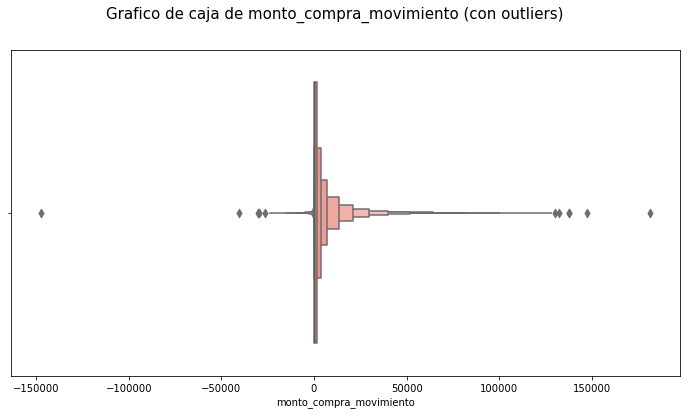

In [17]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_2, x="monto_compra_movimiento",
                color='salmon')
plt.suptitle("Grafico de caja de monto_compra_movimiento (con outliers)", fontsize=15)
#plt.savefig('drive/MyDrive/Diplomatura/monto_compra_movimiento_con_outliers.png')

Esta variable esta dentro del grupo que mas nos interesa, y a primera vista observamos que la mayoria de los casos se concentran cerca de 0 y existen outliers extremos.

In [18]:
print("Cuantiles de los extremos positivos\n", df_2['monto_compra_movimiento'].quantile([.95, .98, .99, .995, .998]).round(2))
print("Cuantiles de los extremos negativos\n", df_2['monto_compra_movimiento'].quantile([.05, .02, .01, .005, .002]).round(2))


Cuantiles de los extremos positivos
 0.950     8840.40
0.980    18271.52
0.990    26738.74
0.995    36186.26
0.998    51558.70
Name: monto_compra_movimiento, dtype: float64
Cuantiles de los extremos negativos
 0.050      -1.00
0.020     -60.55
0.010    -301.29
0.005    -806.52
0.002   -2487.36
Name: monto_compra_movimiento, dtype: float64


Para una visualizacion mas detallada, filtramos los casos que caen por encima del percentil 99 y por debajo del 1, es decir el 98% de los casos. 

Text(0.5, 0.98, 'Grafico de caja de monto_compra_movimiento (sin outliers)')

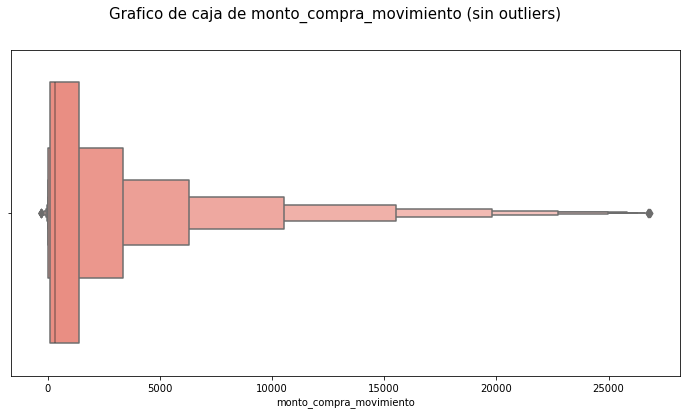

In [19]:
dff = df_2[df_2['monto_compra_movimiento'] > df_2['monto_compra_movimiento'].quantile(.01)]
dff = dff[dff['monto_compra_movimiento'] < dff['monto_compra_movimiento'].quantile(.99)]

plt.figure(figsize=(12, 6))
sns.boxenplot(data=dff, x="monto_compra_movimiento",
                color="salmon")
plt.suptitle("Grafico de caja de monto_compra_movimiento (sin outliers)", fontsize=15)
#plt.savefig('drive/MyDrive/Diplomatura/monto_compra_movimiento_sin_outliers.png')

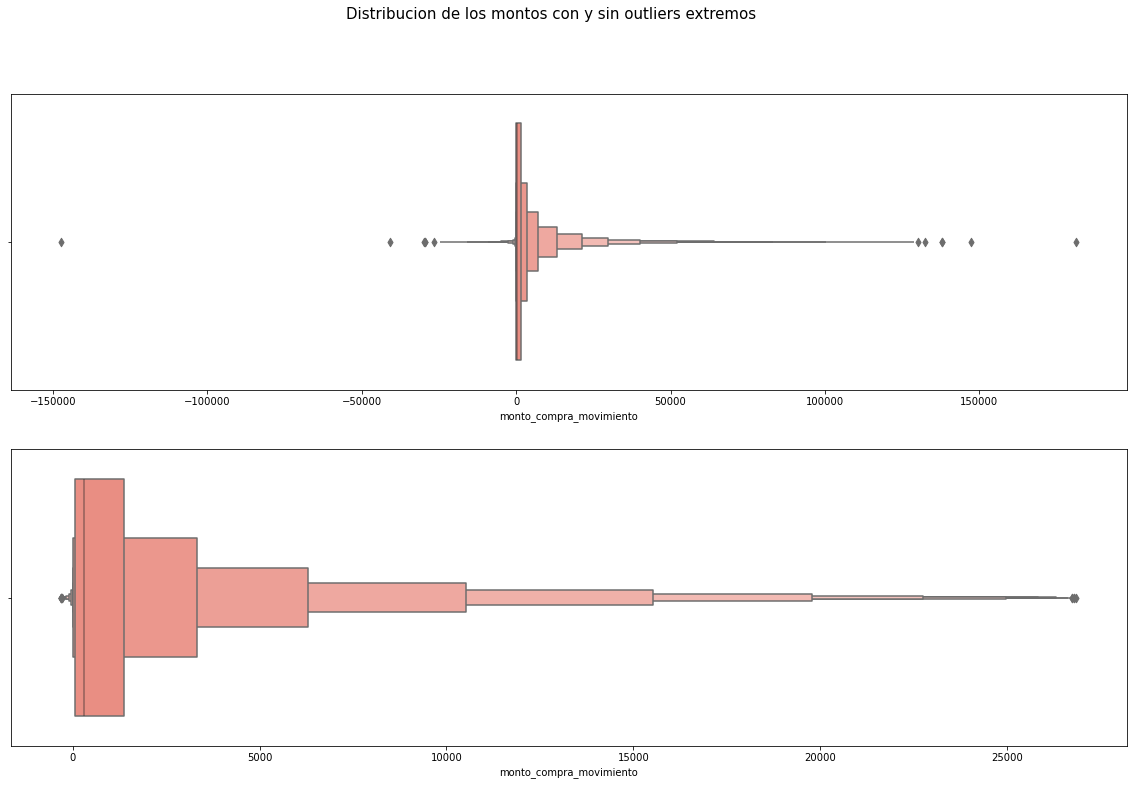

In [20]:
fig, axes = plt.subplots(2,figsize=(20, 12))
sns.boxenplot(data=df_2, ax=axes[0], x="monto_compra_movimiento",
                color='salmon')

dff = df_2[df_2['monto_compra_movimiento'] > df_2['monto_compra_movimiento'].quantile(.01)]
dff = dff[dff['monto_compra_movimiento'] < dff['monto_compra_movimiento'].quantile(.99)]

sns.boxenplot(data=dff, ax=axes[1], x="monto_compra_movimiento",
                color="salmon")
plt.suptitle("Distribucion de los montos con y sin outliers extremos", fontsize=15)
#plt.savefig('drive/MyDrive/Diplomatura/monto_compra_movimiento.png')
plt.show()

###### Análisis por moneda

Existen en nuestro Dataset 3 tipos de moneda: Pesos, Dolares y Zeta. Esta última también corresponde a movimientos en pesos, solo que en este caso implica la utilización de un plan especifico de Naranja.

Vemos rapidamente como se distribuyen los montos separados en las distintas monedas presentes.


Text(0.5, 0, '')

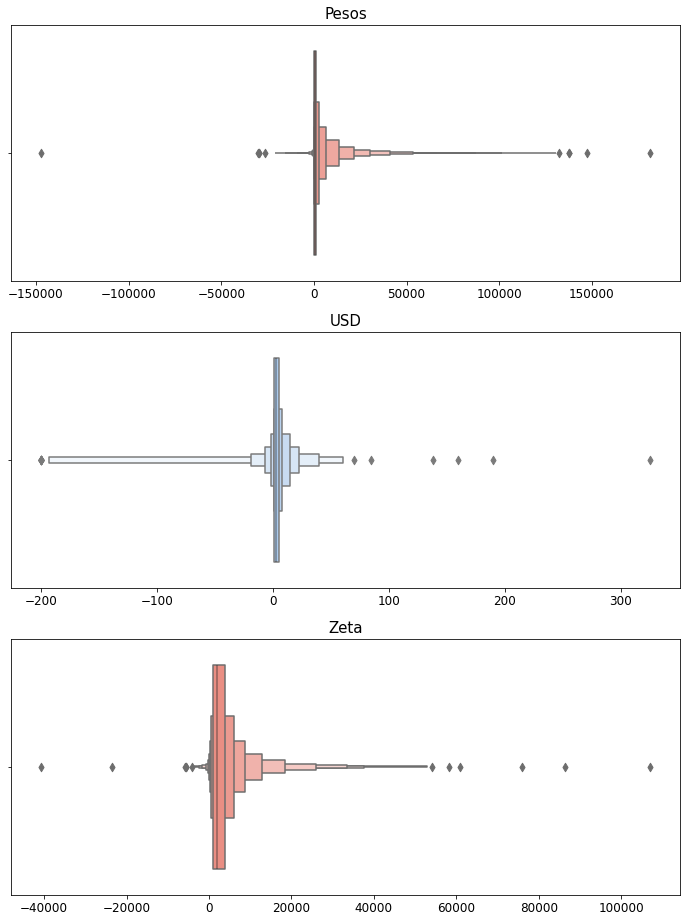

In [21]:
df_pes = df_2[df_2['moneda_movimiento'] == 0]
df_usd = df_2[df_2['moneda_movimiento'] == 1]
df_zet = df_2[df_2['moneda_movimiento'] == 3]

fig, ax = plt.subplots(3,figsize=(12, 16))
sns.boxenplot(data=df_pes, x="monto_compra_movimiento", color='salmon', ax=ax[0])
ax[0].set_title("Pesos", fontsize=15)
ax[0].tick_params(labelsize=12)
ax[0].set_xlabel("")
sns.boxenplot(data=df_usd, x="monto_compra_movimiento", color='green', palette="pastel", ax=ax[1])
ax[1].set_title("USD", fontsize=15)
ax[1].tick_params(labelsize=12)
ax[1].set_xlabel("")
sns.boxenplot(data=df_zet, x="monto_compra_movimiento", color='salmon', ax=ax[2])
ax[2].set_title("Zeta", fontsize=15)
ax[2].tick_params(labelsize=12)
ax[2].set_xlabel("")

Se observa que existen outliers para los tres tipos de moneda.

Además, basándonos en la visualización, decidimos que al momento de analizar la variable monto_compra_movimiento, se debe separar previamente por tipo de moneda. 


In [22]:
# Cuantiles extremos para pesos
print("Cuantiles extremos positivos\n", df_pes['monto_compra_movimiento'].quantile([.95, .98, .99, .995, .998]).round(2))
print("Cuantiles extremos negativos\n", df_pes['monto_compra_movimiento'].quantile([.05, .02, .01, .005, .002]).round(2))

Cuantiles extremos positivos
 0.950     8698.45
0.980    18990.38
0.990    27238.31
0.995    37348.98
0.998    52926.17
Name: monto_compra_movimiento, dtype: float64
Cuantiles extremos negativos
 0.050      -1.21
0.020     -51.00
0.010    -276.18
0.005    -785.04
0.002   -2733.64
Name: monto_compra_movimiento, dtype: float64


In [23]:
# Cuantiles extremos para usd
print("Cuantiles extremos positivos\n", df_usd['monto_compra_movimiento'].quantile([.95, .98, .99, .995, .998]).round(2))
print("Cuantiles extremos negativos\n", df_usd['monto_compra_movimiento'].quantile([.05, .02, .01, .005, .002]).round(2))

Cuantiles extremos positivos
 0.950     15.36
0.980     31.66
0.990     59.99
0.995     76.73
0.998    165.40
Name: monto_compra_movimiento, dtype: float64
Cuantiles extremos negativos
 0.050     -2.87
0.020    -12.96
0.010    -40.42
0.005   -200.23
0.002   -200.23
Name: monto_compra_movimiento, dtype: float64


In [24]:
# Cuantiles extremos para zeta
print("Cuantiles extremos positivos\n", df_zet['monto_compra_movimiento'].quantile([.95, .98, .99, .995, .998]).round(2))
print("Cuantiles extremos negativos\n", df_zet['monto_compra_movimiento'].quantile([.05, .02, .01, .005, .002]).round(2))

Cuantiles extremos positivos
 0.950     9945.00
0.980    16462.10
0.990    22267.76
0.995    30541.49
0.998    37537.58
Name: monto_compra_movimiento, dtype: float64
Cuantiles extremos negativos
 0.050     189.16
0.020    -220.91
0.010    -600.00
0.005   -1490.26
0.002   -2401.40
Name: monto_compra_movimiento, dtype: float64


Graficamos las distribuciones para los montos separados por monedas, sin outliers. 

C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/3987113130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff_pes = df_pes[df_2['monto_compra_movimiento'] > df_pes['monto_compra_movimiento'].quantile(.01)]
C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/3987113130.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff_usd = df_usd[df_2['monto_compra_movimiento'] > df_usd['monto_compra_movimiento'].quantile(.01)]
C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/3987113130.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff_zet = df_zet[df_2['monto_compra_movimiento'] > df_zet['monto_compra_movimiento'].quantile(.01)]


Text(0.5, 0, '')

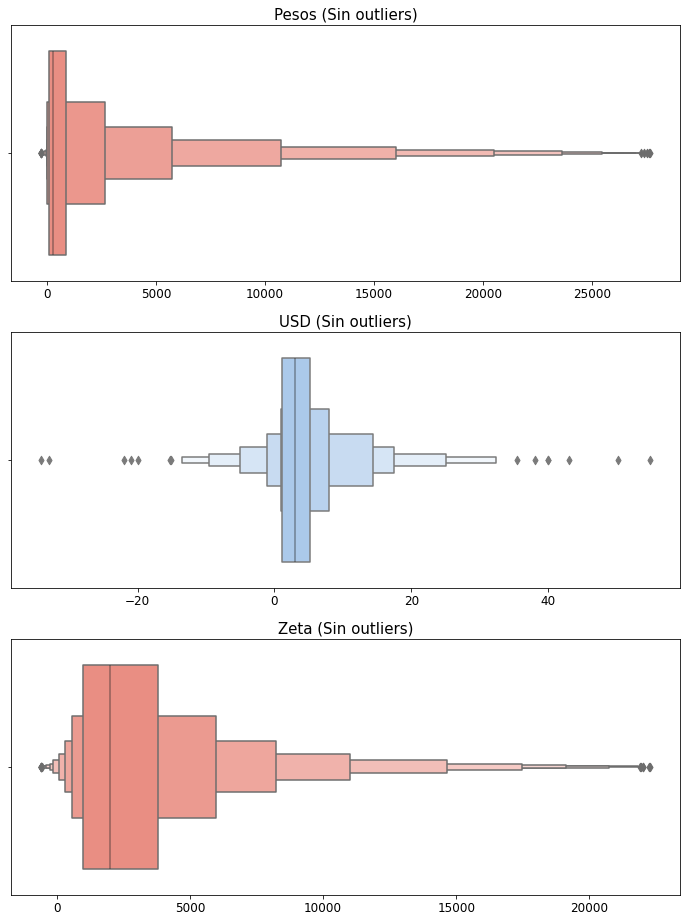

In [25]:
dff_pes = df_pes[df_2['monto_compra_movimiento'] > df_pes['monto_compra_movimiento'].quantile(.01)]
dff_pes = dff_pes[dff_pes['monto_compra_movimiento'] < dff_pes['monto_compra_movimiento'].quantile(.99)]

dff_usd = df_usd[df_2['monto_compra_movimiento'] > df_usd['monto_compra_movimiento'].quantile(.01)]
dff_usd = dff_usd[dff_usd['monto_compra_movimiento'] < dff_usd['monto_compra_movimiento'].quantile(.99)]

dff_zet = df_zet[df_2['monto_compra_movimiento'] > df_zet['monto_compra_movimiento'].quantile(.01)]
dff_zet = dff_zet[dff_zet['monto_compra_movimiento'] < dff_zet['monto_compra_movimiento'].quantile(.99)]


fig, ax = plt.subplots(3,figsize=(12, 16))
sns.boxenplot(data=dff_pes, x="monto_compra_movimiento", color='salmon', ax=ax[0])
ax[0].set_title("Pesos (Sin outliers)", fontsize=15)
ax[0].tick_params(labelsize=12)
ax[0].set_xlabel("")
sns.boxenplot(data=dff_usd, x="monto_compra_movimiento", color='green', palette="pastel", ax=ax[1])
ax[1].set_title("USD (Sin outliers)", fontsize=15)
ax[1].tick_params(labelsize=12)
ax[1].set_xlabel("")
sns.boxenplot(data=dff_zet, x="monto_compra_movimiento", color='salmon', ax=ax[2])
ax[2].set_title("Zeta (Sin outliers)", fontsize=15)
ax[2].tick_params(labelsize=12)
ax[2].set_xlabel("")

Observaciones:
- Los casos en pesos estan concentrados cerca de los 2000 pesos.
- Los casos en dolares estan concentrados entre 0 y 10 usd.
- Los casos en Zeta tienen una frecuencia mayor entre 0 y 5000 pesos.

--------

#### Outliers por edad

In [26]:
# Convertimos las columnas de fechas en tipos de datos "Date"
df_2['fecha_cupon_movimiento'] = pd.to_datetime(df_2.fecha_cupon_movimiento)
df_2['fecha_nacimiento'] = pd.to_datetime(df_2.fecha_nacimiento)

Se calcula la edad teniendo en cuenta el momento en que se efectuó la compra. No se consideran los casos donde la fecha de nacimiento es nula.

In [27]:
df_edad = pd.DataFrame(df_2).dropna(subset=['fecha_nacimiento'])
df_edad['edad']= ((df_edad['fecha_cupon_movimiento'] - df_edad['fecha_nacimiento'])/np.timedelta64(1, 'Y'))
df_edad['edad']= df_edad.edad.apply(int)
df_edad

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,debito_credito_movimiento,producto_movimiento,tipo_producto_movimiento,fecha_cupon_movimiento,monto_compra_movimiento,fecha_nacimiento,estado_civil,sexo,provincia,domicilio_codigo_postal,edad
0,0009bc2dcde18aed9f804282e10e87aa669,0,20099902,0,PL,0,2020-08-25,301.29,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
1,0009bc2dcde18aed9f804282e10e87aa669,0,71328938,0,PL,3,2020-08-12,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
2,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-13,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
3,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-18,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
4,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-03,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46312,000cc4c96b36ebee509531731ab3b5c2755,0,64111133,0,PC,3,2021-03-01,3757.61,1972-11-19,3.0,2.0,BUENOS AIRES,7600.0,48
46313,000325709aec3c50413d6ea30f16205e263,0,10099058,1,PL,0,2021-03-07,-591.67,1973-08-06,1.0,1.0,BUENOS AIRES,6660.0,47
46314,000190c81ee107511f72f56e58ca3923057,0,20099804,0,ZE,3,2021-03-01,28759.50,1973-01-28,2.0,1.0,CORDOBA,5903.0,48
46315,0001b861d2f59a257ebb2145fe41268c680,0,20099804,0,ZE,3,2021-03-03,6782.58,1972-12-11,4.0,2.0,CHACO,3500.0,48


Text(0.5, 1.0, 'Distribucion de la edad de los clientes')

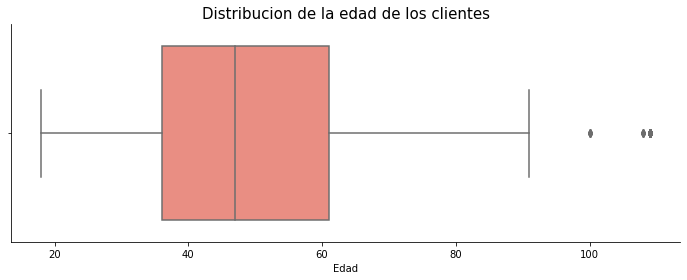

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(x=df_edad['edad'], color="salmon")
ax.set_xlabel("Edad")
sns.despine()
ax.set_title("Distribucion de la edad de los clientes", fontsize=15)

Observaciones:
- El 75% de los casos estan entre 30 y 65 años
- Existen outliers arriba de 90 años

#### Outliers por fecha_cupon_movimiento

In [29]:
df_2.sort_values('fecha_cupon_movimiento').head(10)[['fecha_cupon_movimiento']]

,fecha_cupon_movimiento
44699,2020-02-16
44478,2020-04-01
6747,2020-05-27
41248,2020-06-25
29329,2020-06-25
41250,2020-06-25
41254,2020-06-25
29132,2020-06-30
16970,2020-07-01
11931,2020-07-01


Text(0.5, 1.0, 'Histograma de frecuencia para fecha de cupón')

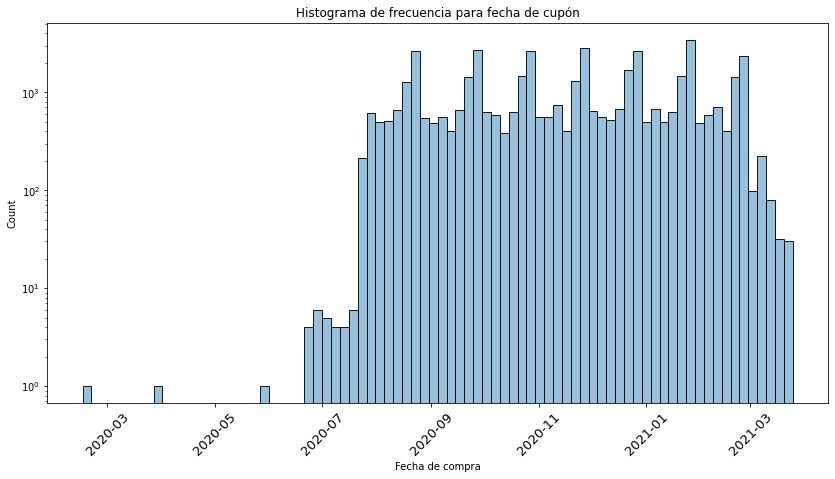

In [30]:
fecha = 'fecha_cupon_movimiento'
dff = df_2
dff[fecha] = pd.to_datetime(dff[fecha])

fig, ax = plt.subplots(figsize=(14,7))
ax.tick_params(axis='x',rotation = 45,labelsize = 13)
ax.set_xlabel("Fecha de compra")
ax.set_yscale("log")
sns.histplot(data=dff, x=fecha, bins=80, color="#3182bd", alpha=0.5)
ax.set_title('Histograma de frecuencia para fecha de cupón')

Observamos que existen outliers para el periodo entre Febrero y Junio. A continuación volvemos a visualizar esta variable filtrando extremos superiores e inferiores.

Text(0.5, 1.0, 'Histograma para fecha de cupón sin outliers')

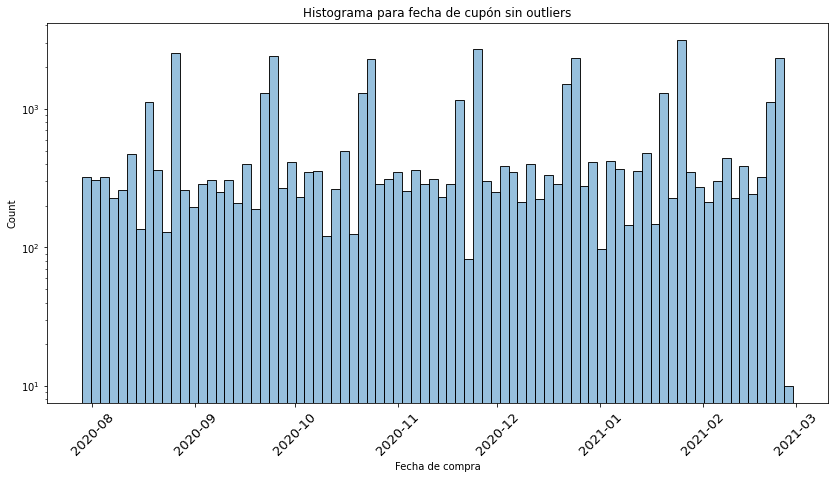

In [31]:
fecha = 'fecha_cupon_movimiento'
dff = df_2
dff[fecha] = pd.to_datetime(df_2[fecha])

dff = dff[dff[fecha] > dff[fecha].quantile(0.01)]
dff = dff[dff[fecha] < dff[fecha].quantile(0.99)]

fig, ax = plt.subplots(figsize=(14,7))
ax.tick_params(axis='x',rotation = 45,labelsize = 13)
ax.set_xlabel("Fecha de compra")
ax.set_yscale("log")
sns.histplot(data=dff, x=fecha, bins=80, color="#3182bd", alpha=0.5)
ax.set_title('Histograma para fecha de cupón sin outliers')

--------

### 3) Cómo es la frecuencia de las variables categóricas (Ejm producto_movimiento) que seleccionaron?

#### 1) moneda_movimiento

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frecuencia de montos segun tipo de moneda')

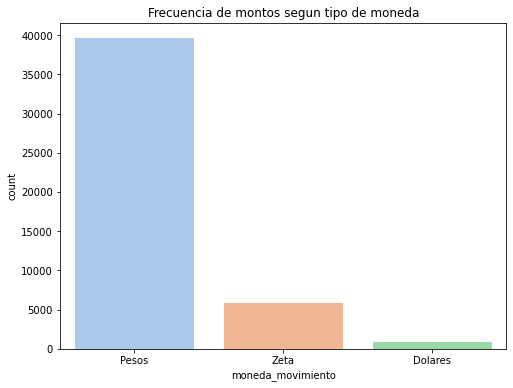

In [32]:
df_mon = pd.DataFrame(df_2.moneda_movimiento.replace(dic_monedas))
fig = plt.figure(figsize=(8,6))
sns.countplot(df_mon.moneda_movimiento, palette="pastel")
plt.title("Frecuencia de montos segun tipo de moneda")
#plt.savefig('drive/MyDrive/Diplomatura/histograma_monto_tipo_de_moneda.png')

In [33]:
df_mon.value_counts()

moneda_movimiento
Pesos                39596
Zeta                  5810
Dolares                911
dtype: int64

In [34]:
print("proporcion de casos en Pesos (moneda_movimiento = 0):", len(df[df['moneda_movimiento'] == 0])/len(df)*100)
print("proporcion de casos en Dolares (moneda_movimiento = 1):", len(df[df['moneda_movimiento'] == 1])/len(df)*100)
print("proporcion de casos en Pesos Z (moneda_movimiento = 3):", len(df[df['moneda_movimiento'] == 3])/len(df)*100)

proporcion de casos en Pesos (moneda_movimiento = 0): 85.4891292613943
proporcion de casos en Dolares (moneda_movimiento = 1): 1.966880411080165
proporcion de casos en Pesos Z (moneda_movimiento = 3): 12.543990327525531


Observamos que la cantidad de movimientos en moneda Dolar representan tan solo un 1.9% de todos los movimientos del Dataset. La baja representacion de los movimientos en Dolares hace que las conclusiones que se puedan sacar no tengan la misma fuerza que con los movimientos en Pesos Argentinos. 

A partir de ahora, cuando querramos sacar conclusiones acerca de la columna monto_compra_movimiento trabajaremos con el Dataset en moneda Pesos, salvo que se necesite analizar puntualmente movimientos en moneda Dolar. 
Se considera que los movimientos en moneda Zeta corresponden a transacciones en Pesos Argentinos, por lo que se los tratará junto con los movimientos de moneda 0, es decir gastos en pesos. 


In [35]:
# Dividimos el dataset en gastos en Pesos y gastos en Dolares
df_pes = df_2[df_2['moneda_movimiento'] != 1]
df_usd = df_2[df_2['moneda_movimiento'] == 1]
print("Variable de montos en Pesos")
print(df_pes["monto_compra_movimiento"].describe())
print("\nVariable de montos en Dolares")
print(df_usd["monto_compra_movimiento"].describe())

Variable de montos en Pesos
count     45406.000000
mean       1942.213015
std        5732.909250
min     -147263.640000
25%          74.730000
50%         301.290000
75%        1489.762500
max      181278.900000
Name: monto_compra_movimiento, dtype: float64

Variable de montos en Dolares
count    911.000000
mean       3.297728
std       25.684599
min     -200.230000
25%        1.110000
50%        2.960000
75%        5.180000
max      325.350000
Name: monto_compra_movimiento, dtype: float64


####2) dni_titular_movimiento

In [36]:
df_2.dni_titular_movimiento.value_counts()

0001454be3528aa0ab8537abc399485f361    358
000aab07efe8b017bc389691b347f096735    342
000a96c2ea496fe8ac9fb7873eb67183645    278
000d1ec16337ff143c5eea6e70734f28126    256
0009927813885f719eafde93eadbf43e595    230
                                      ... 
0008d485424b164f4dd15e7674dbb689964      2
000e58650d4c9baacd4f851d3735978c642      2
000b0b6905ca172cb064331c76663c00147      1
00088efbac5ecd284144d3b1a0f2a123782      1
000071f1f7541835440a7b95e8280add842      1
Name: dni_titular_movimiento, Length: 829, dtype: int64

Observamos que 829 clientes realizan las 46317 movimientos que encontramos en todo el dataset ¿Existirá alguna concentración en cantidad de movimientos o en pesos en algunos de estos clientes?

In [37]:
# Visualizamos si existe concentración de los movimientos en pesos en uno o algunos de los clientes
gb = df_pes.groupby('dni_titular_movimiento')
count_bydni = gb.agg(monto_compra_movimiento_sum=('monto_compra_movimiento', "sum")) \
   .join(gb.size().to_frame().rename(columns={0: "count"})) \

def add_cured_col(df, uncured_col, cured_col, cure_func):
    df.loc[:, cured_col] = df[uncured_col] \
        .apply(cure_func)
    return df

total_compra=df_pes.monto_compra_movimiento.sum() 
best_client = add_cured_col(count_bydni,cured_col="Porcentaje_Pesos",
    uncured_col="monto_compra_movimiento_sum",
    cure_func=lambda monto_compra_movimiento_sum: monto_compra_movimiento_sum / total_compra * 100)
best_client.sort_values(by="monto_compra_movimiento_sum", ascending=False).round(2).head(10)

,monto_compra_movimiento_sum,count,Porcentaje_Pesos
dni_titular_movimiento,,,
000cff864c5ed1d9ac4f5bb926f8cd73777,1186450.21,165,1.35
00070a4981542ed6aaca3e1187ba82a0293,683707.80,129,0.78
000b4bc66a245d4a57f6789263d38dda237,568157.24,47,0.64
000692232c90e846e1c04274fc96c1e7539,565978.47,92,0.64
0000e7993122bbd24f0df69b5962a62e282,561699.70,129,0.64
0001454be3528aa0ab8537abc399485f361,561248.03,343,0.64
0008676d0d42945fcd2827f7cec8f0b4541,534052.92,226,0.61
000821b0a8bdb0450e97298899adc5a3652,518757.10,108,0.59
0007d4041c1152942c17d2c22115ffbb456,506486.75,103,0.57


En base a los resutados, no podemos asegurar que los montos esten concentrados en un grupo reducido de clientes. Existe un cliente que concentra el 1% del total de movimientos en pesos del dataset, con un total consumido de $1,186,450.21. 

Visualizamos si existe concentración de la cantidad de los movimientos en uno o algunos de los clientes

In [38]:
total_count = best_client["count"].sum()
best_client = add_cured_col(count_bydni,cured_col="Porcentaje_Q",uncured_col="count",
    cure_func=lambda count: count / total_count * 100)
best_client.sort_values(by="count", ascending=False).round(2).head(10)

,monto_compra_movimiento_sum,count,Porcentaje_Pesos,Porcentaje_Q
dni_titular_movimiento,,,,
0001454be3528aa0ab8537abc399485f361,561248.03,343,0.64,0.76
000aab07efe8b017bc389691b347f096735,384349.32,334,0.44,0.74
000d1ec16337ff143c5eea6e70734f28126,481044.03,256,0.55,0.56
000a96c2ea496fe8ac9fb7873eb67183645,274693.20,246,0.31,0.54
0009927813885f719eafde93eadbf43e595,404451.79,230,0.46,0.51
0008676d0d42945fcd2827f7cec8f0b4541,534052.92,226,0.61,0.50
000d8ec0ec24584e6bfd1e6f546fb342161,335486.66,215,0.38,0.47
000afbf05ccef2a5c0ccf53c36b27ce7418,462727.96,211,0.52,0.46
0001686b52949b5461ffcbc766687e45031,211030.95,187,0.24,0.41


Al igual que en el análisis anterior, no se puede asegurar que exista una concentracion en la cantidad de movimientos.

####3) id_comercio_movimiento

In [39]:
df_2.id_comercio_movimiento.value_counts()

958705120    5090
20099902     4643
20089993     4037
20099745     2765
20099760     2338
             ... 
562031331       1
30093102        1
770004641       1
100030223       1
100346174       1
Name: id_comercio_movimiento, Length: 3251, dtype: int64

In [40]:
#visualizamos si existe concentración en pesos en uno o algunos de los comercios
gb2 = df_pes.groupby('id_comercio_movimiento')
count_bycom = gb2.agg(id_comercio_movimiento_sum=('monto_compra_movimiento', "sum")) \
   .join(gb2.size().to_frame().rename(columns={0: "count"})) 
best_comerc = add_cured_col(count_bycom,cured_col="Porcentaje_Pesos",
    uncured_col="id_comercio_movimiento_sum",
    cure_func=lambda id_comercio_movimiento_sum: id_comercio_movimiento_sum / total_compra * 100)
best_comerc.sort_values(by="id_comercio_movimiento_sum", ascending=False).round(2).head(10)

,id_comercio_movimiento_sum,count,Porcentaje_Pesos
id_comercio_movimiento,,,
20099804,19048082.87,1906,21.60
958705120,8707011.78,4232,9.87
555059584,3063688.76,1094,3.47
64101401,1867936.36,146,2.12
958705138,1563252.07,908,1.77
64101440,1342228.68,135,1.52
20099902,1308566.59,4643,1.48
100271128,1029218.98,62,1.17
64090467,997738.24,116,1.13


In [41]:
porc_acum = best_comerc.sort_values(by="id_comercio_movimiento_sum", ascending=False).round(2).head(10)
print('Porcentaje acumulado de los 10 primeros comercios')
print('\t> Porcentaje: ', porc_acum.Porcentaje_Pesos.sum())

Porcentaje acumulado de los 10 primeros comercios
	> Porcentaje:  44.900000000000006


Podemos observar que el comercio '20099804' concentra el 21.6% de los movimientos en pesos. Además, entre los 10 comercios mas importantes se encuentra el 45% de las operaciones en pesos de todo el dataset. 

In [42]:
#visualizamos si existe concentración en la cantidad de operaciones en uno o algunos de los comercios
total_count2 = best_comerc["count"].sum()
best_comerc = add_cured_col(count_bycom,cured_col="Porcentaje_Q",uncured_col="count",
    cure_func=lambda count: count / total_count2 * 100)
best_comerc = pd.DataFrame(best_comerc.sort_values(by="count", ascending=False).reset_index())
best_comerc.round(2).head(10)

,id_comercio_movimiento,id_comercio_movimiento_sum,count,Porcentaje_Pesos,Porcentaje_Q
0,20099902,1308566.59,4643,1.48,10.23
1,958705120,8707011.78,4232,9.87,9.32
2,20089993,439720.88,4037,0.50,8.89
3,20099745,141622.47,2765,0.16,6.09
4,20099760,232853.25,2338,0.26,5.15
5,20099804,19048082.87,1906,21.60,4.20
6,100166914,85272.30,1244,0.10,2.74
7,555059584,3063688.76,1094,3.47,2.41
8,20100936,36686.60,1092,0.04,2.40
9,958705138,1563252.07,908,1.77,2.00


In [43]:
porc_acum = best_comerc.sort_values(by="count", ascending=False).round(2).head(10)
print('Porcentaje acumulado de los 10 primeros comercios')
print('\t> Porcentaje: ', porc_acum.Porcentaje_Q.sum())

Porcentaje acumulado de los 10 primeros comercios
	> Porcentaje:  53.43


Se observa que el 53.4% del total de las operaciones son realizadas tambien por 10 comercios, 5 de los cuales tambien concentran cantidad en Pesos.

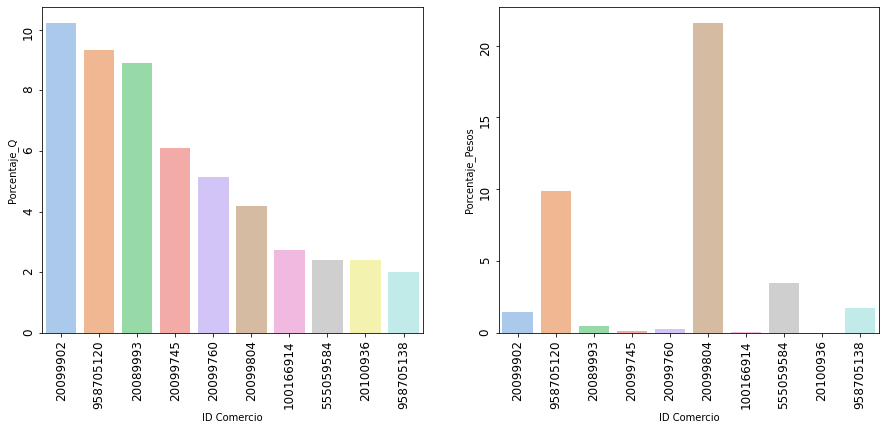

In [44]:
lista = [20099902, 958705120, 20089993, 20099745,20099760, 20099804, 100166914, 555059584, 20100936, 958705138]
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
data = best_comerc[best_comerc["count"] > 900]
g = sns.barplot(y=data.Porcentaje_Q.round(2), x=data.id_comercio_movimiento, dodge=False, ci=None, order=lista, ax=axes[0], palette="pastel")
g = sns.barplot(y=data.Porcentaje_Pesos.round(2), x=data.id_comercio_movimiento, dodge=False, ci=None, order=lista, ax=axes[1], palette="pastel")

for ax in axes:
  ax.tick_params(labelrotation=90, labelsize=12)
  ax.set_xlabel("ID Comercio")

#### 4)debito_compra_movimiento


C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


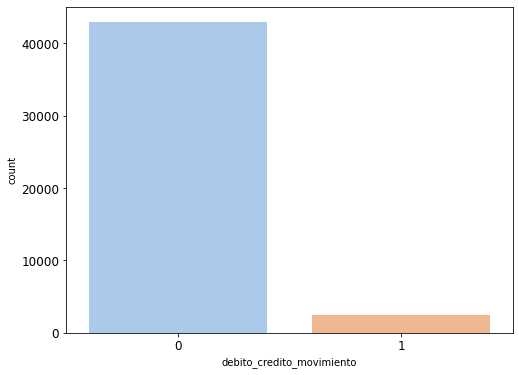

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df_pes.debito_credito_movimiento, palette="pastel")
ax.tick_params(labelsize=12)

In [46]:
df_pes.groupby(["debito_credito_movimiento"])["monto_compra_movimiento"].describe()

,count,mean,std,min,25%,50%,75%,max
debito_credito_movimiento,,,,,,,,
0,42892.0,2085.140294,5804.520403,0.01,100.0000,301.29,1620.00,181278.9
1,2514.0,-496.306022,3532.771933,-147263.64,-181.0875,-20.89,-1.41,0.0


La columna debito_compra_movimiento nos permite diferenciar los movimientos positivos de los negativos. 

Cuando la columna asume el valor 0, corresponde a los débitos efectuados por los clientes por mayores consumos que realizaron, y cuando la columna asume el valor 1 corresponden a devoluciones efectuadas por la tarjeta, que implican un menor gasto.

In [47]:
print("Porcentual de casos en débito", "{:.2f}".format(len(df_pes[df_pes["debito_credito_movimiento"] == 0])/len(df_pes)*100)+'%')
print("Porcentual de casos en crédito", "{:.2f}".format(len(df_pes[df_pes["debito_credito_movimiento"] == 1])/len(df_pes)*100)+'%')

Porcentual de casos en débito 94.46%
Porcentual de casos en crédito 5.54%


Casi el 95% de los casos corresponden a movimientos en debito, concentrando la mayoria de casos.

####5) producto_movimiento

In [48]:
df_2.producto_movimiento.value_counts()

PL    33739
VI     5998
SM     2765
ZE     1906
PC      890
AV      722
MC      131
PN       82
EX       42
PP       36
TA        3
AX        3
Name: producto_movimiento, dtype: int64

Text(0.5, 1.0, 'Frecuencias de Producto Movimiento')

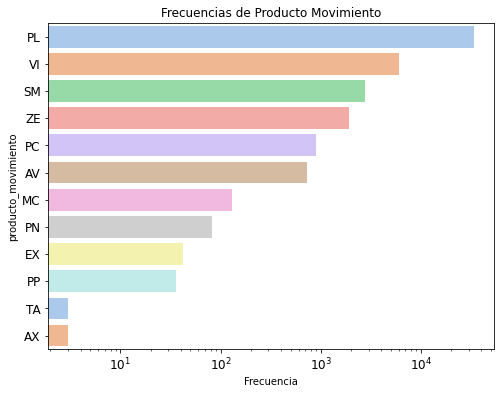

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
g=sns.countplot(y=df_2.producto_movimiento, palette="pastel", order=df_2.producto_movimiento.value_counts().index)
ax.set_xscale("log")
ax.tick_params(labelsize=12)
ax.set_xlabel("Frecuencia")
ax.set_title("Frecuencias de Producto Movimiento")
#plt.savefig('drive/MyDrive/Diplomatura/portafolio_de_productos.png')

In [50]:
prod_mov = df_2.producto_movimiento.value_counts().to_frame()
prod_mov['Porcentaje'] = (prod_mov.producto_movimiento / len(df_2))*100
prod_mov

,producto_movimiento,Porcentaje
PL,33739,72.843664
VI,5998,12.949889
SM,2765,5.969730
ZE,1906,4.115120
PC,890,1.921541
AV,722,1.558823
MC,131,0.282834
PN,82,0.177041
EX,42,0.090679
PP,36,0.077725


De los movimientos hechos en moneda pesos, el Plan Largo es el producto que concentra la mayor cantidad de movimientos (72.8%). 

####6) tipo_producto_movimiento

In [51]:
# Creamos el df_tprod a partir de df_pes para incluir la columna monto_compra_movimiento
df_tprod = pd.DataFrame(df_pes[["tipo_producto_movimiento", "monto_compra_movimiento"]])
df_tprod.tipo_producto_movimiento = df_tprod.tipo_producto_movimiento.replace(dic_tipo_prod)

In [52]:
df_tprod.tipo_producto_movimiento.value_counts()

Naranja                 20282
Clasica                 18408
Visa internacional       6441
Master internacional      160
Naranja virtual           108
American express            7
Name: tipo_producto_movimiento, dtype: int64

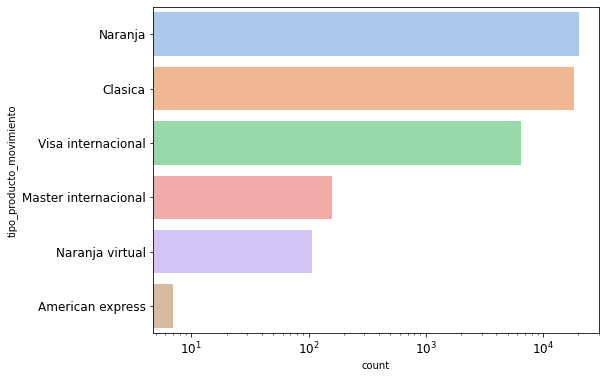

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
g=sns.countplot(y=df_tprod.tipo_producto_movimiento, palette="pastel", order=df_tprod.tipo_producto_movimiento.value_counts().index)
ax.set_xscale("log")
ax.tick_params(labelsize=12)

In [54]:
tprod_mov = df_tprod.tipo_producto_movimiento.value_counts().to_frame()
tprod_mov['Porcentaje'] = (tprod_mov.tipo_producto_movimiento / len(df_tprod))*100
tprod_mov

,tipo_producto_movimiento,Porcentaje
Naranja,20282,44.668106
Clasica,18408,40.540898
Visa internacional,6441,14.185350
Master internacional,160,0.352376
Naranja virtual,108,0.237854
American express,7,0.015416


Se observa que el producto más usado es la Tarjeta Naranja común, seguida muy de cerca por la Naranja Clásica y luego la Visa Internacional en tercer lugar, siendo la Tarjeta American express la que menos se utiliza.

####7) estado_civil


In [55]:
df_est = pd.DataFrame(df_2.estado_civil.replace(dic_estado_civil))
df_est.estado_civil.value_counts()

Soltero/a              22431
Casado/a               17704
Divorciado/a            1812
Viudo/a                 1703
Concubino/a             1000
Separación de hecho      981
Sin Datos                488
Novio/a                   48
Name: estado_civil, dtype: int64

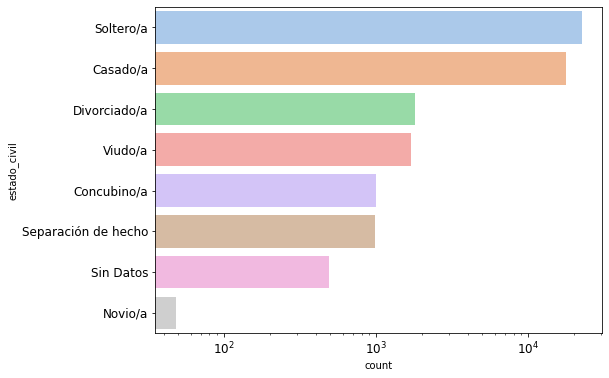

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(y=df_est.estado_civil, palette="pastel", order=df_est.estado_civil.value_counts().index)
ax.set_xscale("log")
ax.tick_params(labelsize=12)

In [57]:
est_civ = df_est.estado_civil.value_counts().to_frame()
est_civ['Porcentaje'] = (est_civ.estado_civil / len(df_est))*100
est_civ

,estado_civil,Porcentaje
Soltero/a,22431,48.429302
Casado/a,17704,38.223546
Divorciado/a,1812,3.912170
Viudo/a,1703,3.676836
Concubino/a,1000,2.159034
Separación de hecho,981,2.118013
Sin Datos,488,1.053609
Novio/a,48,0.103634


Los movimientos de las personas solteras y casadas representan un 90% de los casos.

####8) sexo

In [58]:
df_sexo = pd.DataFrame(df_2.sexo.replace(dic_sexo))
df_sexo.sexo.value_counts()

Mujer     24432
Hombre    21735
Name: sexo, dtype: int64

Text(0.5, 0, 'Frecuencia')

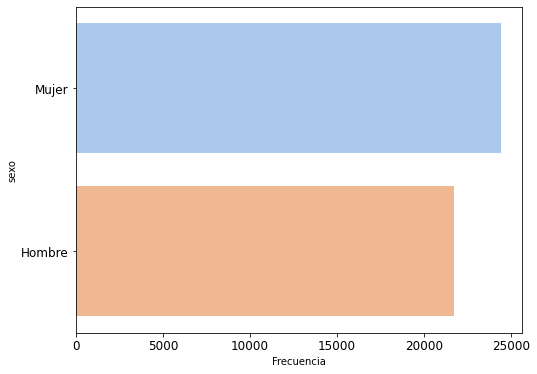

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(y=df_sexo.sexo, palette="pastel", order=df_sexo.sexo.value_counts().index)
ax.tick_params(labelsize=12)
ax.set_xlabel("Frecuencia")

In [60]:
freq_sx = df_sexo.sexo.value_counts().to_frame()
freq_sx['Porcentaje'] = (freq_sx.sexo / len(df_sexo))*100
freq_sx

,sexo,Porcentaje
Mujer,24432,52.749530
Hombre,21735,46.926614


Hay un 5,82% mas de movimientos que corresponden a las mujeres.

####9) provincia

In [61]:
df_2.provincia.value_counts()

CORDOBA             8835
BUENOS AIRES        7482
SANTA FE            3404
TUCUMAN             3215
MENDOZA             3132
CHUBUT              1891
CHACO               1762
CORRIENTES          1740
SALTA               1406
CAPITAL FEDERAL     1402
ENTRE RIOS          1297
NEUQUEN             1240
JUJUY               1084
SGO. DEL ESTERO     1077
CATAMARCA           1037
FORMOSA             1014
LA RIOJA             988
SAN LUIS             799
SAN JUAN             756
MISIONES             717
RIO NEGRO            678
SANTA CRUZ           437
LA PAMPA             215
TIERRA DEL FUEGO     195
Name: provincia, dtype: int64

Text(0, 0.5, 'Provincia')

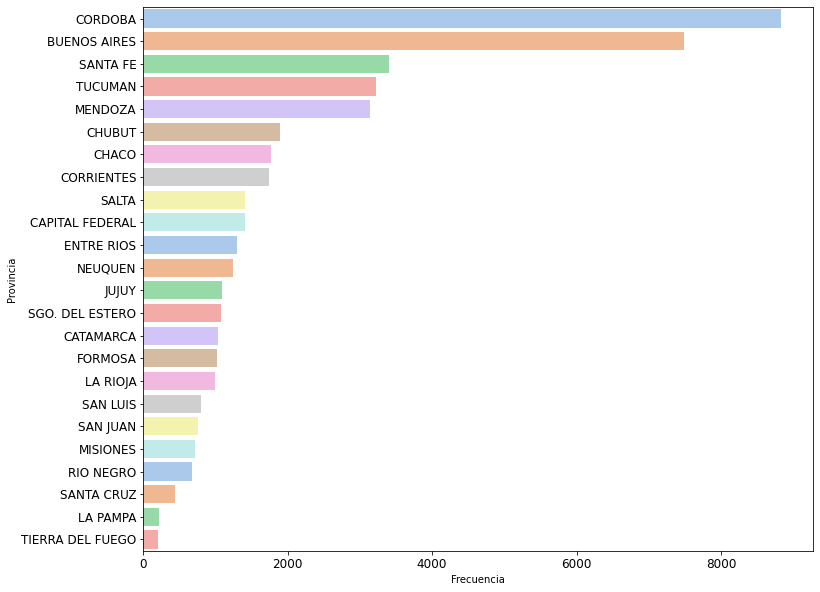

In [62]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(y=df_2.provincia, palette="pastel", order=df_2.provincia.value_counts().index)
ax.tick_params(labelsize=12)
ax.set_xlabel("Frecuencia")
ax.set_ylabel("Provincia")

In [63]:
freq_prov = df_2.provincia.value_counts().to_frame()
freq_prov['Porcentaje'] = (freq_prov.provincia / len(df_2))*100
freq_prov

,provincia,Porcentaje
CORDOBA,8835,19.075070
BUENOS AIRES,7482,16.153896
SANTA FE,3404,7.349353
TUCUMAN,3215,6.941296
MENDOZA,3132,6.762096
CHUBUT,1891,4.082734
CHACO,1762,3.804219
CORRIENTES,1740,3.756720
SALTA,1406,3.035602
CAPITAL FEDERAL,1402,3.026966


Observaciones:

- Cordoba, Buenos Aires: Concentran el 35% de los casos
- Santa Fe, Tucumán, Mendoza: Concentran el 20,5% de los casos
- El resto de las provincias concentran el resto de los casos.

-------

### 4) Cómo es la distribución de las variables monto_compra_movimiento para cada producto_movimiento en el dataset? Se distribuye de manera normal?

A continuación se grafican histogramas de montos segun los diferentes productos presentes en el dataset. Se excluyen aquellos productos cuya cantidad de casos no permiten un análisis valido sobre su distribución. Esto aplica para los productos: TA y AX

Además, con respecto a la moneda, se graficarán en pesos todos los productos, y solo se incluye la distribución en dólares para el producto VI, que es el único que tiene una frecuencia significativa de montos en esa moneda.

In [64]:
df_usd.producto_movimiento.value_counts()

VI    858
MC     28
PL     25
Name: producto_movimiento, dtype: int64

##### Productos en Pesos

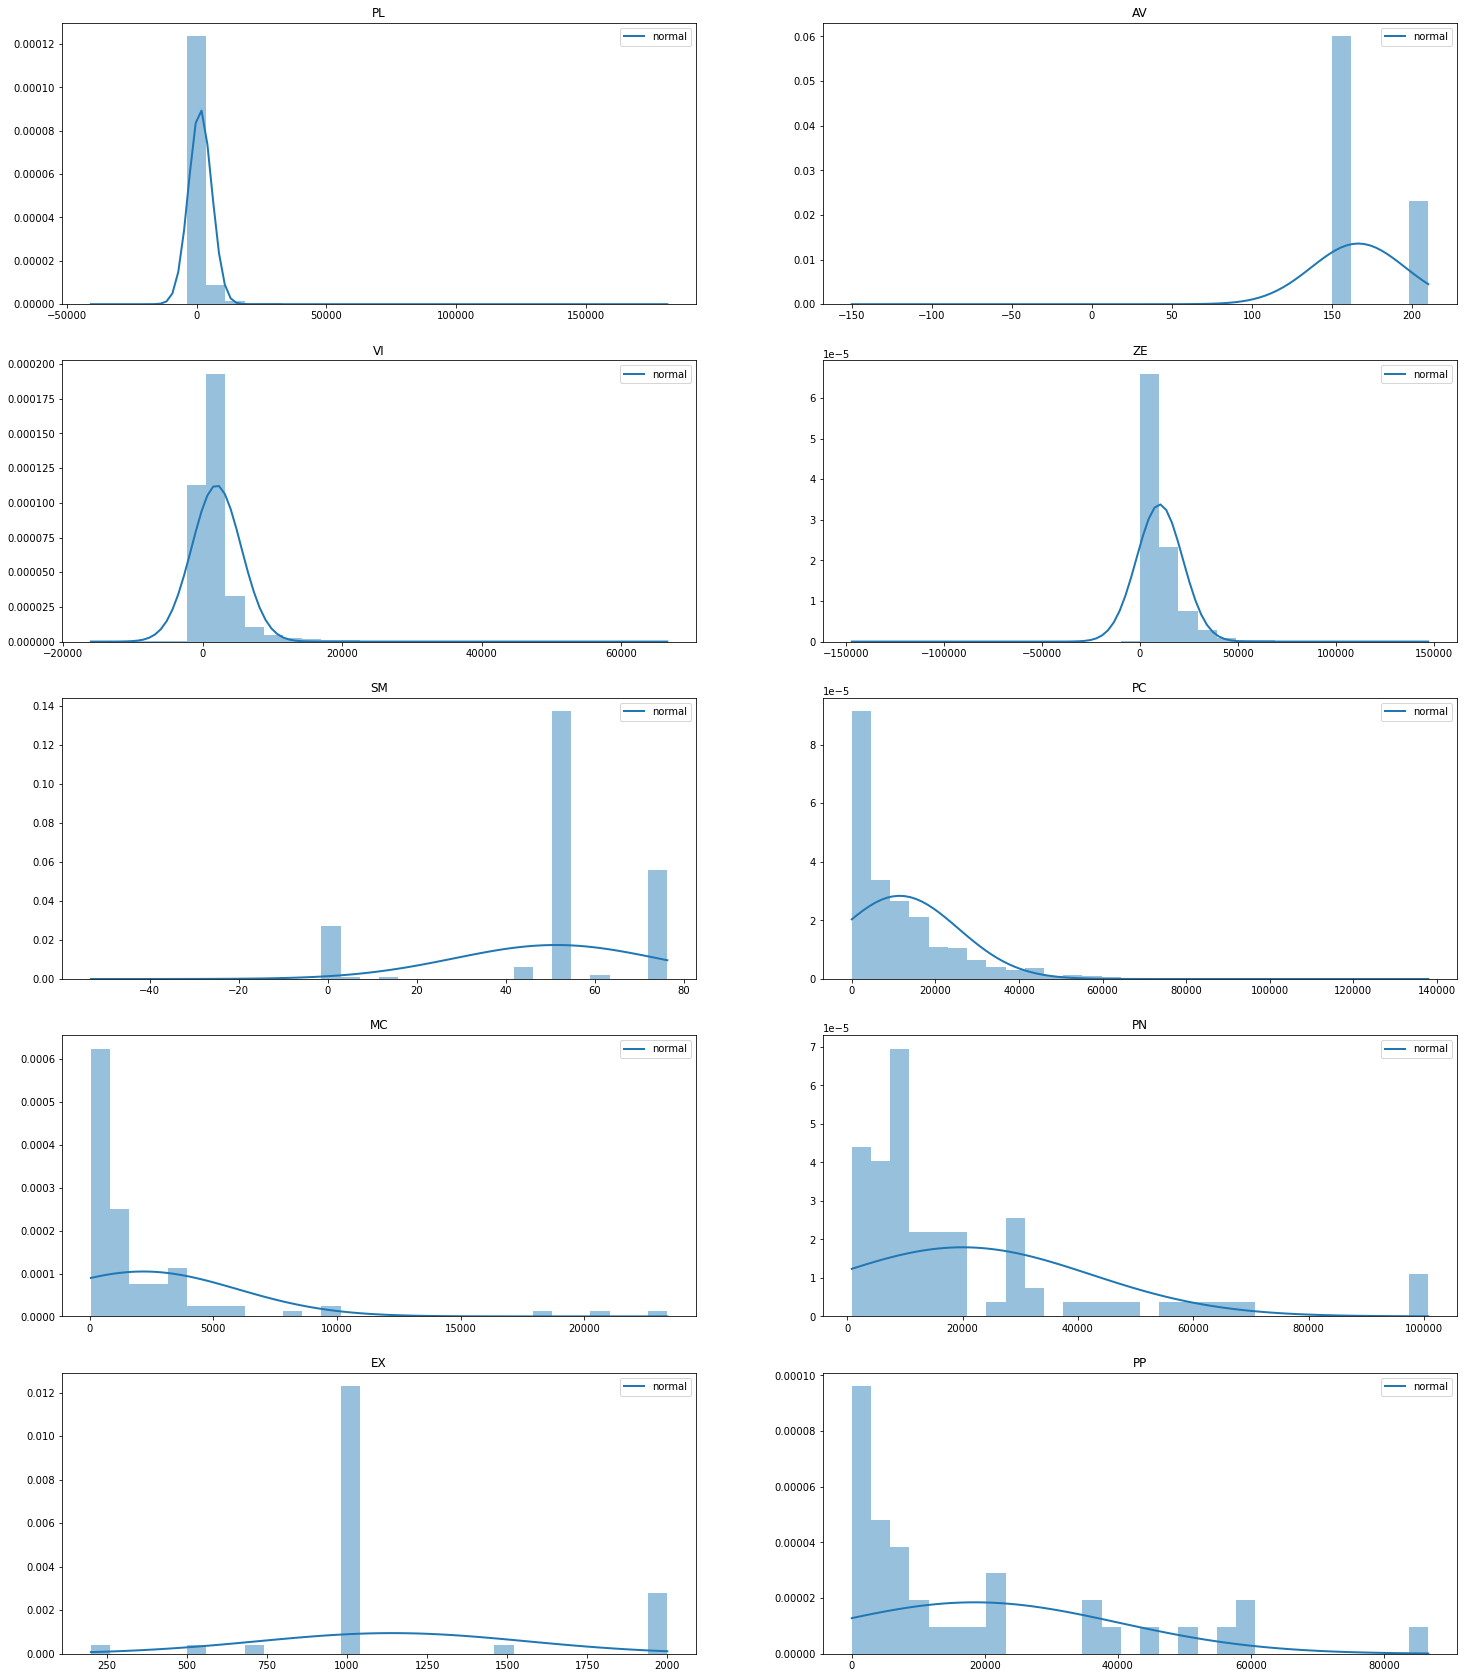

In [65]:
# Separamos el df en los tipos de moneda
monto = 'monto_compra_movimiento'
moneda = 'moneda_movimiento'
producto = 'producto_movimiento'

dff = df_pes

mu, sigma = stats.norm.fit(dff[monto])

fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(25,30))

prods = dff[producto].value_counts().index.tolist()

dff = dff[dff[producto]=='PL']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[0][0].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[0][0].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[0][0].set_title('PL')
axes[0][0].legend();

dff = df_pes
dff = dff[dff[producto]=='AV']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[0][1].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[0][1].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[0][1].set_title('AV')
axes[0][1].legend();

dff = df_pes
dff = dff[dff[producto]=='VI']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[1][0].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[1][0].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[1][0].set_title('VI')
axes[1][0].legend();

dff = df_pes
dff = dff[dff[producto]=='ZE']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[1][1].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[1][1].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[1][1].set_title('ZE')
axes[1][1].legend();

dff = df_pes
dff = dff[dff[producto]=='SM']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[2][0].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[2][0].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[2][0].set_title('SM')
axes[2][0].legend();

dff = df_pes
dff = dff[dff[producto]=='PC']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[2][1].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[2][1].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[2][1].set_title('PC')
axes[2][1].legend();

dff = df_pes
dff = dff[dff[producto]=='MC']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[3][0].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[3][0].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[3][0].set_title('MC')
axes[3][0].legend();

dff = df_pes
dff = dff[dff[producto]=='PN']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[3][1].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[3][1].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[3][1].set_title('PN')
axes[3][1].legend();

dff = df_pes
dff = dff[dff[producto]=='EX']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[4][0].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[4][0].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[4][0].set_title('EX')
axes[4][0].legend();

dff = df_pes
dff = dff[dff[producto]=='PP']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axes[4][1].plot(x_hat, y_hat, linewidth=2, label='normal')
axes[4][1].hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
axes[4][1].set_title('PP')
axes[4][1].legend();

##### Productos en Dolares

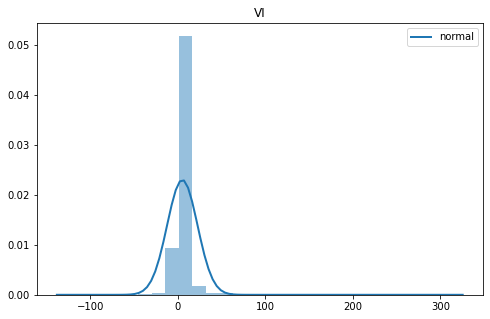

In [66]:
dff = df_usd[df_usd[producto]=='VI']
mu, sigma = stats.norm.fit(dff[monto])
x_hat = np.linspace(min(dff[monto]), max(dff[monto]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=dff[monto], bins=30, density=True, color="#3182bd", alpha=0.5)
ax.set_title('VI')
ax.legend();

La linea en cada grafico indica una normal teorica, que usamos para poder ver rapidamente si puede o no haber normalidad en los datos. 

#### Observaciones de las distribuciones del monto por producto

##### Productos en Pesos

- Plan Largo (PL): Este producto es el que concentra la mayoría de los casos, los cuales se encuentran centrados cerca de 0. La frecuencia en este punto esta muy por encima de lo que debería considerarse normal.

- Revista Convivimos (AV): Parecen ser costos fijos. La variable en este caso solo asume dos valores. Podría tratarse como una variable categorica. 

- Visa (VI): Se distribuye similar a Plan Largo, con concentración en el 0, con la diferencia de que tiene mayor frecuencia para ambos lados de la central.

- Zeta Optada(ZE): Similar a Visa, con mayor frecuencia hacia la derecha. 

- Mensaje de texto a celulares (SM): Similar a AV, parece tratarse de un costo fijo. Asume solo ciertos valores puntuales. 

- Plan de cuotas (PC): La mayor cantidad de datos están concentrados entre 0 y 20000, con alta frecuencia cercana a 0.

- Master Card (MC): Nuevamente la mayoría de casos están concentrados cerca de 0, llegando a 5000. Luego encontramos algunos casos aislados alrededor de 10000 y 20000.

- Préstamos Personales (PN): Montos agrupados en rangos. La mayor cantidad entre 0 y 20000. Luego otros grupos entre 40000 y 60000, entre 60000 y 80000, y por último cerca de 100000 

- Plan de Pago Propuesto (PP): Similar a PN, los montos se agrupan en rangos. Mayoría de casos entre 0 y 20000. Luego otro grupo entre 40000 y 60000, y por último cerca de 80000

- Extracción de cajero Nacional(EX): Muy centrado en el 1000 con casos aislados alrededor. 

##### Productos en Dolares

- Visa (VI): Se distribuye similar a los montos en Pesos para el mismo producto, centrado cerca de 0.

##### Conclusión

En base a lo que se puede observar de los gráficos se puede concluir que **ninguna distribución del monto por producto se asemeja a una población normal con misma media y varianza que la calculada para cada caso segun los datos**. 

### 5)	Cómo es la distribución de monto_compra_movimiento condicionada a otra variable?



Vamos a analizar la distribución de monto_compra_movimiento en función al sexo y al estado civil de la persona. Como argumentamos anteriormente, vamos a trabajar sobre el Dataset en Pesos.

Para este análisis vamos a crear un nuevo DataFrame con dichas variables, eliminando los valores en blanco.

In [67]:
df_persona=pd.DataFrame(df_pes[["estado_civil","sexo", "monto_compra_movimiento"]])
df_persona = pd.DataFrame(df_persona).dropna(subset=['sexo'])
df_persona.isna().sum()

estado_civil               0
sexo                       0
monto_compra_movimiento    0
dtype: int64

In [68]:
df_persona.estado_civil = df_persona.estado_civil.replace(dic_estado_civil)
df_persona.sexo = df_persona.sexo.replace(dic_sexo)
df_persona = df_persona.sort_values(by="sexo", ascending=False)
df_persona[:3]

,estado_civil,sexo,monto_compra_movimiento
15886,Separación de hecho,Mujer,210.00
38590,Soltero/a,Mujer,77.34
16892,Sin Datos,Mujer,19.40


####Frecuencia entre las variables categóricas

<AxesSubplot:xlabel='estado_civil', ylabel='sexo'>

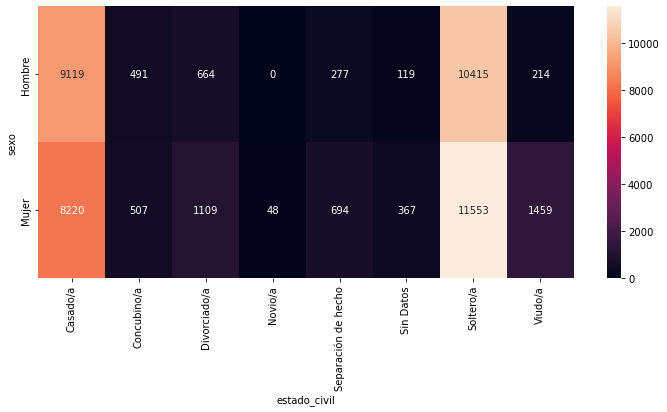

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
exp = pd.crosstab(df_persona.sexo,
                  df_persona.estado_civil)
sns.heatmap(exp, annot=True, fmt='g')

Se observa que el Dataset se encuentra concentrado en los Solteros y Casados, sin una diferencia significativa entre hombres y mujeres.

####Distribución de monto_compra_movimiento

In [70]:
df_persona.groupby(['estado_civil', 'sexo'])['monto_compra_movimiento'].describe().round(2).sort_values(by="estado_civil", ascending=True)

count     mean       std        min     25%  \
estado_civil        sexo                                                    
Casado/a            Hombre   9119.0  2115.85   6051.14  -23500.00   80.00   
                    Mujer    8220.0  1870.79   5715.77 -147263.64   69.20   
Concubino/a         Hombre    491.0  1905.18   5624.23  -17210.32   91.94   
                    Mujer     507.0  2218.78   6078.29    -569.85   74.04   
Divorciado/a        Hombre    664.0  1802.12   5392.36   -4779.18   68.24   
                    Mujer    1109.0  1597.31   3729.10   -1158.00  120.00   
Novio/a             Mujer      48.0  2184.13   4284.14      -1.21  101.17   
Separación de hecho Hombre    277.0  1513.60   4491.97  -29999.00  140.04   
                    Mujer     694.0  1808.73   5280.34  -15999.00   74.12   
Sin Datos           Hombre    119.0   752.11   1294.14    -301.29   16.12   
                    Mujer     367.0  1475.48   3461.24  -26457.60   92.40   
Soltero/a           Hombre  10415.0  2016.65   5986.80  -11971.00   74.12   
                    Mujer   11553.0  1859.38   5523.36  -40701.40   73.19   
Viudo/a             Hombre    214.0  3212.84  10186.96   -1239.86   66.36   
                    Mujer    1459.0  1818.09   5209.74   -4100.00   78.63   

                               50%      75%        max  
estado_civil        sexo                                
Casado/a            Hombre  301.29  1620.63  130087.62  
                    Mujer   301.29  1583.64  147263.64  
Concubino/a         Hombre  300.00  1274.74   70687.00  
                    Mujer   301.29  1604.00   72079.84  
Divorciado/a        Hombre  278.92  1209.25   66623.71  
                    Mujer   306.00  1300.00   44950.98  
Novio/a             Mujer   301.29  1587.82   21739.43  
Separación de hecho Hombre  344.85  1079.76   33225.69  
                    Mujer   284.17  1174.79   63446.88  
Sin Datos           Hombre  301.29   748.18    6917.56  
                    Mujer   357.33  1611.44   28454.88  
Soltero/a           Hombre  301.29  1329.54  181278.90  
                    Mujer   301.29  1450.58  137899.34  
Viudo/a             Hombre  301.29  2392.94  117661.19  
                    Mujer   301.29  1187.56   65656.57

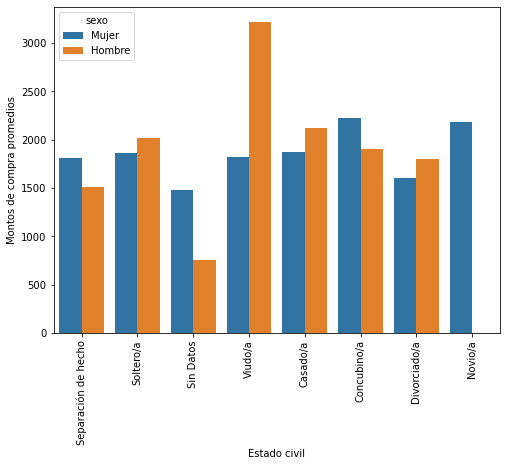

In [71]:
fig = plt.figure(figsize=(8,6))
sns.barplot(y=df_persona['monto_compra_movimiento'], x= df_persona.estado_civil,
                hue= df_persona.sexo,
                estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.ylabel("Montos de compra promedios")
plt.xlabel("Estado civil")
plt.ticklabel_format(style='plain', axis='y')

No se observan grandes diferencias en el consumo medio de estos grupos. La mayoría de los casos se encuentran entre 1500 y 2000. Puntualmente, podemos observar que el grupo de hombres viudos tienen un consumo medio por encima de los 3000.

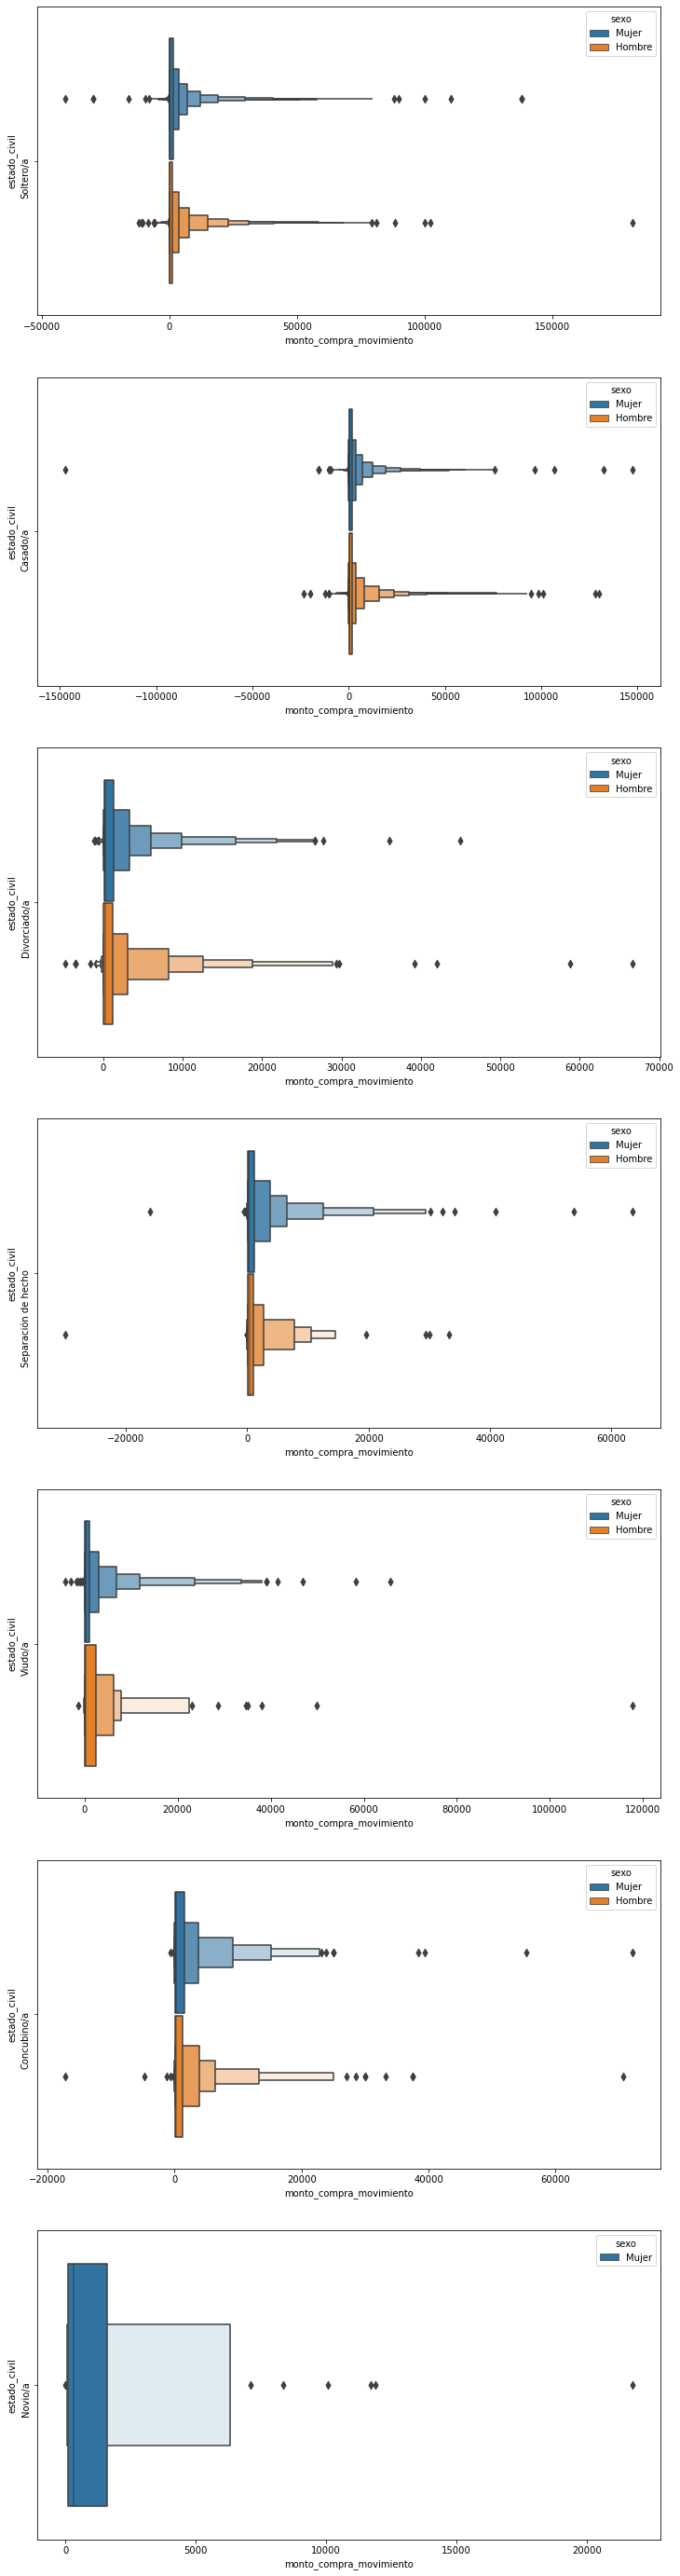

In [72]:
fig, axes = plt.subplots(7, figsize=(12,50))

sns.boxenplot(ax=axes[0], data=df_persona[df_persona["estado_civil"] == "Soltero/a"], x='monto_compra_movimiento', y="estado_civil", hue='sexo')
sns.boxenplot(ax=axes[1], data=df_persona[df_persona["estado_civil"] == "Casado/a"], x='monto_compra_movimiento', y="estado_civil", hue='sexo')
sns.boxenplot(ax=axes[2], data=df_persona[df_persona["estado_civil"] == "Divorciado/a"], x='monto_compra_movimiento', y="estado_civil", hue='sexo')
sns.boxenplot(ax=axes[3], data=df_persona[df_persona["estado_civil"] == "Separación de hecho"], x='monto_compra_movimiento', y="estado_civil", hue='sexo')
sns.boxenplot(ax=axes[4], data=df_persona[df_persona["estado_civil"] == "Viudo/a"], x='monto_compra_movimiento', y="estado_civil", hue='sexo')
sns.boxenplot(ax=axes[5], data=df_persona[df_persona["estado_civil"] == "Concubino/a"], x='monto_compra_movimiento', y="estado_civil", hue='sexo')
sns.boxenplot(ax=axes[6], data=df_persona[df_persona["estado_civil"] == "Novio/a"], x='monto_compra_movimiento', y="estado_civil", hue='sexo')

for ax in axes:
  ax.tick_params(axis='y', rotation=90)

•	Soltero/a:
La distribución de la variable monto_compra_movimiento es muy similar entre hombres y mujeres que están solteros, tanto en los valores medios, desviación estándar y hasta el tercer quartil. En ambos casos tenemos valores extremos positivos como negativos, los hombres tienen el valor máximo positivo más alto (más de 180000) y las mujeres tienen el valor mínimo más bajo (-40000).

•	Casado/a: 
En este grupo observamos nuevamente que los valores medios son cercanos a los 2000. Para el caso de las mujeres los valores atípicos comienzan antes, en los 75000 aproximadamente, llegando a un valor máximo cercano a los 150000, mientras que para los hombres los valores atípicos comienzan en los 100000 llegando a los 130000. Cabe destacar que el valor máximo para el caso de las mujeres coincide con su valor mínimo, lo que puede deberse a un consumo devuelto por Naranja. 


•	Divorciado/a: 
A partir de este grupo, disminuye bastante la cantidad de movimientos detectados. Cabe destacar que las mujeres casi duplican la frecuencia de los consumos de los hombres.  Continuamos con valores medios cercanos a los 2000. Pareciera que los hombres concentran mayor cantidad de casos entre 0 y 10000. Los valores atípicos comienzan en los 30000 aproximadamente, llegando a un valor máximo superior a los 60000 para los hombres y superior a los 40000 para las mujeres. 


•	Separados de hecho: Nuevamente, tenemos mayor cantidad de mujeres que de hombres. La distribución para los hombres muestra frecuencias considerables hasta 15000 aproximadamente. Luego de eso, tenemos outliers hasta valores superiores a los 30000. Para el caso de las mujeres, llegan a consumir hasta los 30000 aproximadamente, luego encontramos valores extremos hasta los 60000. 


•	Viudo/a: En este grupo de personas tenemos una mayor proporción de mujeres. Los valores más frecuentes en los hombres llegan hasta los 20000, teniendo un valor máximo aislado cercano a los 120000. En las mujeres tenemos valores con mayor frecuencia hasta los 40000 aproximadamente. Existen outliers superiores a los 60000.

•	Concubino/a: en este grupo observamos una distribución muy similar para ambos sexos, con la única diferencia de que los hombres tienen valores extremos negativos cercanos a los -20000 pesos, lo que no ocurre para las mujeres. 


•	Novio: solo encontramos mujeres en este grupo. Cabe mencionar que la distribución tiene una frecuencia considerable hasta los 5000 pesos, el resto pueden considerarse outliers. 


### 6)	Entre qué variables de las seleccionadas existe más correlación?


En primer lugar, armamos un df nuevo considerando unicamente las variables numericas que puedan llegar a tener correlacion entre si. 

Consideramos:
- monto_compra_movimiento
- fecha_cupon_movimiento
- fecha_nacimiento

In [73]:
df_corr = df_2[['monto_compra_movimiento', 'fecha_cupon_movimiento', 'fecha_nacimiento']]
df_corr = pd.DataFrame(df_corr).dropna(subset=['fecha_nacimiento'])

In [74]:
# Convertimos a datetime las columnas con fechas
df_corr['fecha_cupon_movimiento'] = pd.to_datetime(df_corr['fecha_cupon_movimiento'])
df_corr['fecha_cupon_movimiento'] = df_corr['fecha_cupon_movimiento'].apply(lambda x: x.toordinal())

df_corr['fecha_nacimiento'] = pd.to_datetime(df_corr['fecha_nacimiento'])
df_corr['fecha_nacimiento'] = df_corr['fecha_nacimiento'].apply(lambda x: x.toordinal())

In [75]:

corr = df_corr.corr()[['monto_compra_movimiento']].sort_values(by ='monto_compra_movimiento',ascending = False).style.background_gradient()
corr

,monto_compra_movimiento
monto_compra_movimiento,1.000000
fecha_cupon_movimiento,0.017804
fecha_nacimiento,0.004221


A partir del cálculo numérico, podemos ver que no existe correlación entre las variables numericas del dataset. Sin embargo, esto no significa que la variable monto_compra_movimiento no este condicionada por las otras variables. Con respecto a la fecha de nacimiento, se profundiza el análisis en la consigna 5) de análisis estadístico. Y considerando la fecha del cupón, se grafican las tendencias en la consigna 8), tambien de análisis estadístico. Consideramos que en estos apartados es posible obtener mejores conclusiones acerca de la correlación posible entre estas variables.

### 7)	Como se distribuyen los productos en funcion al tipo de modena?


In [76]:
pd.crosstab(df.moneda_movimiento, df.producto_movimiento)

producto_movimiento,AV,AX,EX,MC,PC,PL,PN,PP,SM,TA,VI,ZE
moneda_movimiento,,,,,,,,,,,,
0,722,3,42,103,890,27904,82,36,2765,3,5140,1906
1,0,0,0,28,0,25,0,0,0,0,858,0
3,0,0,0,0,0,5810,0,0,0,0,0,0


Observaciones:

- El producto con mas consumos en pesos es PL
- El producto con mas consumos en dólares es VI
- El único producto con consumos de tipo Z (Pesos) es PL

Text(0.5, 1.0, 'Distribucion de los productos en función al tipo de moneda')

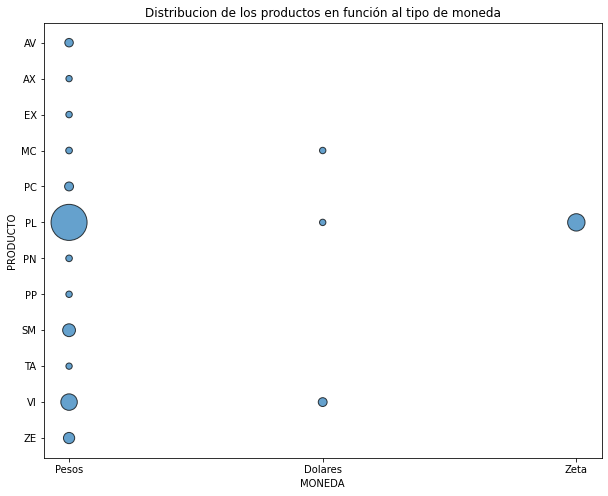

In [77]:
data = df_2.groupby(['producto_movimiento','moneda_movimiento']).size().to_frame()
data = data.reset_index(level=['producto_movimiento','moneda_movimiento'])
data.moneda_movimiento = data.moneda_movimiento.replace(dic_monedas)
data = data.rename(columns = {0:'cant'})
data.sort_values(by='cant',ascending=False)

fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=data, x="moneda_movimiento", y="producto_movimiento", color="#3182bd", size="cant", 
                edgecolor='black', linewidth=1, alpha=0.75, legend=False, sizes=(40, 1300))
ax.set_xlabel("MONEDA")
ax.set_ylabel("PRODUCTO")
ax.set_title("Distribucion de los productos en función al tipo de moneda")
#plt.savefig('drive/MyDrive/Diplomatura/producto_tipo_de_moneda.png')

Este grafico es una ilustracion de la tabla anterior, donde queda evidente el contraste en casos para PL en pesos en comparacion con el resto de los productos y monedas. 

## 3. Análisis Estadístico

### 1) Qué producto/s movimiento están en todas o casi todas las provincias?

* Mostramos las Provincias que se consideran en el dataset.

In [78]:
pd.DataFrame({'Provincias': df_2['provincia'].unique()}).sort_values(by='Provincias',ascending=True).reset_index().drop(columns=['index'])

,Provincias
0,BUENOS AIRES
1,CAPITAL FEDERAL
2,CATAMARCA
3,CHACO
4,CHUBUT
5,CORDOBA
6,CORRIENTES
7,ENTRE RIOS
8,FORMOSA
9,JUJUY


Tenemos 24 provincias dentro del dataset. Se trabajará con una porción del dataset donde sólo estén las filas que no tienen valores nulos para las provincias (con esto se eliminan alrededor de 500 casos).

Procedemos a contar la frecuencia de las provincias dentro de cada producto

In [79]:
cant_pm_prov = df_2[df_2['provincia'].isna() == False][['producto_movimiento', 'provincia']].drop_duplicates().groupby(['producto_movimiento']).size().to_frame()
cant_pm_prov = cant_pm_prov.reset_index(level=['producto_movimiento'])
cant_pm_prov = cant_pm_prov.rename(columns = {0:'Cant_Prov'})
cant_pm_prov.sort_values(by='Cant_Prov',ascending=False)

,producto_movimiento,Cant_Prov
5,PL,24
8,SM,24
10,VI,24
11,ZE,24
4,PC,22
0,AV,21
6,PN,18
3,MC,10
7,PP,10
2,EX,4


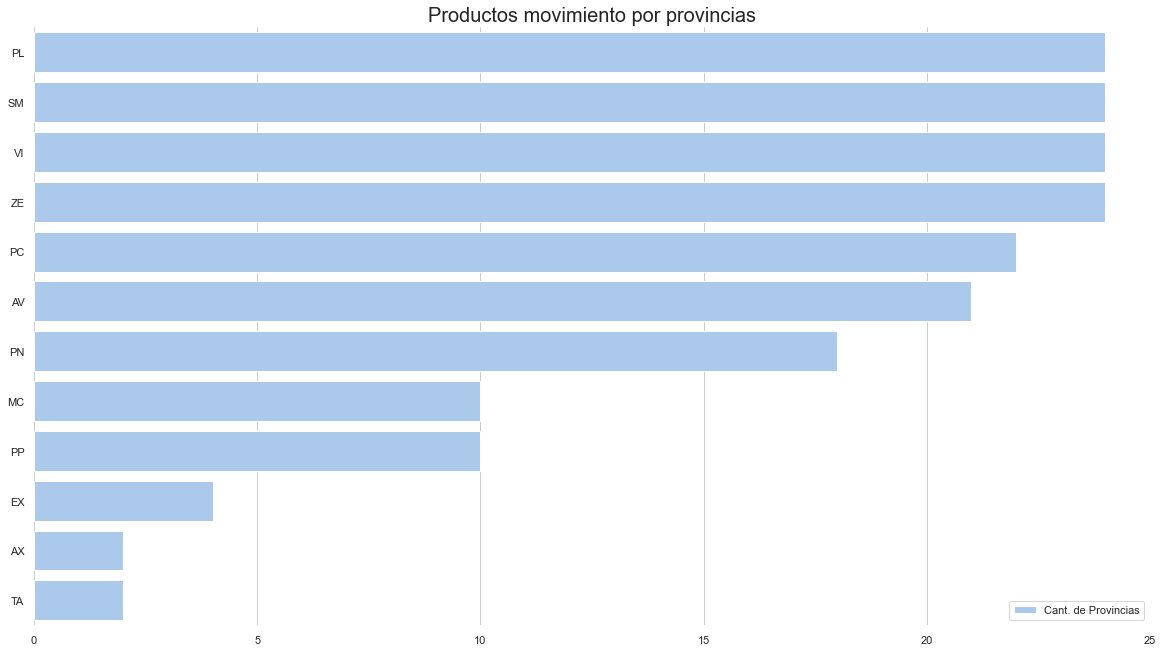

In [80]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20,11))

cant_pm_prov = cant_pm_prov.sort_values(by='Cant_Prov',ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Cant_Prov", y="producto_movimiento", data=cant_pm_prov,
            label="Cant. de Provincias", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 25), ylabel="",
       xlabel="")
ax.set_title('Productos movimiento por provincias', fontsize=20)
sns.despine(left=True, bottom=True)

Los productos que están en todas las provincias son:
* **PL** (Plan Largo)
* **SM** (Mensajes de Texto a Celulares)
* **VI** (Visa)
* **ZE** (Zeta)

Los siguientes 3 productos están en **casi** todas las provincias:
* **PC** (Plan de Cuotas): **22** Provincias
* **AV** (Revista Convivimos): **21** Provincias
* **PN** (Prestamos Personales PN): **18** Provincias

### 2) Como se ditribuyen los montos para los productos anteriores acorde a la provincia? Que conclusiones podemos sacar de esto?

In [81]:
# DataFrame de Pesos
df_pes_p = df_2[(df_2['provincia'].isna() == False) & (df_2['moneda_movimiento'] != 1)]

# DataFrame de Dolar
df_usd_p = df_2[(df_2['provincia'].isna() == False) & (df_2['moneda_movimiento'] == 1)]

Tomaremos los productos más populares

In [82]:
pd.set_option('display.max_rows', 100)
productos_movimientos = ['PL','VI','SM','ZE']
data_1 = df_pes_p[(df_pes_p['producto_movimiento'].isin(productos_movimientos))]


##### PL (Plan Largo)

In [83]:
data_1[data_1['producto_movimiento']=='PL'][['producto_movimiento', 'provincia','monto_compra_movimiento']]\
            .groupby(['producto_movimiento','provincia'])[['monto_compra_movimiento']].describe()

monto_compra_movimiento               \
                                                       count         mean   
producto_movimiento provincia                                               
PL                  BUENOS AIRES                      4932.0   908.548052   
                    CAPITAL FEDERAL                    924.0  1040.354058   
                    CATAMARCA                          809.0  1954.232645   
                    CHACO                             1315.0  1267.928890   
                    CHUBUT                            1119.0  1478.087694   
                    CORDOBA                           7181.0  1458.035379   
                    CORRIENTES                        1218.0  1458.874425   
                    ENTRE RIOS                         967.0  1279.084726   
                    FORMOSA                            720.0  1509.863653   
                    JUJUY                              800.0  1365.366512   
                    LA PAMPA                           133.0  1817.169699   
                    LA RIOJA                           689.0  1746.874601   
                    MENDOZA                           2332.0  1207.671741   
                    MISIONES                           514.0  1069.698463   
                    NEUQUEN                            879.0  1444.846234   
                    RIO NEGRO                          482.0  1601.118485   
                    SALTA                             1022.0  1768.739139   
                    SAN JUAN                           520.0  1864.943481   
                    SAN LUIS                           584.0  1263.324812   
                    SANTA CRUZ                         321.0  2592.280031   
                    SANTA FE                          2374.0   817.104566   
                    SGO. DEL ESTERO                    858.0  1737.121166   
                    TIERRA DEL FUEGO                    78.0  1119.521667   
                    TUCUMAN                           2581.0  1699.621871   

                                                                       \
                                              std       min       25%   
producto_movimiento provincia                                           
PL                  BUENOS AIRES      3770.154999 -29999.00   29.6100   
                    CAPITAL FEDERAL   4239.726639 -15856.09    7.6450   
                    CATAMARCA         4117.932711  -4939.18  148.9000   
                    CHACO             4200.013512  -3770.00  123.7300   
                    CHUBUT            4979.236438  -4980.00  141.3800   
                    CORDOBA           4808.857270 -23500.00  102.9900   
                    CORRIENTES        5278.279307  -2850.00   57.2300   
                    ENTRE RIOS        4498.717818  -4779.18   69.2000   
                    FORMOSA           5291.193473   -469.90   65.2875   
                    JUJUY             4522.162047  -7351.14   14.3700   
                    LA PAMPA          4476.338608  -6356.47  117.5500   
                    LA RIOJA          5698.402331  -5380.00  104.3200   
                    MENDOZA           3306.071916  -3785.00   35.6650   
                    MISIONES          2532.651444  -1276.38  142.1300   
                    NEUQUEN           4522.459886 -26457.60   74.1200   
                    RIO NEGRO         4365.840263  -1017.90   73.2275   
                    SALTA             4356.613374  -3400.00  101.1700   
                    SAN JUAN          6333.417711  -5430.00   14.7900   
                    SAN LUIS          3000.886571  -1059.80   69.6625   
                    SANTA CRUZ        6667.767279 -40701.40  204.4900   
                    SANTA FE          1996.582324  -3960.00   11.1550   
                    SGO. DEL ESTERO   5743.564643 -29650.00  150.0000   
                    TIERRA DEL FUEGO  3618.886669   -392.50   59.8575   
                    TUCUMAN           5202.753525  -8367.73

Text(0.5, 1.0, 'Producto: PL')

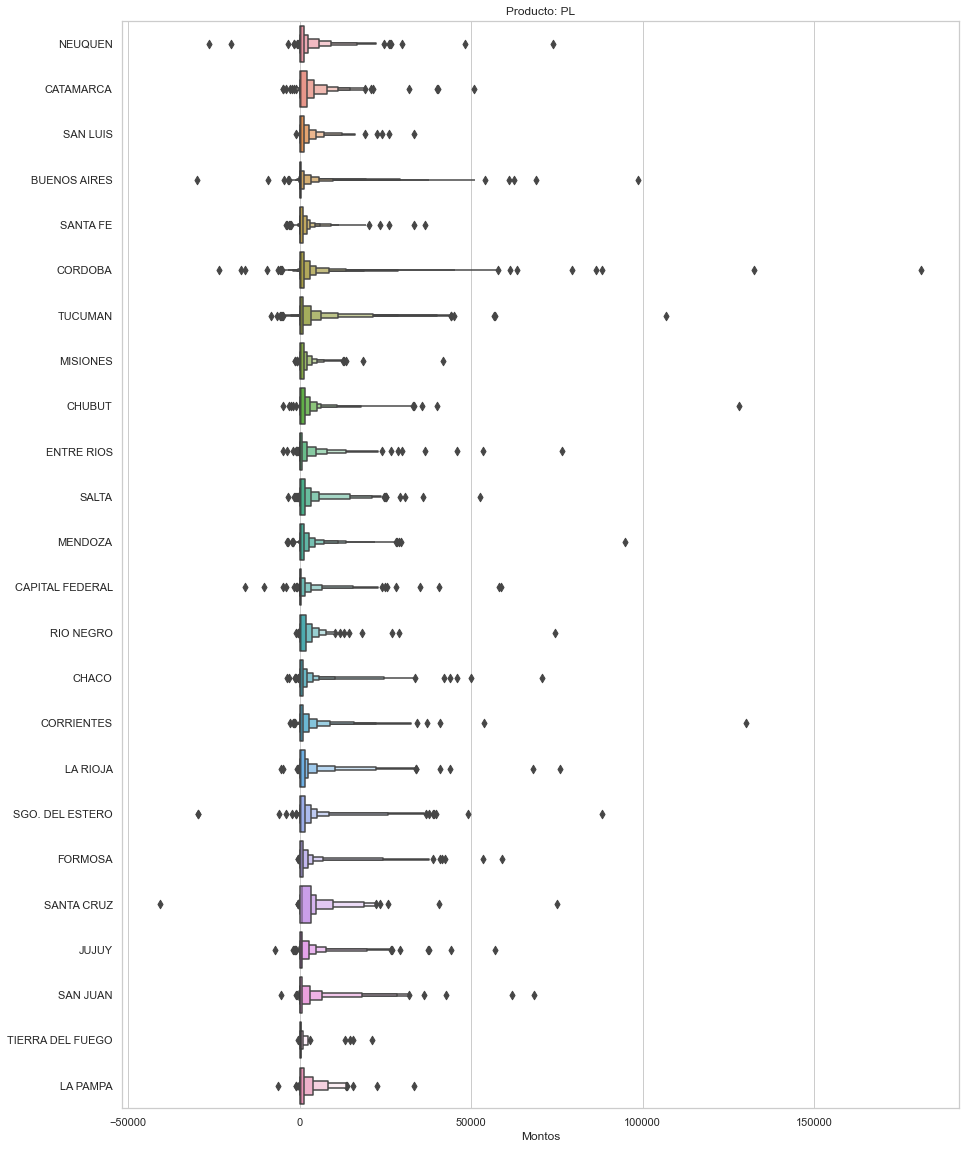

In [84]:
plt.figure(figsize=(15,20))
sns.boxenplot(data=data_1[data_1['producto_movimiento']=='PL'], x='monto_compra_movimiento', y='provincia')
plt.xlabel('Montos')
plt.ylabel('')
plt.title('Producto: PL')

Observaciones

* Córdoba y Buenos Aires tienen consumos frecuentes por encima de los 50000. Seguidos por Formosa, Tucumán y Santiago Del Estero. 
* El resto de las provincias llegan a 25000 con excepción de Santa Cruz, Tierra Del Fuego, La Pampa, Rio Negro, Misiones y San Luis, que no llegan a los 10000
* Córdoba, Chubut y Corrientes tienen los mayores outlier positivos, y Santa Cruz y Santiago Del Estero tienen los mayores outliers negativos.

#### VI (Visa)

In [85]:
data_1[data_1['producto_movimiento']=='VI'][['producto_movimiento', 'provincia','monto_compra_movimiento']]\
            .groupby(['producto_movimiento','provincia'])[['monto_compra_movimiento']].describe()

monto_compra_movimiento               \
                                                       count         mean   
producto_movimiento provincia                                               
VI                  BUENOS AIRES                      1391.0  2054.843853   
                    CAPITAL FEDERAL                    268.0  1927.977052   
                    CATAMARCA                           65.0  2241.268769   
                    CHACO                              172.0  2146.116279   
                    CHUBUT                             516.0  1491.727558   
                    CORDOBA                            346.0  2757.969133   
                    CORRIENTES                         206.0  2129.065922   
                    ENTRE RIOS                         151.0  1562.653377   
                    FORMOSA                            122.0  3033.987787   
                    JUJUY                               77.0  2336.885844   
                    LA PAMPA                            27.0  4669.825926   
                    LA RIOJA                           140.0  1840.974929   
                    MENDOZA                            128.0  1940.092734   
                    MISIONES                            76.0  1403.016579   
                    NEUQUEN                            185.0  2883.173297   
                    RIO NEGRO                           56.0  2898.339821   
                    SALTA                              124.0  1913.249113   
                    SAN JUAN                            57.0  2427.885789   
                    SAN LUIS                            21.0  2669.380476   
                    SANTA CRUZ                          37.0  1227.130541   
                    SANTA FE                           621.0  1362.077858   
                    SGO. DEL ESTERO                     52.0  2905.546731   
                    TIERRA DEL FUEGO                    95.0  1353.389789   
                    TUCUMAN                             96.0  2546.647604   

                                                                        \
                                              std       min        25%   
producto_movimiento provincia                                            
VI                  BUENOS AIRES      3296.078549 -10557.75   500.2000   
                    CAPITAL FEDERAL   3303.985908 -15856.09   477.5825   
                    CATAMARCA         5292.749185    100.00   282.5100   
                    CHACO             3388.144594  -1300.00   430.0000   
                    CHUBUT            2294.341370  -5984.30   500.0000   
                    CORDOBA           5308.816560 -12400.00   400.0000   
                    CORRIENTES        3104.550496 -15999.00   555.1925   
                    ENTRE RIOS        2746.607458     68.91   363.1500   
                    FORMOSA           4975.132237    150.00   405.3025   
                    JUJUY             4113.747880   -200.00   441.1500   
                    LA PAMPA          8366.426180    190.00   828.7450   
                    LA RIOJA          2636.447546   -190.00   605.1400   
                    MENDOZA           3902.264333  -9600.00   310.0000   
                    MISIONES          1964.911497     78.26   242.5950   
                    NEUQUEN           4045.038086 -11971.00   814.4800   
                    RIO NEGRO         3594.794943    541.45  1370.5000   
                    SALTA             3558.861839  -2500.00   441.1500   
                    SAN JUAN          3566.407442    100.00   359.1600   
                    SAN LUIS          2438.919940    190.00  1017.0000   
                    SANTA CRUZ        1822.838543     55.00   296.9900   
                    SANTA FE          2593.998870  -2319.84   360.0000   
                    SGO. DEL ESTERO   9239.079422   -399.00   399.0000   
                    TIERRA DEL FUEGO  1744.676874    110.00   590.0000   
                    TUCUMAN      

Text(0.5, 1.0, 'Producto: VI')

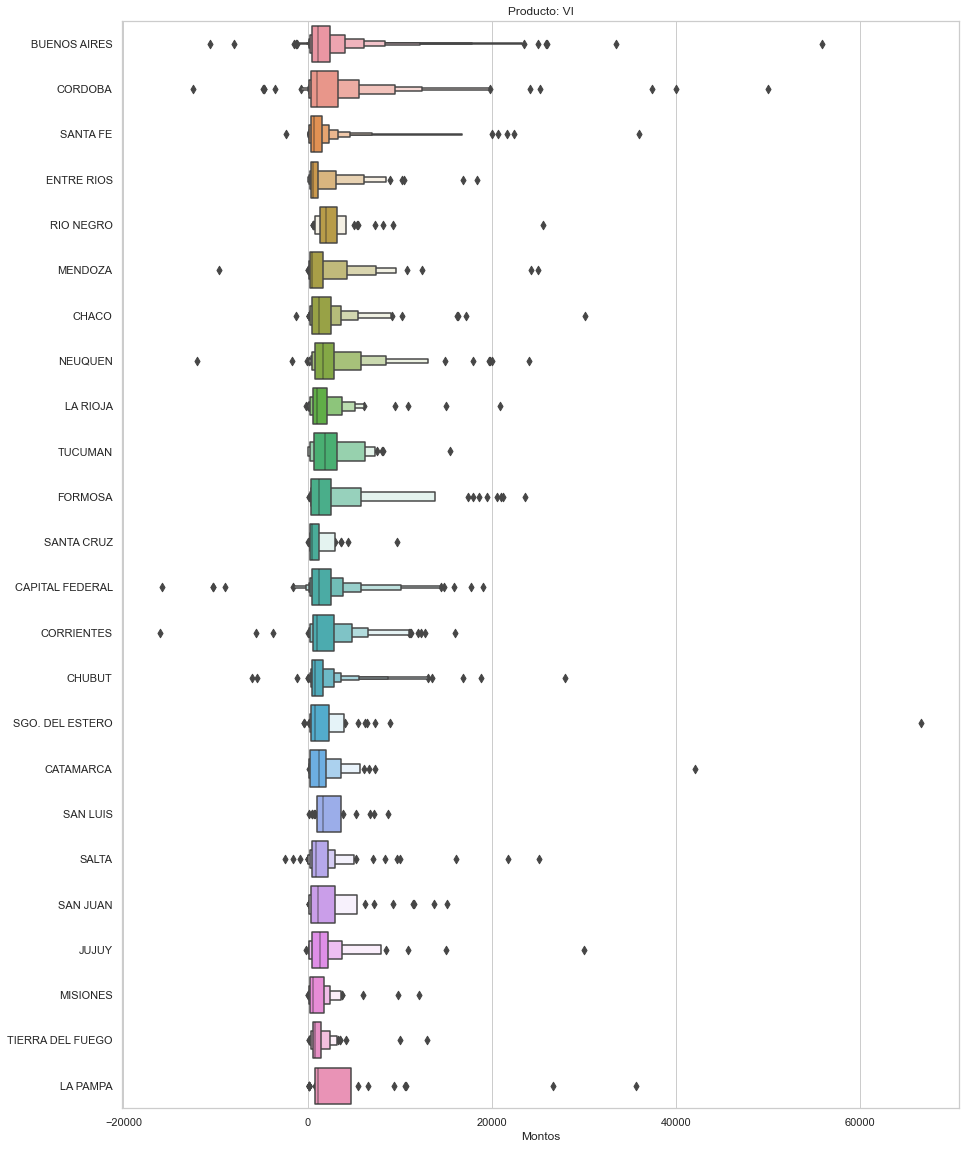

In [86]:
plt.figure(figsize=(15,20))
sns.boxenplot(data=data_1[data_1['producto_movimiento']=='VI'], x='monto_compra_movimiento', y='provincia')
plt.xlabel('Montos')
plt.ylabel('')
plt.title('Producto: VI')

Observaciones:

* Son los segundos productos con mayor consumo.
* Vemos que la concentración de la distribución, en comparación con PL, está más cerca del 0 y valores negativos, y su media está muy por debajo de los 10000.
* Buenos Aires, Córdoba, Santa Fe y Capital Federal concentran, respectivamente, la mayor cantidad de casos de montos entre 0 y 20000.
* Luego le siguen Chubut, Formosa, Corrientes y Neuquén con montos concentrados entre 0 y 10000
* En el resto de las provincias los consumos se concentran aproximadamente hasta los 5000 pesos.
* Santiago Del Estero, Catamarca, Buenos Aires y Córdoba tienen los outliers positivos mas altos
* Capital Federal y Corrientes tienen los outliers negativos mas bajos

#### SM (Mensajes de Texto a Celulares)

In [87]:
data_1[data_1['producto_movimiento']=='SM'][['producto_movimiento', 'provincia','monto_compra_movimiento']]\
            .groupby(['producto_movimiento','provincia'])[['monto_compra_movimiento']].describe()

monto_compra_movimiento             \
                                                       count       mean   
producto_movimiento provincia                                             
SM                  BUENOS AIRES                       400.0  51.426350   
                    CAPITAL FEDERAL                     51.0  51.674118   
                    CATAMARCA                           63.0  52.356508   
                    CHACO                              104.0  52.425577   
                    CHUBUT                              98.0  50.330306   
                    CORDOBA                            526.0  50.749335   
                    CORRIENTES                         119.0  51.735126   
                    ENTRE RIOS                          74.0  52.062703   
                    FORMOSA                             71.0  52.012958   
                    JUJUY                               69.0  51.959855   
                    LA PAMPA                            24.0  52.030000   
                    LA RIOJA                            40.0  52.030000   
                    MENDOZA                            234.0  52.205812   
                    MISIONES                            48.0  52.030000   
                    NEUQUEN                             71.0  52.012958   
                    RIO NEGRO                           56.0  50.764821   
                    SALTA                              124.0  47.964194   
                    SAN JUAN                            60.0  47.094667   
                    SAN LUIS                            87.0  52.252529   
                    SANTA CRUZ                          39.0  51.998974   
                    SANTA FE                           138.0  51.425000   
                    SGO. DEL ESTERO                     62.0  47.852419   
                    TIERRA DEL FUEGO                     8.0  43.000000   
                    TUCUMAN                            185.0  52.442054   

                                                                              \
                                            std    min    25%    50%     75%   
producto_movimiento provincia                                                  
SM                  BUENOS AIRES      23.365522 -53.24  53.24  53.24  53.240   
                    CAPITAL FEDERAL   23.033638 -22.99  53.24  53.24  53.240   
                    CATAMARCA         22.777635  -1.21  53.24  53.24  75.020   
                    CHACO             20.680230  -1.21  53.24  53.24  53.240   
                    CHUBUT            22.899034  -1.21  53.24  53.24  53.240   
                    CORDOBA           22.568950 -44.00  53.24  53.24  60.500   
                    CORRIENTES        23.058960  -1.21  53.24  53.24  75.020   
                    ENTRE RIOS        22.085399  -1.21  53.24  53.24  53.240   
                    FORMOSA           22.552320  -1.21  53.24  53.24  64.130   
                    JUJUY             22.880054  -1.21  53.24  53.24  75.020   
                    LA PAMPA          22.715628  -1.21  53.24  53.24  58.685   
                    LA RIOJA          22.520641  -1.21  53.24  53.24  58.685   
                    MENDOZA           22.290314  -1.21  53.24  53.24  75.020   
                    MISIONES          22.472673  -1.21  53.24  53.24  58.685   
                    NEUQUEN           22.552320  -1.21  53.24  53.24  64.130   
                    RIO NEGRO         23.106233  -1.21  53.24  53.24  53.240   
                    SALTA             23.866124  -1.21  44.77  53.24  53.240   
                    SAN JUAN          30.741485 -53.24  53.24  53.24  53.240   
                    SAN LUIS          22.628398  -1.21  53.24  53.24  75.020   
                    SANTA CRUZ        22.814175  -1.21  53.24  53.24  64.130   
                    SANTA FE          23.984531 -53.24  53.24  53.24  69.575   
                    SGO. DEL ESTERO   23.412077  -1.21  44.77  53.24  53.240   
           

Observaciones:

* No se grafica la distribución ya que se trata sobretodo de montos fijos. Se observa en el cuadro anterior que los valores no cambian entre las provincias. 
* Los montos corresponden a los valores mas bajos entre los distintos productos. 
* La concentración de montos en la mayoría de las provincias es en rango cercano a los 50 pesos.

#### ZE (Zeta)

In [88]:
data_1[data_1['producto_movimiento']=='ZE'][['producto_movimiento', 'provincia','monto_compra_movimiento']]\
            .groupby(['producto_movimiento','provincia'])[['monto_compra_movimiento']].describe()

monto_compra_movimiento                \
                                                       count          mean   
producto_movimiento provincia                                                
ZE                  BUENOS AIRES                       174.0   9320.088966   
                    CAPITAL FEDERAL                     46.0  11772.341739   
                    CATAMARCA                           61.0  11757.654098   
                    CHACO                               66.0   8678.370909   
                    CHUBUT                              78.0   8881.396026   
                    CORDOBA                            417.0   9669.016475   
                    CORRIENTES                          88.0   7013.436591   
                    ENTRE RIOS                          52.0   9705.169231   
                    FORMOSA                             34.0  14406.789412   
                    JUJUY                               49.0   9790.208367   
                    LA PAMPA                             9.0  10308.208889   
                    LA RIOJA                            37.0  14999.564595   
                    MENDOZA                            122.0  10460.410574   
                    MISIONES                            25.0   7636.489600   
                    NEUQUEN                             47.0  10378.785106   
                    RIO NEGRO                           36.0   8481.954444   
                    SALTA                               75.0   9596.316800   
                    SAN JUAN                            29.0  14196.995517   
                    SAN LUIS                            49.0   9238.033673   
                    SANTA CRUZ                          32.0  16686.114063   
                    SANTA FE                            96.0  11067.906771   
                    SGO. DEL ESTERO                     73.0   8888.223836   
                    TIERRA DEL FUEGO                     5.0   9059.558000   
                    TUCUMAN                            180.0   9353.722500   

                                                                          \
                                               std        min        25%   
producto_movimiento provincia                                              
ZE                  BUENOS AIRES       9957.557946     268.20  2992.2500   
                    CAPITAL FEDERAL   16197.859025     479.75  1644.3050   
                    CATAMARCA          8956.252909     577.78  5401.4000   
                    CHACO              8696.268255     380.00  3490.6050   
                    CHUBUT             6975.603534     580.00  4018.8100   
                    CORDOBA           12500.289810   -3510.00  3365.4200   
                    CORRIENTES         6492.173716     447.15  2862.0125   
                    ENTRE RIOS         7447.864812     704.00  4056.2150   
                    FORMOSA           15320.194083     171.60  2479.5625   
                    JUJUY             10294.757599     504.41  2756.0000   
                    LA PAMPA           3887.875367    5420.80  6950.0000   
                    LA RIOJA          17663.565535    1576.74  4290.0000   
                    MENDOZA            9651.372165     265.25  4284.5900   
                    MISIONES           5067.506186     475.00  3689.0000   
                    NEUQUEN            9470.260244     828.89  4045.0000   
                    RIO NEGRO          7626.707824     600.00  3237.4700   
                    SALTA             11130.925294     242.75  3214.1250   
                    SAN JUAN          12046.452216    1390.00  3600.0000   
                    SAN LUIS           8622.733818     420.00  3317.2600   
                    SANTA CRUZ        12872.954391    1000.00  7108.8900   
                    SANTA FE           8413.326976     901.97  5296.6900   
                    SGO. DEL ESTERO    8475.452835     520.75  3901.9500   
                    TIERRA DEL

Text(0.5, 1.0, 'Producto: ZE')

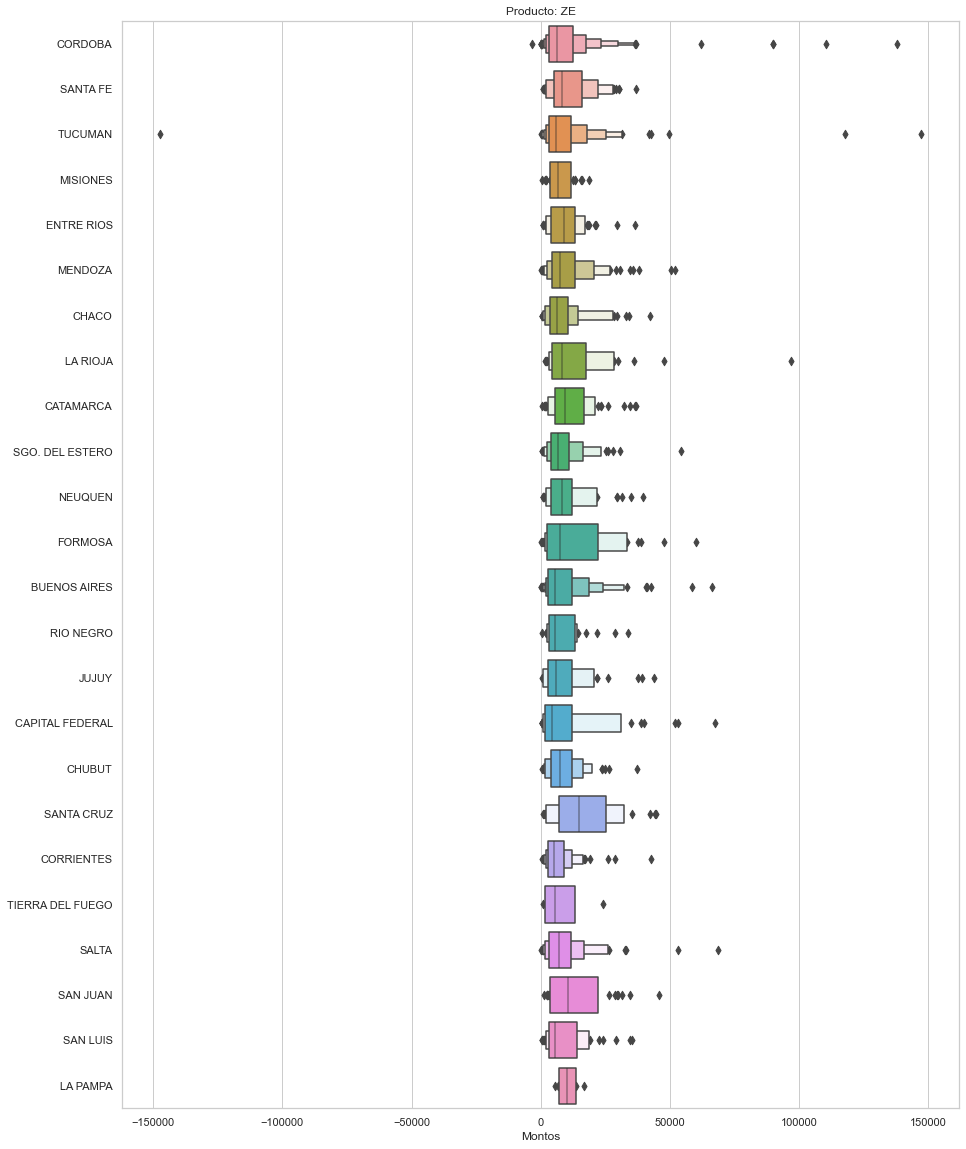

In [89]:
plt.figure(figsize=(15,20))
sns.boxenplot(data=data_1[data_1['producto_movimiento']=='ZE'], x='monto_compra_movimiento', y='provincia')
plt.xlabel('Montos')
plt.ylabel('')
plt.title('Producto: ZE')



Observaciones

* El consumo medio aumenta a valores cercanos a 10000 para todas las provincias.
* Si bien las distribuciones son mas similares que en el resto de los productos, podemos mencionar ciertas provincias con concentraciones en montos mas bajos: La Pampa, Tierra Del Fuego, Rio Negro, Neuquén, Chaco, Misiones y Entre Rios.
* En el caso de Tucumán, observamos que el valor máximo se compensa con su valor mínimo (Caso ya mencionado en el punto 5) de Analisis Inicial) 
* Córdoba es la otra provincia con mayores outliers



#### Conclusiones

* Podemos observar que la provincia con mayor dispersión es Cordoba, con los montos más altos, con mayor cantidad de movimientos y es la provincia que puede generarnos mas outliers respecto a otras provincias.
* Los montos se concentran en datos positivos.

### 3) y 4)	Qué tipos de productos tiene los montos entre los más altos y los mas baratos? En qué provincia se encuentran mayoritariamente?

Con un describe sobre las variables de producto y monto, podemos obtener los valores mas altos y mas bajos de cada producto.

También nos ayuda a ver la cantidad de movimientos de cada producto.

In [90]:
df_tprod[['tipo_producto_movimiento', 'monto_compra_movimiento']]\
            .groupby(['tipo_producto_movimiento'])[['monto_compra_movimiento']].describe().sort_values(by=('monto_compra_movimiento', 'mean'), ascending=False)

monto_compra_movimiento                            \
                                           count         mean          std   
tipo_producto_movimiento                                                     
American express                             7.0  5088.227143  8354.351795   
Naranja                                  20282.0  3574.502517  7941.253171   
Naranja virtual                            108.0  2914.201204  3224.408664   
Visa internacional                        6441.0  1692.671082  3246.794530   
Master internacional                       160.0  1415.623938  3229.189640   
Clasica                                  18408.0   228.743944  1349.513020   

                                                                             
                                min      25%      50%        75%        max  
tipo_producto_movimiento                                                     
American express             308.55   308.55   434.39  6220.2750   21817.00  
Naranja                  -147263.64   278.00  1087.10  3349.8600  181278.90  
Naranja virtual            -4980.00  2070.00  2844.00  3705.1275   28800.00  
Visa internacional        -15999.00   270.00   736.36  1962.6200   66623.71  
Master internacional           1.69    48.39   285.25  1264.0000   23362.27  
Clasica                   -29650.00    13.49    76.23   301.2900   41619.75

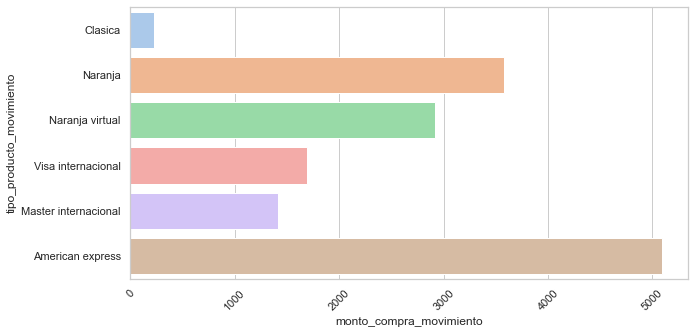

In [91]:
df_tp_mov = df_pes[['tipo_producto_movimiento', 'monto_compra_movimiento']]\
            .groupby(['tipo_producto_movimiento'])[['monto_compra_movimiento']].mean()\
            .reset_index(level=['tipo_producto_movimiento'])
df_tp_mov.tipo_producto_movimiento = df_tp_mov.tipo_producto_movimiento.replace(dic_tipo_prod)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df_tp_mov, y = 'tipo_producto_movimiento' , x = 'monto_compra_movimiento', palette="pastel")
ax.tick_params('x', rotation=45)

Podemos decir que el tipo de producto con mayores montos en pesos es 'American Express'. Sin embargo, este tipo de producto tiene muy baja frecuencia (7 casos). Se considera que 'Naranja' tiene una posición mas fuerte en los montos altos ya que cuenta con una mucho mayor cantidad de casos.

El tipo de producto con los montos mas baratos es 'Clasica'. Tiene el consumo medio mas bajo, y los montos en cada cuantil también corresponden a los mas bajos. 

#### Analisis por Provincia

In [92]:
tp_en_prov = df_pes[df_pes['tipo_producto_movimiento'] == 3]\
                    [['tipo_producto_movimiento', 'provincia','monto_compra_movimiento']]\
                    .groupby(['tipo_producto_movimiento','provincia'])[['monto_compra_movimiento']].mean()\
                    .sort_values(by=['monto_compra_movimiento'], ascending=False)\
                    .reset_index(level=['tipo_producto_movimiento','provincia'])
tp_en_prov

,tipo_producto_movimiento,provincia,monto_compra_movimiento
0,3,SAN JUAN,6922.430922
1,3,LA PAMPA,4847.628310
2,3,SANTA CRUZ,4808.918869
3,3,LA RIOJA,4746.851018
4,3,CAPITAL FEDERAL,4595.494678
5,3,CATAMARCA,4424.841603
6,3,RIO NEGRO,4168.318676
7,3,TUCUMAN,3964.955241
8,3,SALTA,3883.987326
9,3,FORMOSA,3697.520565


Como podemos observar, el tipo de producto 3, que corresponde a Naranja, aparece en todas las provincias, y el monto medio mas alto se encuentra en la provincia de **San Juan**.

In [93]:
tp_en_prov = df_pes[df_pes['tipo_producto_movimiento'] == 0]\
                    [['tipo_producto_movimiento', 'provincia','monto_compra_movimiento']]\
                    .groupby(['tipo_producto_movimiento','provincia'])[['monto_compra_movimiento']].mean()\
                    .sort_values(by=['monto_compra_movimiento'], ascending=False)\
                    .reset_index(level=['tipo_producto_movimiento','provincia'])
tp_en_prov

,tipo_producto_movimiento,provincia,monto_compra_movimiento
0,0,SALTA,815.696315
1,0,CORDOBA,442.125363
2,0,TUCUMAN,331.980602
3,0,CORRIENTES,190.528880
4,0,CHUBUT,171.424227
5,0,LA RIOJA,166.589706
6,0,SGO. DEL ESTERO,162.528091
7,0,SANTA CRUZ,150.078300
8,0,CHACO,149.865877
9,0,RIO NEGRO,140.294766


Como podemos observar, el tipo de producto 0, que corresponde a 'Clasica', aparece en todas las provincias, y el monto medio mas bajo se encuentra en la provincia de **Capital Federal**.

### 5)	Los montos y productos están relacionados a la edad de las personas?

In [94]:
df_edad

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,debito_credito_movimiento,producto_movimiento,tipo_producto_movimiento,fecha_cupon_movimiento,monto_compra_movimiento,fecha_nacimiento,estado_civil,sexo,provincia,domicilio_codigo_postal,edad
0,0009bc2dcde18aed9f804282e10e87aa669,0,20099902,0,PL,0,2020-08-25,301.29,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
1,0009bc2dcde18aed9f804282e10e87aa669,0,71328938,0,PL,3,2020-08-12,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
2,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-13,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
3,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-18,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
4,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-03,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46312,000cc4c96b36ebee509531731ab3b5c2755,0,64111133,0,PC,3,2021-03-01,3757.61,1972-11-19,3.0,2.0,BUENOS AIRES,7600.0,48
46313,000325709aec3c50413d6ea30f16205e263,0,10099058,1,PL,0,2021-03-07,-591.67,1973-08-06,1.0,1.0,BUENOS AIRES,6660.0,47
46314,000190c81ee107511f72f56e58ca3923057,0,20099804,0,ZE,3,2021-03-01,28759.50,1973-01-28,2.0,1.0,CORDOBA,5903.0,48
46315,0001b861d2f59a257ebb2145fe41268c680,0,20099804,0,ZE,3,2021-03-03,6782.58,1972-12-11,4.0,2.0,CHACO,3500.0,48


In [95]:
df_edad.edad.describe()

count    46167.000000
mean        49.180757
std         15.140302
min         18.000000
25%         36.000000
50%         47.000000
75%         61.000000
max        109.000000
Name: edad, dtype: float64

In [96]:
# Nos quedamos con los movimientos en pesos
df_edad = df_edad[df_edad["moneda_movimiento"] != 1]

In [97]:
correlación= np.corrcoef(df_edad.monto_compra_movimiento , df_edad.edad, rowvar=False)
print(correlación)

[[ 1.         -0.00422507]
 [-0.00422507  1.        ]]


<AxesSubplot:xlabel='edad', ylabel='monto_compra_movimiento'>

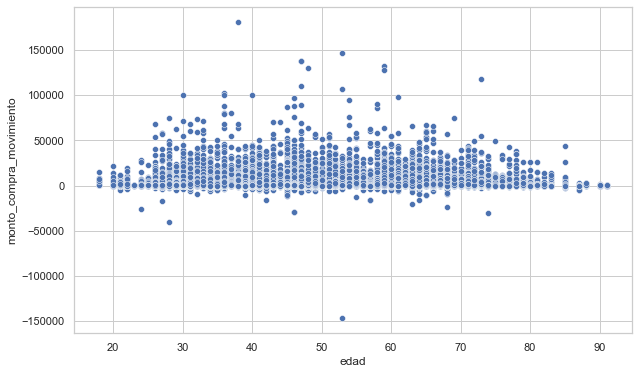

In [98]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_edad[df_edad.edad < 100], x='edad', y='monto_compra_movimiento', palette="pastel")

Tanto el coeficiente de correlación lineal como el gráfico de dispersión nos muestran que no existe ningún tipo de relación lineal entre la edad y el monto_compra_movimiento. Veamos ahora esta misma relación por tipo de producto_movimiento.

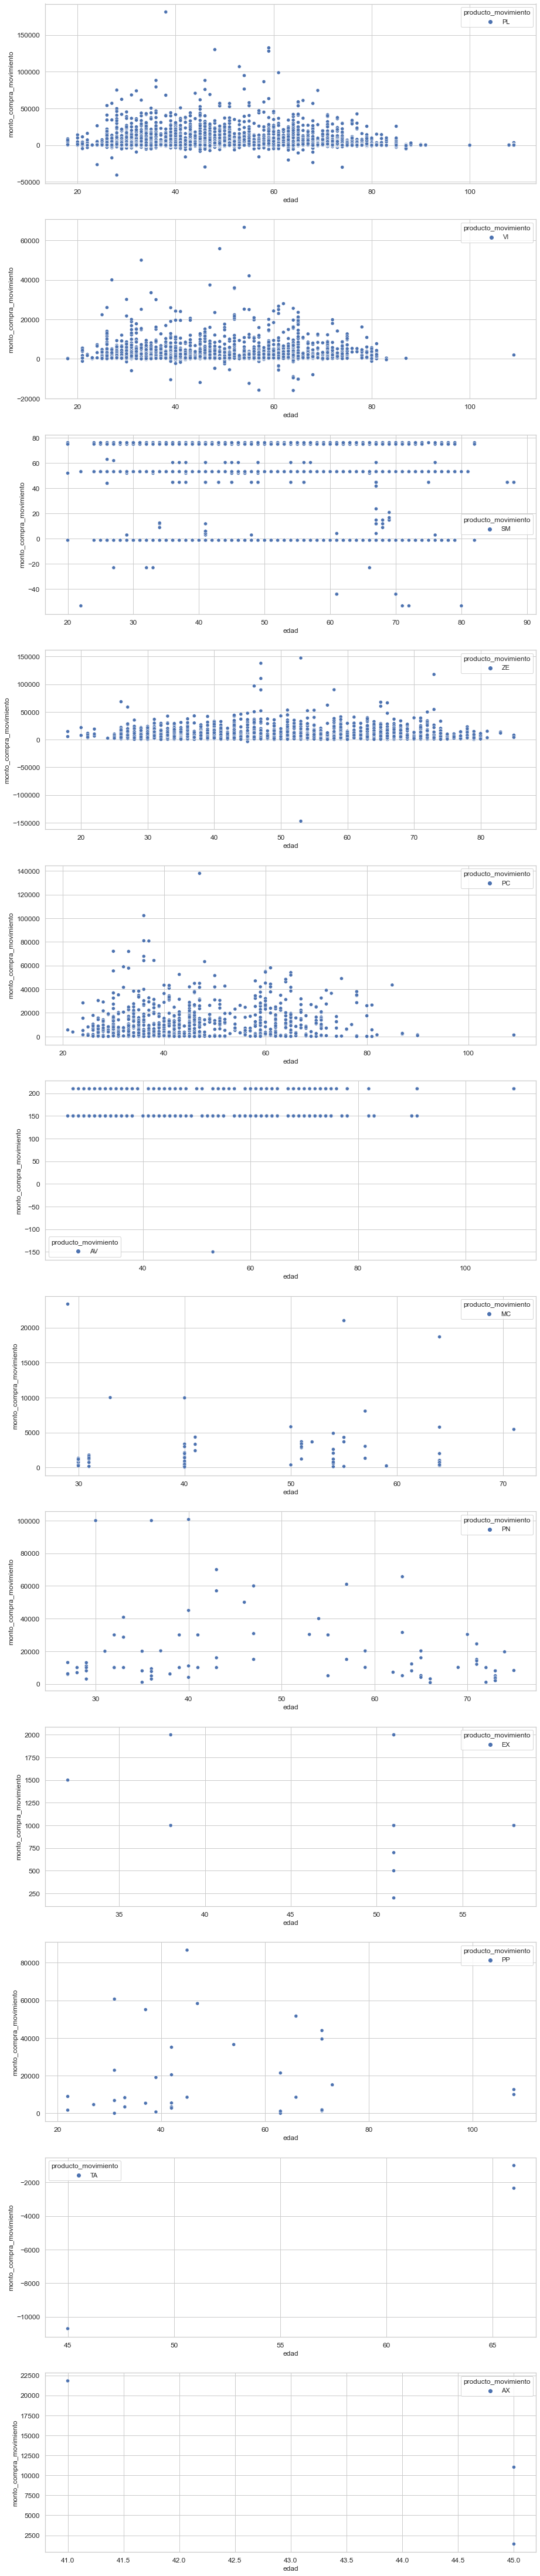

In [99]:
fig, axes = plt.subplots(12, figsize=(15, 80))
sns.scatterplot(ax=axes[0],data=df_edad[df_edad["producto_movimiento"] == "PL"], x='edad', y='monto_compra_movimiento', hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[1],data=df_edad[df_edad["producto_movimiento"] == "VI"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[2],data=df_edad[df_edad["producto_movimiento"] == "SM"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[3],data=df_edad[df_edad["producto_movimiento"] == "ZE"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[4],data=df_edad[df_edad["producto_movimiento"] == "PC"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[5],data=df_edad[df_edad["producto_movimiento"] == "AV"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[6],data=df_edad[df_edad["producto_movimiento"] == "MC"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[7],data=df_edad[df_edad["producto_movimiento"] == "PN"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[8],data=df_edad[df_edad["producto_movimiento"] == "EX"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[9],data=df_edad[df_edad["producto_movimiento"] == "PP"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[10],data=df_edad[df_edad["producto_movimiento"] == "TA"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")              
sns.scatterplot(ax=axes[11],data=df_edad[df_edad["producto_movimiento"] == "AX"], x='edad', y='monto_compra_movimiento',  hue='producto_movimiento', legend="full")

for ax in axes:
  ax.tick_params(labelsize=12)

Dentro de los productos con más movimientos (PL VI  ZE y PC) podemos observar que no existe ninguna relación con la edad. Si bien vemos lo mismo para SM y AV, se observan valores fijos, que parecen ser comisiones comunes para todas las edades.  


Para visualizar mejor esta relación, creamos rangos para las edades

In [100]:
def to_categorical(column, bin_size=10, min_cut=20, max_cut=70):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [101]:
df_edad['edad'] = to_categorical(df_edad.edad)

[(20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 109)]


C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/2892173664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edad['edad'] = to_categorical(df_edad.edad)


Observamos la frecuencia de casos en cada rango etario. 

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


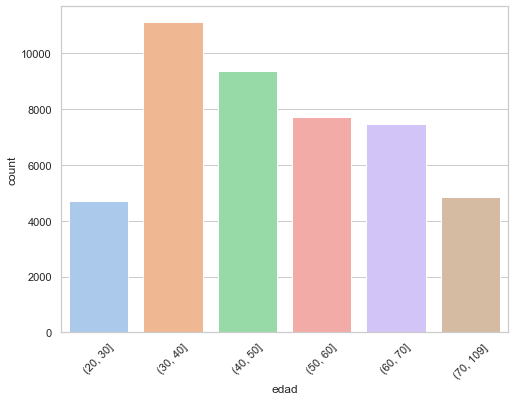

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df_edad.edad, palette="pastel")
ax.tick_params('x', rotation=45)

Se observa que existen más movimientos en el rango etario de entre 30-40, seguido por el rango de 40-50. Volvamos a observar la distribución de monto_compra_movimiento en función a la edad de las personas. 

In [103]:
df_edad.groupby(['edad'])['monto_compra_movimiento'].describe().round(2).sort_values(by="edad", ascending=True)

,count,mean,std,min,25%,50%,75%,max
edad,,,,,,,,
"(20, 30]",4722.0,1753.15,5063.76,-40701.40,74.12,301.29,1320.00,100000.00
"(30, 40]",11118.0,1899.07,5657.30,-10557.75,66.99,301.29,1274.76,181278.90
"(40, 50]",9360.0,2128.18,6362.97,-29650.00,74.12,301.29,1600.00,137899.34
"(50, 60]",7704.0,2056.54,6463.24,-147263.64,76.23,328.15,1650.00,147263.64
"(60, 70]",7461.0,1978.15,5284.79,-23500.00,78.60,317.56,1667.55,98685.00
"(70, 109]",4849.0,1628.15,4592.67,-29999.00,75.02,301.29,1179.99,117661.19


<AxesSubplot:xlabel='monto_compra_movimiento', ylabel='edad'>

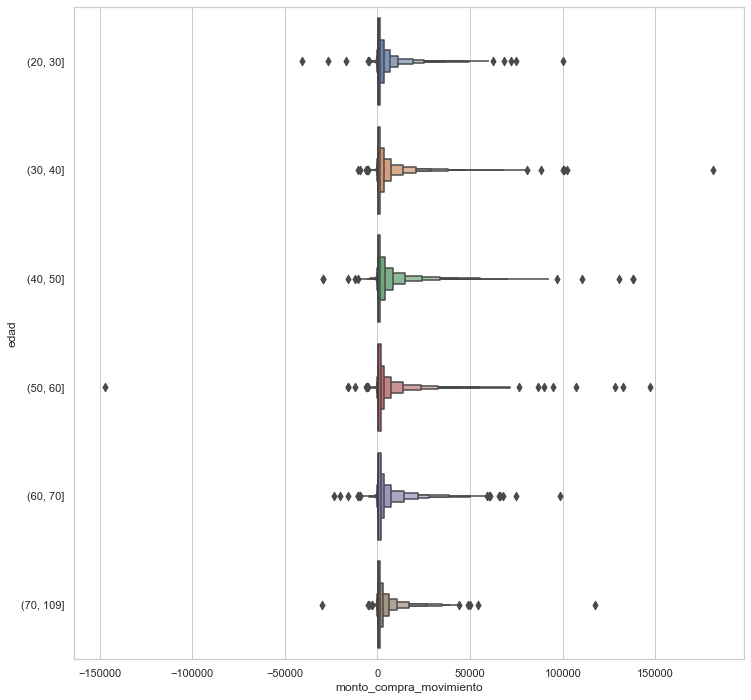

In [104]:
plt.figure(figsize=(12, 12))
sns.boxenplot(data=df_edad, x='monto_compra_movimiento', y='edad')

Observaciones:

- Para todas las edades la media y la mediana se encuentran en valores cercanos a 2000. 
- Para las edades de entre 40-50 y 30-40, la distribución se concentra hasta los 100000. 
- El rango etario entre 50-60 es el que mas outliers presenta. 

Veamos ahora que productos son los usados para cada rango etario. 

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frecuencia segun progucto diferenciado en rangos de edad')

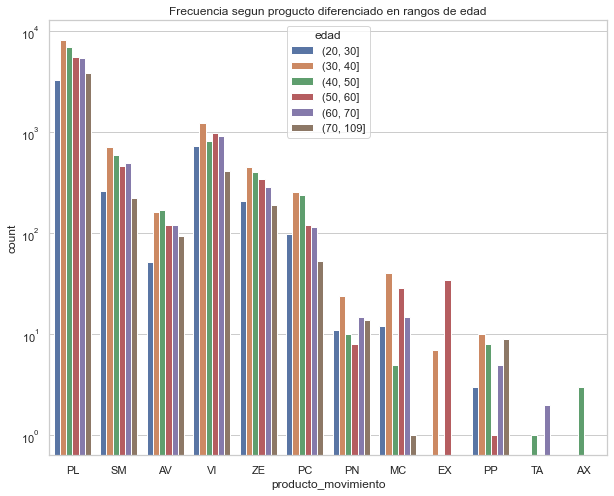

In [105]:
fig = plt.figure(figsize=(10,8))
g= sns.countplot(df_edad.producto_movimiento, hue=df_edad.edad)
g.set_yscale("log")
g.set_title("Frecuencia segun progucto diferenciado en rangos de edad")
#plt.savefig('drive/MyDrive/Diplomatura/producto_edad.png')

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


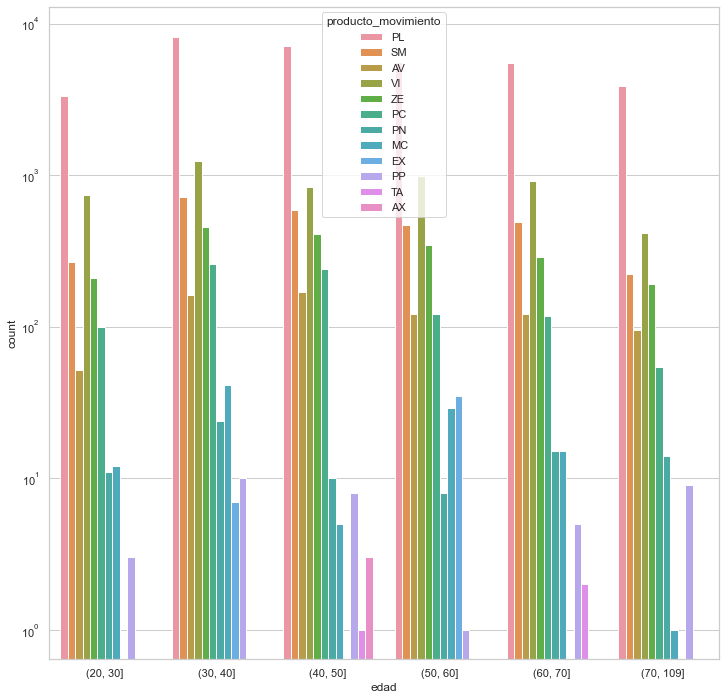

In [106]:
fig = plt.figure(figsize=(12,12))
g= sns.countplot(df_edad.edad, hue=df_edad.producto_movimiento)
g.set_yscale("log")

¿Que planes prefieren en cada rango etario?

* El rango etario de 30-40 es el que utiliza la mayoría de los productos, con excepción de EX (Extracción efectivo) que es más usado en el rango etario de 50-60, y TA (Transferencia Naranja Arg) y AX (American Express) que no es utilizado por este rango etario. 

* El rango etario de 40-50 ocupa el segundo puesto en frecuencia en la mayoría de los productos, con excepción de los planes VI (Visa), PN (Préstamos Personales PN ) y MC (Mastercard), donde el segundo puesto está repartido entre los rangos de 50-60 y 60-70. 
* EL rango etario de 20-30 se ubica por debajo de 30-40 de manera consistente en todos los productos donde aparecen ambos rangos. 
* Los productos PL, VI, ZE, SM, PC (Plan de Cuotas) y AV son los más populares. 

En la segunda visualización, se puede observar que el Plan Largo el más popular en todos los rangos etarios, seguido por Visa, Mensaje de Texto a Celulares, Zeta. Para confirmar esto, mostramos la siguiente tabla de frecuencia. 


In [107]:
fig = plt.figure(figsize=(10,6))
pd.crosstab(df_edad.edad,
                  df_edad.producto_movimiento)

producto_movimiento,AV,AX,EX,MC,PC,PL,PN,PP,SM,TA,VI,ZE
edad,,,,,,,,,,,,
"(20, 30]",52,0,0,12,99,3326,11,3,266,0,743,210
"(30, 40]",162,0,7,41,260,8206,24,10,720,0,1232,456
"(40, 50]",169,3,0,5,239,7095,10,8,592,1,832,406
"(50, 60]",122,0,35,29,121,5591,8,1,467,0,986,344
"(60, 70]",122,0,0,15,117,5488,15,5,493,2,914,290
"(70, 109]",95,0,0,1,54,3847,14,9,222,0,416,191


<Figure size 720x432 with 0 Axes>

Para continuar con el análisis, nos quedaremos con aquellos productos que tienen mejor representatividad en los diferentes rangos etarios. 

In [108]:
df_edad_filtrado = df_edad[(df_edad["producto_movimiento"] =="PL") | (df_edad["producto_movimiento"] =="VI") 
| (df_edad["producto_movimiento"] =="SM") | (df_edad	["producto_movimiento"] =="ZE") 
| (df_edad	["producto_movimiento"] =="PC") | (df_edad	["producto_movimiento"] =="AV")]

In [109]:
df_edad_filtrado.groupby(["producto_movimiento" ,'edad'])['monto_compra_movimiento'].describe().round(2)

count      mean       std        min      25%  \
producto_movimiento edad                                                        
AV                  (20, 30]     52.0    166.15     26.87     150.00   150.00   
                    (30, 40]    162.0    165.93     26.58     150.00   150.00   
                    (40, 50]    169.0    167.04     27.14     150.00   150.00   
                    (50, 60]    122.0    164.75     39.57    -150.00   150.00   
                    (60, 70]    122.0    165.25     26.23     150.00   150.00   
                    (70, 109]    95.0    168.95     28.04     150.00   150.00   
PC                  (20, 30]     99.0   9546.05  11206.93       1.67  3167.63   
                    (30, 40]    260.0  10952.08  15313.89       3.30  1046.42   
                    (40, 50]    239.0  11287.32  14690.40       4.63  1013.01   
                    (50, 60]    121.0  12253.06  12734.46      26.79  2469.44   
                    (60, 70]    117.0  13022.77  13503.92     139.97  2008.40   
                    (70, 109]    54.0  12888.24  13548.84       2.34  1082.14   
PL                  (20, 30]   3326.0   1235.47   4293.29  -40701.40    53.83   
                    (30, 40]   8206.0   1315.22   4552.80   -9273.37    56.82   
                    (40, 50]   7095.0   1481.79   4670.90  -29650.00    69.22   
                    (50, 60]   5591.0   1479.26   5140.90  -15856.09    74.73   
                    (60, 70]   5488.0   1399.87   4061.70  -23500.00    82.85   
                    (70, 109]  3847.0   1095.28   3120.59  -29999.00    69.31   
SM                  (20, 30]    266.0     50.86     23.29     -53.24    53.24   
                    (30, 40]    720.0     51.77     22.38     -22.99    53.24   
                    (40, 50]    592.0     51.14     22.85      -1.21    53.24   
                    (50, 60]    467.0     52.07     21.28      -1.21    53.24   
                    (60, 70]    493.0     50.26     24.10     -44.00    53.24   
                    (70, 109]   222.0     50.32     25.13     -53.24    53.24   
VI                  (20, 30]    743.0   1708.07   2949.19   -1500.00   448.58   
                    (30, 40]   1232.0   2079.98   3439.51  -10557.75   430.00   
                    (40, 50]    832.0   2034.27   3683.83  -11971.00   440.00   
                    (50, 60]    986.0   2004.80   4196.61  -15856.09   423.58   
                    (60, 70]    914.0   2069.73   3552.76  -15999.00   550.00   
                    (70, 109]   416.0   2090.83   2749.71   -1199.40   438.75   
ZE                  (20, 30]    210.0   8083.15   8188.70     330.56  3000.70   
                    (30, 40]    456.0   8915.04   7699.18     174.70  3459.68   
                    (40, 50]    406.0  10710.53  13842.77   -3510.00  3220.20   
                    (50, 60]    344.0  10751.30  15808.91 -147263.64  3684.34   
                    (60, 70]    290.0  11306.27  10491.17     171.60  4092.31   
                    (70, 109]   191.0   9560.47  11711.27     295.00  3348.71   

                                   50%       75%        max  
producto_movimiento edad                                     
AV                  (20, 30]    150.00    210.00     210.00  
                    (30, 40]    150.00    210.00     210.00  
                    (40, 50]    150.00    210.00     210.00  
                    (50, 60]    150.00    210.00     210.00  
                    (60, 70]    150.00    195.00     210.00  
                    (70, 109]   150.00    210.00     210.00  
PC                  (20, 30]   6002.91  13085.21   72079.84  
                    (30, 40]   5652.34  14318.85  102245.53  
                    (40, 50]   7201.41  15387.98  137899.34  
                    (50, 60]   7244.74  18235.28   55022.26  
                    (60, 70]   9184.08  18575.15   58082.21  
                    (70, 109]  8496.24  19641.84   49012.39  
PL                  (20, 30]    300.00    736.36   74999.00  
                    (30

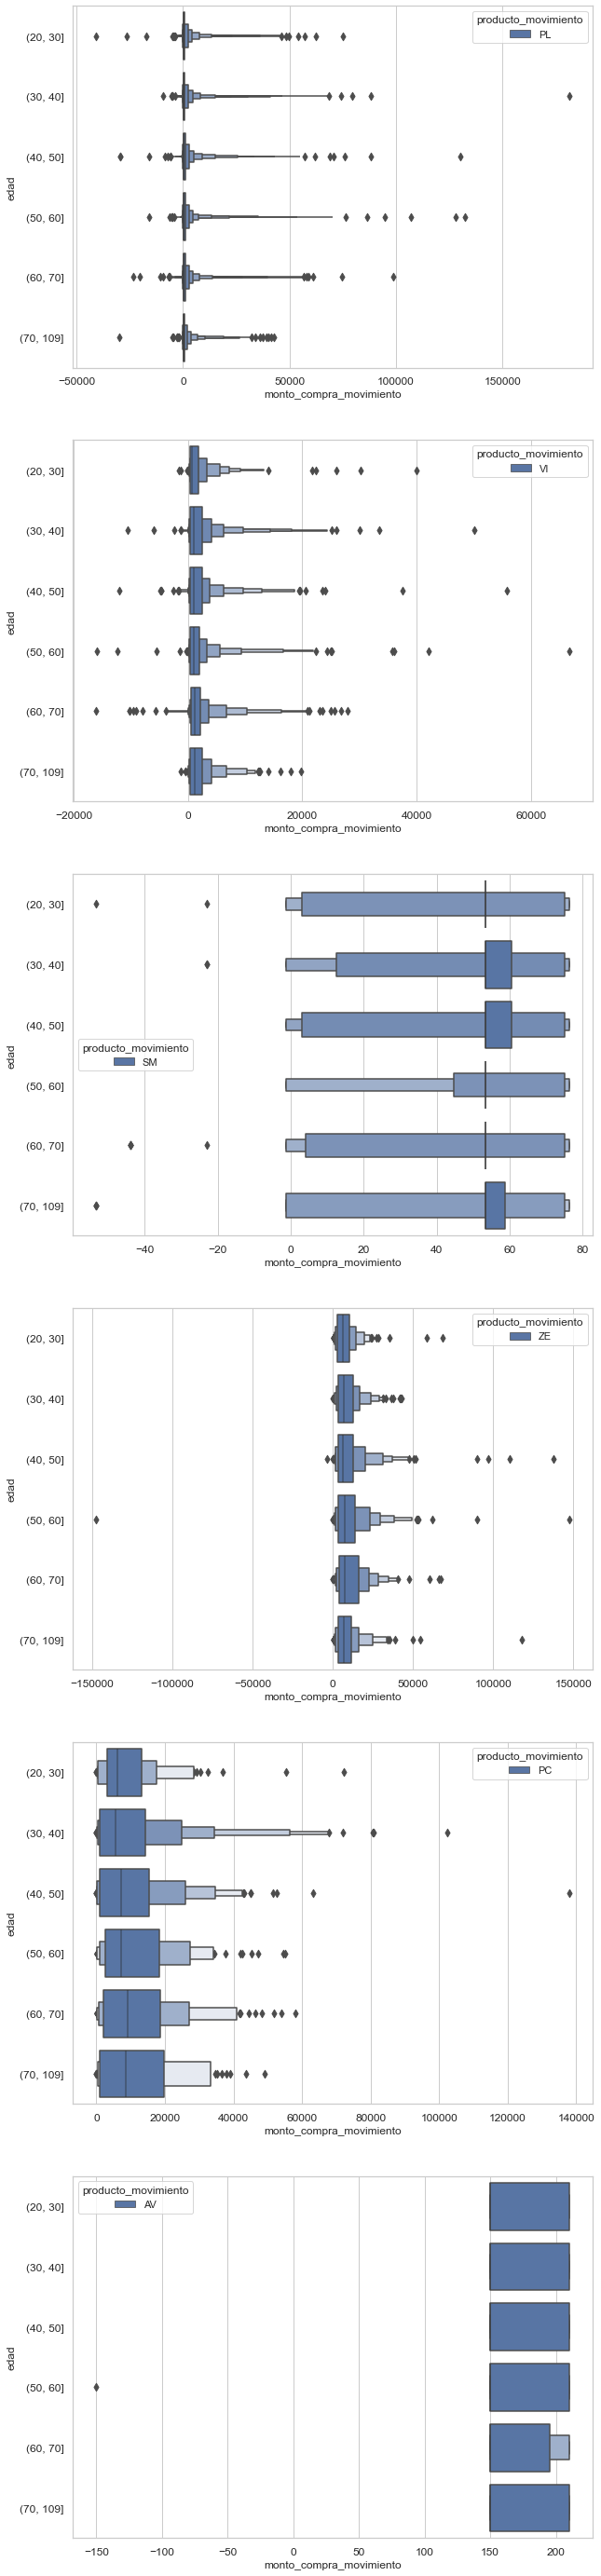

In [110]:
fig, axes = plt.subplots(6, figsize=(10,50))
sns.boxenplot(ax=axes[0], data=df_edad_filtrado[df_edad_filtrado["producto_movimiento"] == "PL"], x='monto_compra_movimiento', y="edad", hue='producto_movimiento')
sns.boxenplot(ax=axes[1], data=df_edad_filtrado[df_edad_filtrado["producto_movimiento"] == "VI"], x='monto_compra_movimiento', y="edad", hue='producto_movimiento')
sns.boxenplot(ax=axes[2], data=df_edad_filtrado[df_edad_filtrado["producto_movimiento"] == "SM"], x='monto_compra_movimiento', y="edad", hue='producto_movimiento')
sns.boxenplot(ax=axes[3], data=df_edad_filtrado[df_edad_filtrado["producto_movimiento"] == "ZE"], x='monto_compra_movimiento', y="edad", hue='producto_movimiento')
sns.boxenplot(ax=axes[4], data=df_edad_filtrado[df_edad_filtrado["producto_movimiento"] == "PC"], x='monto_compra_movimiento', y="edad", hue='producto_movimiento')
sns.boxenplot(ax=axes[5], data=df_edad_filtrado[df_edad_filtrado["producto_movimiento"] == "AV"], x='monto_compra_movimiento', y="edad", hue='producto_movimiento')

for ax in axes:
  ax.tick_params(labelsize=12)

PL

* El valor medio es de 1500. Para los rangos etarios de 30-40 y 50-60 la frecuencia de los valores llega a valores de 70000 aproximadamente, mientras que para el resto de los rangos llega a valores cercanos a los 50000. 
* En todos los rangos etarios encontramos outliers, incluso en valores superiores a 100000, siendo más frecuentes en los rangos entre 40-50 y 50-60. 

VISA

* El valor medio es de 2000. Nuevamente se observa la mayor frecuencia de valores entre 30-40, en este caso consumen por encima de los 20000.

* El resto de los rangos llegan a valores similares, con excepción de los rangos entre 20-30 y 70-109 que consumen con más frecuencia hasta 15000. Los valores atípicos llegan a los 60000 en este caso.

SM (Mensajes de Texto)

* Se observa con mayor claridad lo mostrado en los scatterplot del inicio. Existen valores fijos/mensuales cobrados en este tipo de productos, que no superan para ningún caso los 80. 

* Se pueden observar algunas devoluciones en el eje negativo. Son muy similares los boxplot para cada rango etario, vemos que en el rango etario 50-60 tienen mayor consumo de las comisiones entre 50 y 80. 

ZETA

* En este caso observamos que las distribuciones son bastante similares para todos los rangos etarios. Los valores frecuentes llegan a 50000 aprox, sin embargo el valor medio se centra en 10000. 
* El máximo para el rango etario de entre 50-60 es compensado por el valor mínimo, por lo cual puede tratarse de una devolución efectuada por Naranja. 

PC (Plan de cuotas)

* Con un valor medio cercano a 10000, vemos como la frecuencia de los consumos al 75% (Q3) llega a valores cercanos a 20000 en todos los rangos etarios, salvo entre 20-30 y 30-40 en los cuales es menor a 15000. 
* Los valores más frecuentes para el rango entre 30-40 supera a 60000. 
* No tenemos valores negativos en este producto. 

AV (Revista Convivimos)

* Es un caso similar al producto SM, se trata de una comisión fija que puede asumir valores entre 150 y 200. 

* La distribución es casi idéntica para todos los rangos etarios. 


### 7)	Hay valores faltantes? Es mejor descartarlos o completarlos con un valor particular?

C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/2389175579.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


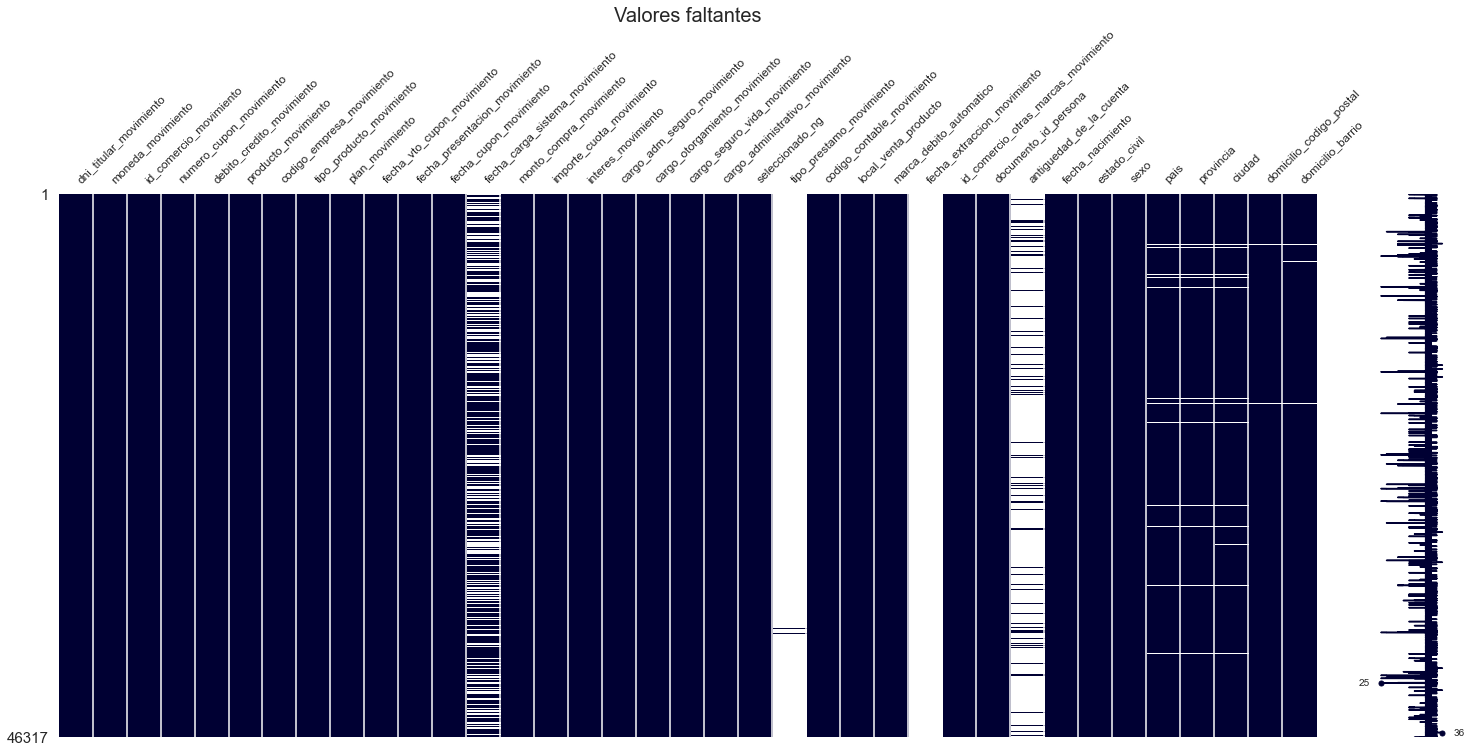

In [111]:
import missingno as msno
df = df.fillna(value=np.nan)
msno.matrix(df, fontsize=12, color=[0,0,0.2])
plt.tight_layout()
plt.title('Valores faltantes', fontsize=20)
plt.show()
#plt.savefig('drive/MyDrive/Diplomatura/valores_nulos.png', bbox_inches="tight")

In [112]:
df_2.isna().sum()

dni_titular_movimiento         0
moneda_movimiento              0
id_comercio_movimiento         0
debito_credito_movimiento      0
producto_movimiento            0
tipo_producto_movimiento       0
fecha_cupon_movimiento         0
monto_compra_movimiento        0
fecha_nacimiento             150
estado_civil                 150
sexo                         150
provincia                    514
domicilio_codigo_postal      337
dtype: int64

Se observan valores faltantes en las columnas fecha_nacimiento, estado_civil, sexo, provincia y domicilio_codigo_postal. 

Respecto a la columna Provincia, cabe remitir al inicio de esta notebook. Se consideró que era posible recuperar los datos faltantes a partir del código postal. Se logró recuperar 688 de los 1177 valores faltantes iniciales, logrando de esa forma una mejor representatividad a la hora de analizar esa variable. 

Trabajaremos en esta instancia con los demás valores faltantes. 

In [113]:
df_faltante= pd.DataFrame(df_2[df_2['fecha_nacimiento'].isna()])
df_faltante.isna().sum()

dni_titular_movimiento         0
moneda_movimiento              0
id_comercio_movimiento         0
debito_credito_movimiento      0
producto_movimiento            0
tipo_producto_movimiento       0
fecha_cupon_movimiento         0
monto_compra_movimiento        0
fecha_nacimiento             150
estado_civil                 150
sexo                         150
provincia                    150
domicilio_codigo_postal      150
dtype: int64

In [114]:
df_faltante.dni_titular_movimiento.value_counts()

000cde1ad5d8114e7a5dd977930b8835659    122
000650e8144e3a42d47a21aee9e48f34804     20
000b0d85fa8a959e2133328830fff990443      8
Name: dni_titular_movimiento, dtype: int64

In [115]:
dni859 = df_2[(df_2["dni_titular_movimiento"] =="000cde1ad5d8114e7a5dd977930b8835659")]
dni859.isna().sum()

dni_titular_movimiento         0
moneda_movimiento              0
id_comercio_movimiento         0
debito_credito_movimiento      0
producto_movimiento            0
tipo_producto_movimiento       0
fecha_cupon_movimiento         0
monto_compra_movimiento        0
fecha_nacimiento             122
estado_civil                 122
sexo                         122
provincia                    122
domicilio_codigo_postal      122
dtype: int64

In [116]:
dni804 = df_2[(df_2["dni_titular_movimiento"] =="000650e8144e3a42d47a21aee9e48f34804")]
dni804.isna().sum()

dni_titular_movimiento        0
moneda_movimiento             0
id_comercio_movimiento        0
debito_credito_movimiento     0
producto_movimiento           0
tipo_producto_movimiento      0
fecha_cupon_movimiento        0
monto_compra_movimiento       0
fecha_nacimiento             20
estado_civil                 20
sexo                         20
provincia                    20
domicilio_codigo_postal      20
dtype: int64

In [117]:
dni443 = df_2[(df_2["dni_titular_movimiento"] =="000b0d85fa8a959e2133328830fff990443")]
dni443.isna().sum()

dni_titular_movimiento       0
moneda_movimiento            0
id_comercio_movimiento       0
debito_credito_movimiento    0
producto_movimiento          0
tipo_producto_movimiento     0
fecha_cupon_movimiento       0
monto_compra_movimiento      0
fecha_nacimiento             8
estado_civil                 8
sexo                         8
provincia                    8
domicilio_codigo_postal      8
dtype: int64

Se observa que son 3 clientes los que tienen valores faltantes en las columnas fecha_nacimiento, estado_civil, sexo, provincia y domicilio_codigo_postal por lo cual son valores faltantes que no se pueden recuperar, siendo en este caso mejor descartarlos a la hora de analizar las variables mencionadas.

### 8)	Para el o los clientes que tienen movimientos en todos o casi todos los meses cúal es la tendencia en cuanto a los montos de cada producto?

#### Consideraciones

##### Rango de meses

Consideramos el rango de fechas mas representativo, quitando outliers en extremos 1% del lado derecho e izquierdo.

In [118]:
# Solo montos en pesos
df_8 = df_pes

# Creamos una columna nueva con la fecha en el formato datetime
df_8['fecha_dt'] = pd.to_datetime(df['fecha_cupon_movimiento']) # convertimos str a fecha usando datetime

# Eliminamos outliers por izquierda y por derecha
df_8 = df_8[df_8['fecha_dt'] > df_8['fecha_dt'].quantile(0.01)]
df_8 = df_8[df_8['fecha_dt'] < df_8['fecha_dt'].quantile(0.99)]

C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/1558872638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['fecha_dt'] = pd.to_datetime(df['fecha_cupon_movimiento']) # convertimos str a fecha usando datetime


Para los outliers de monto_compra_movimiento, no se van a limpiar los outliers de la variable entera, sino que se van a eliminar segun cada producto si es necesario, teniendo en cuenta las distribuciones graficadas en el punto 4) del analisis inicial

##### Inflación para ese periodo

<span style='color:gray'>_Fuente: https://datosmacro.expansion.com/ipc-paises/argentina?sector=IPC+General&sc=IPC-IG&anio=2020_</span>

In [119]:
df_infl = pd.read_csv('https://raw.githubusercontent.com/JIBarrionuevoGaltier/DiploDatos_2021_Mentoria_Grupo_2/main/notebooks_tp2/Indices%20de%20inflaci%C3%B3n.csv', parse_dates=['mes'])

In [120]:
df_pes['anio_mes_cupon'] = pd.DatetimeIndex(df_pes['fecha_cupon_movimiento']).year * 100 + pd.DatetimeIndex(df_pes['fecha_cupon_movimiento']).month

C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/2348123966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pes['anio_mes_cupon'] = pd.DatetimeIndex(df_pes['fecha_cupon_movimiento']).year * 100 + pd.DatetimeIndex(df_pes['fecha_cupon_movimiento']).month


In [121]:
df_infl['anio_mes_infl'] = pd.DatetimeIndex(df_infl['mes']).year * 100 + pd.DatetimeIndex(df_infl['mes']).month

In [122]:
df_infl

,mes,inflacion_mensual,inflacion_acumulada,anio_mes_infl
0,2020-02-01,0.000,0.000,202002
1,2020-03-01,0.033,0.033,202003
2,2020-04-01,0.015,0.048,202004
3,2020-05-01,0.015,0.063,202005
4,2020-06-01,0.022,0.085,202006
5,2020-07-01,0.019,0.104,202007
6,2020-08-01,0.027,0.131,202008
7,2020-09-01,0.028,0.159,202009
8,2020-10-01,0.038,0.197,202010
9,2020-11-01,0.032,0.229,202011


In [123]:
df_pes.shape

(45406, 15)

In [124]:
dff = df_pes.merge(df_infl[['anio_mes_infl', 'inflacion_acumulada']]
         ,left_on='anio_mes_cupon'
         ,right_on='anio_mes_infl'
         ,how='inner').drop(columns=['anio_mes_infl'])

In [125]:
dff.shape

(45406, 16)

In [126]:
dff['monto_compra_movimiento_hist'] = \
                dff['monto_compra_movimiento'] / (1 + dff['inflacion_acumulada'])

In [127]:
dff[['anio_mes_cupon','monto_compra_movimiento', 'monto_compra_movimiento_hist']]

,anio_mes_cupon,monto_compra_movimiento,monto_compra_movimiento_hist
0,202008,301.29,266.392573
1,202008,200.00,176.834660
2,202008,200.00,176.834660
3,202008,200.00,176.834660
4,202008,200.00,176.834660
...,...,...,...
45401,202006,-18.98,-17.493088
45402,202006,-53.24,-49.069124
45403,202006,-301.29,-277.686636
45404,202004,1000.80,954.961832


In [128]:
pd.DataFrame(dff['monto_compra_movimiento'] / dff['monto_compra_movimiento_hist'] - 1).round(3).value_counts()

0.310    7087
0.269    6762
0.197    6293
0.229    6262
0.159    6109
0.131    5997
0.346    5625
0.104     802
0.394     460
0.085       5
0.000       1
0.048       1
0.063       1
dtype: int64

In [129]:
df_8 = dff

In [130]:
df_8

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,debito_credito_movimiento,producto_movimiento,tipo_producto_movimiento,fecha_cupon_movimiento,monto_compra_movimiento,fecha_nacimiento,estado_civil,sexo,provincia,domicilio_codigo_postal,fecha_dt,anio_mes_cupon,inflacion_acumulada,monto_compra_movimiento_hist
0,0009bc2dcde18aed9f804282e10e87aa669,0,20099902,0,PL,0,2020-08-25,301.29,1986-03-26,1.0,1.0,NEUQUEN,8340.0,2020-08-25,202008,0.131,266.392573
1,0009bc2dcde18aed9f804282e10e87aa669,0,71328938,0,PL,3,2020-08-12,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,2020-08-12,202008,0.131,176.834660
2,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-13,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,2020-08-13,202008,0.131,176.834660
3,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-18,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,2020-08-18,202008,0.131,176.834660
4,0009bc2dcde18aed9f804282e10e87aa669,0,71332461,0,PL,3,2020-08-03,200.00,1986-03-26,1.0,1.0,NEUQUEN,8340.0,2020-08-03,202008,0.131,176.834660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45401,0005e599adf902c15aba4890e5c21dbf100,0,20089993,1,PL,0,2020-06-25,-18.98,1949-03-16,2.0,2.0,BUENOS AIRES,1757.0,2020-06-25,202006,0.085,-17.493088
45402,0005e599adf902c15aba4890e5c21dbf100,0,20099745,1,SM,0,2020-06-25,-53.24,1949-03-16,2.0,2.0,BUENOS AIRES,1757.0,2020-06-25,202006,0.085,-49.069124
45403,0005e599adf902c15aba4890e5c21dbf100,0,20099902,1,PL,0,2020-06-25,-301.29,1949-03-16,2.0,2.0,BUENOS AIRES,1757.0,2020-06-25,202006,0.085,-277.686636
45404,0001397b9f75bd60336af6fb42f5002a384,0,10099058,0,PL,0,2020-04-01,1000.80,1975-04-15,2.0,1.0,CATAMARCA,4707.0,2020-04-01,202004,0.048,954.961832


##### Seleccion de productos a analizar


Con el objetivo de determinar con que productos trabajamos, tenemos que ver cuantos casos hay por producto, a lo largo del periodo que se analiza, separado por mes. Antes de esto, se agrupan los casos por mes y por producto usando el dataframe base calculado anteriormente. 

In [131]:
# Fecha en formato YYYY-MM. datetime
df_8['fecha_ym'] = pd.to_datetime(df_8['fecha_dt']).dt.strftime('%Y-%m')

In [132]:
# Columnas a analizar
df_8 = df_8[['dni_titular_movimiento', 'fecha_ym', 'producto_movimiento', 'monto_compra_movimiento_hist', 'monto_compra_movimiento']]

# Agrupacion por mes, calculando la suma de montos.
df_rd = df_8.groupby(['dni_titular_movimiento', 'fecha_ym', 'producto_movimiento']).sum().reset_index()

Necesitamos ver las cantidades de casos por cada producto, para cada mes, para poder determinar que productos se analizan y cuales no. 

In [133]:
# Cantida de casos por producto separado por mes
pd.crosstab(df_rd.fecha_ym, df_rd.producto_movimiento)

producto_movimiento,AV,AX,EX,MC,PC,PL,PN,PP,SM,TA,VI,ZE
fecha_ym,,,,,,,,,,,,
2020-02,0,0,0,0,0,1,0,0,0,0,0,0
2020-04,0,0,0,0,0,1,0,0,0,0,0,0
2020-05,0,0,0,0,0,1,0,0,0,0,0,0
2020-06,0,0,0,0,0,1,0,0,1,0,2,0
2020-07,1,0,0,3,4,286,2,1,0,0,125,18
2020-08,108,0,1,8,51,731,5,5,344,0,216,223
2020-09,106,0,1,9,78,728,8,1,343,1,207,223
2020-10,103,1,2,7,67,732,9,1,343,0,236,219
2020-11,103,1,1,10,54,732,14,1,338,0,230,227


In [134]:
# Totales de casos por producto
df_rd.groupby('producto_movimiento').count() \
          .sort_values('fecha_ym', ascending=False).fecha_ym # Da igual cualquier variable que se cuente

producto_movimiento
PL    5614
SM    2400
ZE    1856
VI    1715
AV     720
PC     538
PN      74
MC      59
PP      19
EX      12
AX       3
TA       3
Name: fecha_ym, dtype: int64

Viendo los numeros, decidimos descartar los siguientes productos por tener muy pocos casos.

- TA, AX, EX, PP, MC

In [135]:
# Lista con los productos a analizar
prods = ['PL', 'SM', 'VI', 'ZE', 'AV', 'PC', 'PN']

# Hacemos otra columna de las fechas convertidas a ordinal (para graficar)
df_8['fecha_ord'] = pd.to_datetime(df_8['fecha_ym'])
df_8['fecha_ord'] = df_8['fecha_ord'].apply(lambda x: x.toordinal())

C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/3959888458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['fecha_ord'] = pd.to_datetime(df_8['fecha_ym'])
C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/3959888458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['fecha_ord'] = df_8['fecha_ord'].apply(lambda x: x.toordinal())


#### Tendencias en los productos seleccionados para todos o casi todos los meses

##### PL: Plan Largo

In [136]:
# Eliminamos outliers de PL
monto = 'monto_compra_movimiento_hist'
producto = 'producto_movimiento'
factor = 2.5

dfpr = df_8[df_8[producto] == 'PL']
dff = dfpr[[producto, monto]].groupby(producto).agg(mean=(monto, 'mean'), std=(monto, 'std'))
dff['limit_s'] = dff["mean"] + factor*dff['std']
dff['limit_i'] = dff["mean"] - factor*dff['std']
print("limite superior:", dff['limit_s'][0])
print("limite inferior:", dff['limit_i'][0])
      
dfpr = dfpr.merge(dff, on=producto)
dfpr = dfpr[dfpr[monto] <= dfpr['limit_s']]
dfpr = dfpr[dfpr[monto] >= dfpr['limit_i']]
dfpr.drop('limit_s',axis='columns', inplace=True)
dfpr.drop('limit_i',axis='columns', inplace=True)

limite superior: 10211.047654884178
limite inferior: -7997.076548562024


C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/1729932377.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


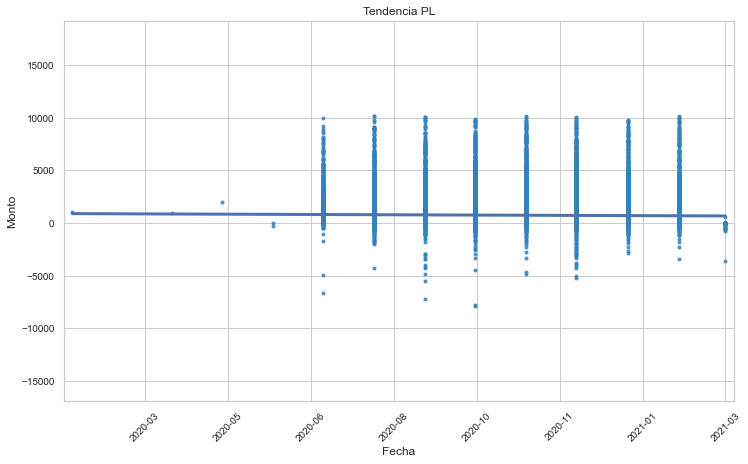

In [137]:
# PL
meses_con_casos = 7
monto = 'monto_compra_movimiento_hist'
titulo = "Tendencia " + prods[0]
# dfpr = df_8[df_8['producto_movimiento'] == prods[0]] # Solo si no se eliminan outliers

# Los datos a plotear son los clientes que gastaron todos o casi todos los meses en este producto
df_freq = dfpr['dni_titular_movimiento'].value_counts().reset_index() \
                        .rename(columns={'index':'dni', 'dni_titular_movimiento':'frequency'})
dfreg = df_freq[df_freq['frequency'] >= (meses_con_casos - 1)]
dataplot = dfpr[(dfpr['dni_titular_movimiento'].isin(dfreg['dni'])) & (dfpr['producto_movimiento'] == prods[0])]

margin = (dataplot[monto].max() - dataplot[monto].min())/2

fig, ax = plt.subplots(figsize=(12,7))
sns.regplot(x='fecha_ord', y=monto, data=dataplot, scatter_kws={'s':9, 'color':"#3182bd"}, line_kws={'linewidth':3})

ax.set_title(titulo)
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto')
ax.set_ylim(dataplot[monto].min() - margin, dataplot[monto].max() + margin)
ax.set_xlim(dfpr['fecha_ord'].min() - 5, dfpr['fecha_ord'].max() + 5)
new_labels = [dt.date.fromordinal(int(item)).strftime('%Y-%m') for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.tick_params(labelsize='small')
ax.tick_params('x', rotation=45)
#plt.savefig('drive/MyDrive/Diplomatura/tendencia_PL.png')

En Plan Largo, la tendencia parece ser estable acorde el paso de los meses. Los montos catalogados bajo este producto son consumos divididos usualmente en 6 o 12 cuotas. Por lo tanto esto podria explicar el nivel de estabilidad de los montos.  

##### SM: Mensajes de Texto a Celulares

Para este producto no se eliminaron outliers dado que los precios no varian y corresponden a aumentos fijos. 

C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/1056718741.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


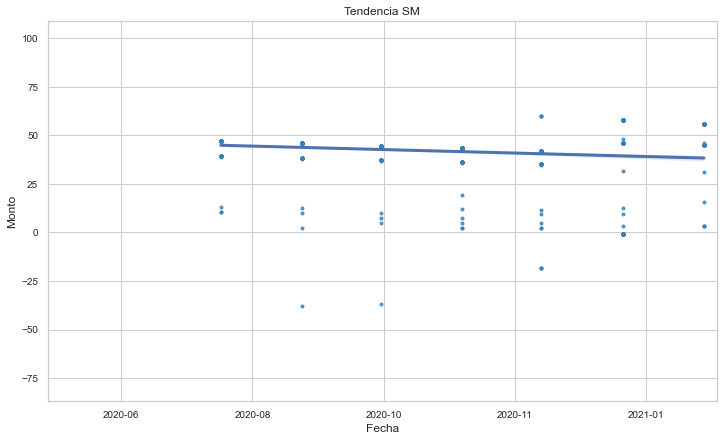

In [138]:
# SM
meses_con_casos = 6
monto = 'monto_compra_movimiento_hist'
titulo = "Tendencia " + prods[1]
dfpr = df_8[df_8['producto_movimiento'] == prods[1]] # Solo si no se eliminan outliers

# Los datos a plotear son los clientes que gastaron todos o casi todos los meses en este producto
df_freq = dfpr['dni_titular_movimiento'].value_counts().reset_index() \
                        .rename(columns={'index':'dni', 'dni_titular_movimiento':'frequency'})
dfreg = df_freq[df_freq['frequency'] >= (meses_con_casos - 1)]
dataplot = dfpr[(dfpr['dni_titular_movimiento'].isin(dfreg['dni'])) & (dfpr['producto_movimiento'] == prods[1])]

margin = (dataplot[monto].max() - dataplot[monto].min())/2

fig, ax = plt.subplots(figsize=(12,7))
sns.regplot(x='fecha_ord', y=monto, data=dataplot, scatter_kws={'s':9, 'color':"#3182bd"}, line_kws={'linewidth':3})

ax.set_title(titulo)
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto')
ax.set_ylim(dataplot[monto].min() - margin, dataplot[monto].max() + margin)
ax.set_xlim(dfpr['fecha_ord'].min() - 5, dfpr['fecha_ord'].max() + 5)
new_labels = [dt.date.fromordinal(int(item)).strftime('%Y-%m') for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.tick_params(labelsize='small')

Los montos en SM no varian mucho. Esto es esperable dado que los precios de los mensajes de texto suelen ser comisiones fijas.

Observaciones:
- A partir del mes 11 el precio aumenta
- Los valores en negativo pueden deberse a copensaciones. 

##### VI: Visa

In [139]:
# Eliminamos outliers de VI
monto = 'monto_compra_movimiento'
producto = 'producto_movimiento'
factor = 2

dfpr = df_8[df_8[producto] == 'VI'] # No se grafican los montos en dolares
dff = dfpr[[producto, monto]].groupby(producto).agg(mean=(monto, 'mean'), std=(monto, 'std'))
dff['limit_s'] = dff["mean"] + factor*dff['std']
dff['limit_i'] = dff["mean"] - factor*dff['std']
print("limite superior:", dff['limit_s'][0])
print("limite inferior:", dff['limit_i'][0])
      
dfpr = dfpr.merge(dff, on=producto)
dfpr = dfpr[dfpr[monto] <= dfpr['limit_s']]
dfpr = dfpr[dfpr[monto] >= dfpr['limit_i']]
dfpr.drop('limit_s',axis='columns', inplace=True)
dfpr.drop('limit_i',axis='columns', inplace=True)

limite superior: 9079.452029194495
limite inferior: -5083.240414408503


C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/3077625982.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


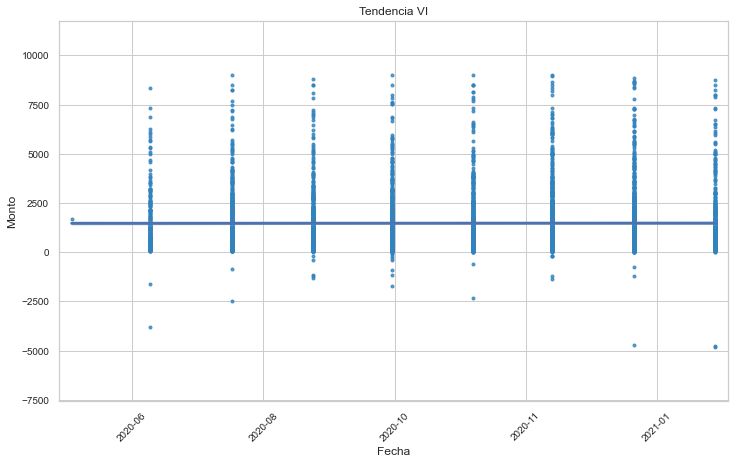

In [140]:
# VI
meses_con_casos = 7
monto = 'monto_compra_movimiento'
titulo = "Tendencia " + prods[2]
#dfpr = df_8[df_8['producto_movimiento'] == prods[2]] # Solo si no se eliminan outliers

# Los datos a plotear son los clientes que gastaron todos o casi todos los meses en este producto
df_freq = dfpr['dni_titular_movimiento'].value_counts().reset_index() \
                        .rename(columns={'index':'dni', 'dni_titular_movimiento':'frequency'})
dfreg = df_freq[df_freq['frequency'] >= (meses_con_casos - 1)]
dataplot = dfpr[(dfpr['dni_titular_movimiento'].isin(dfreg['dni'])) & (dfpr['producto_movimiento'] == prods[2])]

margin = (dataplot[monto].max() - dataplot[monto].min())/5

fig, ax = plt.subplots(figsize=(12,7))
sns.regplot(x='fecha_ord', y=monto, data=dataplot, scatter_kws={'s':9, 'color':"#3182bd"}, line_kws={'linewidth':3})

ax.set_title(titulo)
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto')
ax.set_ylim(dataplot[monto].min() - margin, dataplot[monto].max() + margin)
ax.set_xlim(dfpr['fecha_ord'].min() - 5, dfpr['fecha_ord'].max() + 5)
new_labels = [dt.date.fromordinal(int(item)).strftime('%Y-%m') for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.tick_params(labelsize='small')
ax.tick_params(axis='x', labelrotation=45)
#plt.savefig('drive/MyDrive/Diplomatura/tendencia_vi_sin_infl.png')

Los consumos con tarjeta visa se hacen en pesos y en dolares. En este grafico estan solo los montos en pesos. Esta caso es similar a PL, donde los montos son cuotas fijas, lo que puede explicar la estabilidad de la linea de tendencia. 

##### ZE: Plan Z

In [141]:
# Eliminamos outliers de ZE
monto = 'monto_compra_movimiento_hist'
producto = 'producto_movimiento'
factor = 2.5

dfpr = df_8[df_8[producto] == 'ZE']
dff = dfpr[[producto, monto]].groupby(producto).agg(mean=(monto, 'mean'), std=(monto, 'std'))
dff['limit_s'] = dff["mean"] + factor*dff['std']
dff['limit_i'] = dff["mean"] - factor*dff['std']
print("limite superior:", dff['limit_s'][0])
print("limite inferior:", dff['limit_i'][0])
      
dfpr = dfpr.merge(dff, on=producto)
dfpr = dfpr[dfpr[monto] <= dfpr['limit_s']]
dfpr = dfpr[dfpr[monto] >= dfpr['limit_i']]
dfpr.drop('limit_s',axis='columns', inplace=True)
dfpr.drop('limit_i',axis='columns', inplace=True)

limite superior: 31473.615110989576
limite inferior: -15565.64908209525


C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/3830652503.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


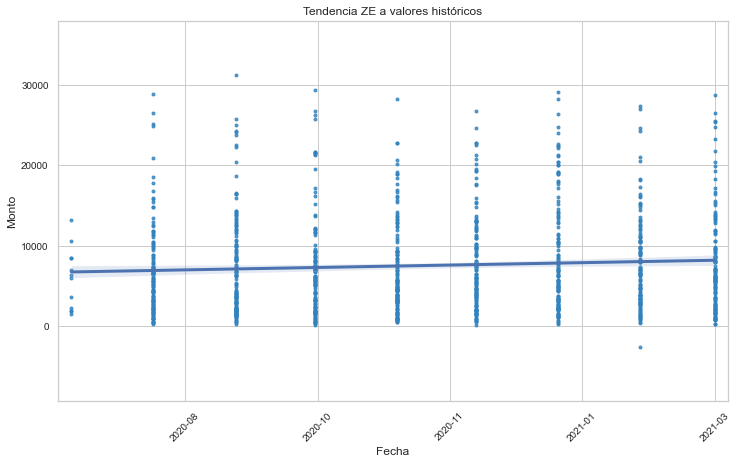

In [142]:
# ZE
meses_con_casos = 6
monto = 'monto_compra_movimiento_hist'
titulo = "Tendencia " + prods[3] + " a valores históricos"
#dfpr = df_8[df_8['producto_movimiento'] == prods[3]] # Solo si no se eliminan outliers

# Los datos a plotear son los clientes que gastaron todos o casi todos los meses en este producto
df_freq = dfpr['dni_titular_movimiento'].value_counts().reset_index() \
                        .rename(columns={'index':'dni', 'dni_titular_movimiento':'frequency'})
dfreg = df_freq[df_freq['frequency'] >= (meses_con_casos - 1)]
dataplot = dfpr[(dfpr['dni_titular_movimiento'].isin(dfreg['dni'])) & (dfpr['producto_movimiento'] == prods[3])]

margin = (dataplot[monto].max() - dataplot[monto].min())/5

fig, ax = plt.subplots(figsize=(12,7))
sns.regplot(x='fecha_ord', y=monto, data=dataplot, scatter_kws={'s':9, 'color':"#3182bd"}, line_kws={'linewidth':3})

ax.set_title(titulo)
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto')
ax.set_ylim(dataplot[monto].min() - margin, dataplot[monto].max() + margin)
ax.set_xlim(dfpr['fecha_ord'].min() - 5, dfpr['fecha_ord'].max() + 5)
new_labels = [dt.date.fromordinal(int(item)).strftime('%Y-%m') for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.tick_params(labelsize='small')
ax.tick_params(axis='x', labelrotation=45)
#plt.savefig('drive/MyDrive/Diplomatura/tendencia_ze_historicos.png')

El producto Zeta tiene una leve tendencia positiva acorde el paso de los meses. Dado que es un producto que se utiliza con cuotas cortas (En general 3), se puede explicar este crecimiento paulatino. También podemos considerar la inflación como un factor determinante en este aumento.

##### AV: Revista convivimos

C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/2629251414.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


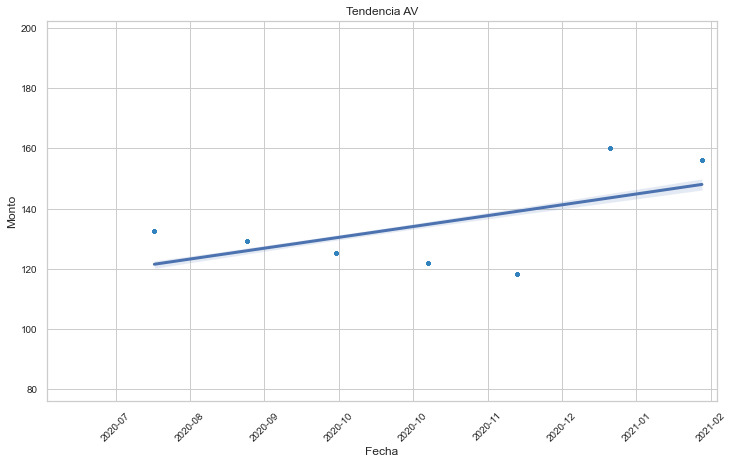

In [143]:
# AV
meses_con_casos = 6
monto = 'monto_compra_movimiento_hist'
titulo = "Tendencia " + prods[4]
dfpr = df_8[df_8['producto_movimiento'] == prods[4]] # Solo si no se eliminan outliers

# Los datos a plotear son los clientes que gastaron todos o casi todos los meses en este producto
df_freq = dfpr['dni_titular_movimiento'].value_counts().reset_index() \
                        .rename(columns={'index':'dni', 'dni_titular_movimiento':'frequency'})
dfreg = df_freq[df_freq['frequency'] >= (meses_con_casos - 1)]
dataplot = dfpr[(dfpr['dni_titular_movimiento'].isin(dfreg['dni'])) & (dfpr['producto_movimiento'] == prods[4])]

margin = (dataplot[monto].max() - dataplot[monto].min())

fig, ax = plt.subplots(figsize=(12,7))
sns.regplot(x='fecha_ord', y=monto, data=dataplot, scatter_kws={'s':9, 'color':"#3182bd"}, line_kws={'linewidth':3})

ax.set_title(titulo)
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto')
ax.set_ylim(dataplot[monto].min() - margin, dataplot[monto].max() + margin)
ax.set_xlim(dfpr['fecha_ord'].min() - 5, dfpr['fecha_ord'].max() + 5)
new_labels = [dt.date.fromordinal(int(item)).strftime('%Y-%m') for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.tick_params(labelsize='small')
ax.tick_params(axis='x', labelrotation=45)

El monto para este producto es fijo y a partir del mes 12/2020 el precio aumenta, y esto se refleja en el grado de inclinacion de la curva de tendencia y la baja variabilidad de la misma.

##### PC: Plan de cuotas

In [144]:
# Eliminamos outliers de PC
monto = 'monto_compra_movimiento_hist'
producto = 'producto_movimiento'
factor = 2.5

dfpr = df_8[df_8[producto] == 'PC']
dff = dfpr[[producto, monto]].groupby(producto).agg(mean=(monto, 'mean'), std=(monto, 'std'))
dff['limit_s'] = dff["mean"] + factor*dff['std']
dff['limit_i'] = dff["mean"] - factor*dff['std']
print("limite superior:", dff['limit_s'][0])
print("limite inferior:", dff['limit_i'][0])
      
dfpr = dfpr.merge(dff, on=producto)
dfpr = dfpr[dfpr[monto] <= dfpr['limit_s']]
dfpr = dfpr[dfpr[monto] >= dfpr['limit_i']]
dfpr.drop('limit_s',axis='columns', inplace=True)
dfpr.drop('limit_i',axis='columns', inplace=True)

limite superior: 36357.24191152683
limite inferior: -18257.486788929975


C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/1597637878.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


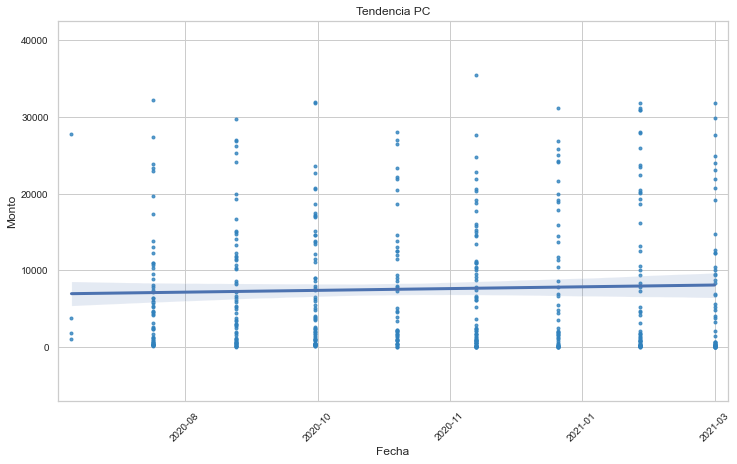

In [145]:
# PC
meses_con_casos = 7
monto = 'monto_compra_movimiento_hist'
titulo = "Tendencia " + prods[5]
#dfpr = df_8[df_8['producto_movimiento'] == prods[5]] # Solo si no se eliminan outliers

# Los datos a plotear son los clientes que gastaron todos o casi todos los meses en este producto
df_freq = dfpr['dni_titular_movimiento'].value_counts().reset_index() \
                        .rename(columns={'index':'dni', 'dni_titular_movimiento':'frequency'})
dfreg = df_freq[df_freq['frequency'] >= (meses_con_casos - 1)]
dataplot = dfpr[(dfpr['dni_titular_movimiento'].isin(dfreg['dni'])) & (dfpr['producto_movimiento'] == prods[5])]

margin = (dataplot[monto].max() - dataplot[monto].min())/5

fig, ax = plt.subplots(figsize=(12,7))
sns.regplot(x='fecha_ord', y=monto, data=dataplot, scatter_kws={'s':9, 'color':"#3182bd"}, line_kws={'linewidth':3})

ax.set_title(titulo)
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto')
ax.set_ylim(dataplot[monto].min() - margin, dataplot[monto].max() + margin)
ax.set_xlim(dfpr['fecha_ord'].min() - 5, dfpr['fecha_ord'].max() + 5)
new_labels = [dt.date.fromordinal(int(item)).strftime('%Y-%m') for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.tick_params(labelsize='small')
ax.tick_params(axis='x', labelrotation=45)

Se observa que la tendencia para el producto PC tiene un leve aumento acorde pasan los meses. Los montos en este producto corresponden a financiaciones en diferentes numeros de cuotas. No hay seguridad sobre si las cuotas son fijas o si varían. Tanto el número de cuotas como su monto pueden infuir en esta tendencia. 

##### PN: Prestamos Personales

C:\Users\Yasha\AppData\Local\Temp/ipykernel_6852/617645836.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


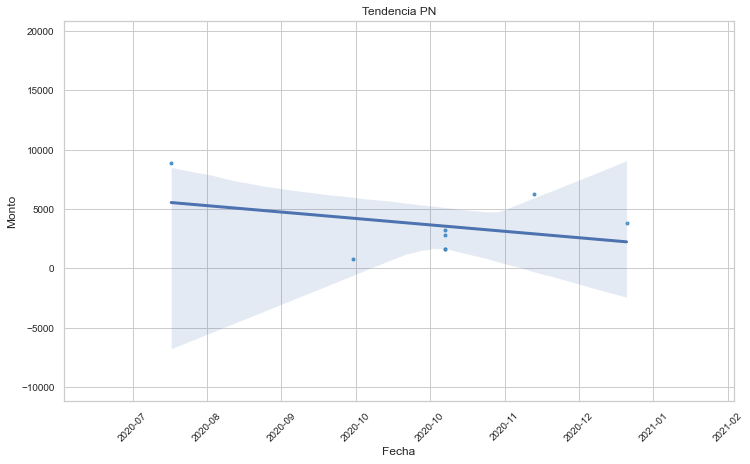

In [146]:
# PN
meses_con_casos = 6
monto = 'monto_compra_movimiento_hist'
titulo = "Tendencia " + prods[6]
dfpr = df_8[df_8['producto_movimiento'] == prods[6]] # Solo si no se eliminan outliers

# Los datos a plotear son los clientes que gastaron todos o casi todos los meses en este producto
df_freq = dfpr['dni_titular_movimiento'].value_counts().reset_index() \
                        .rename(columns={'index':'dni', 'dni_titular_movimiento':'frequency'})
dfreg = df_freq[df_freq['frequency'] >= (meses_con_casos - 1)]
dataplot = dfpr[(dfpr['dni_titular_movimiento'].isin(dfreg['dni'])) & (dfpr['producto_movimiento'] == prods[6])]

margin = (dataplot[monto].max() - dataplot[monto].min())*1.5

fig, ax = plt.subplots(figsize=(12,7))
sns.regplot(x='fecha_ord', y=monto, data=dataplot, scatter_kws={'s':9, 'color':"#3182bd"}, line_kws={'linewidth':3})

ax.set_title(titulo)
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto')
ax.set_ylim(dataplot[monto].min() - margin, dataplot[monto].max() + margin)
ax.set_xlim(dfpr['fecha_ord'].min() - 5, dfpr['fecha_ord'].max() + 5)
new_labels = [dt.date.fromordinal(int(item)).strftime('%Y-%m') for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.tick_params(labelsize='small')
ax.tick_params(axis='x', labelrotation=45)

Si bien la tendencia parece ser decreciente acorde pasan los meses, son muy pocos casos para sacar una conclusión significativa a partir del grafico de tendencia.

-----
-----